# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

# Business Case


An investment group has tasked me with finding 5 candidate zip codes that they would like to invest in single family houses in. They have a desired hold period of 1 to 3 years and then would like to sell. With low interest rates, they would like to lock in purchases in the immediate to near future. 

I have the breadth of the entire country but have decided to hone in on Texas due to its favorable tax code and robust in place industries and emerging industries. Texas boasts the largest oil and gas production in the US and has many other Fortune 500 companies. Austin, and other major metros, are becoming popular for tech entrepreneurs as opposed to the Bay Area. 

Over the past 10 years, Texas has grown the 3rd largest in terms of population of any state, at 16%. The population rate continues to grow strongly with new migration from surrounding states. Austin has over 400 people moving to the city each day. With historically low housing supply after the 2008 housing crisis and an environment with tight labor supply and high commodity costs, transactions are happening at record speeds. Houses no longer sit on the market for months on end, it's a sellers market.

Rather than view Texas without borders, I decided to hone in the top 10 metros by population. I am looking for quality locations that have shown exemplary short term/medium term/long term growth. I also want locations that are resiliant to macroeconomic factors like the 2008 housing bust. 

The remainder of this noteboook will show my thought process for how I honed in on the top 5 zip codes in Texas

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('zillow_data.csv')

In [3]:
#Make sure data was imported correctly

df.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

# Step 2: Data Preprocessing

In [4]:
#Helpter function to pivot from wide to long format

def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted#melted.groupby('time').aggregate({'value':'mean'})

In [5]:
# Drop columns that aren't included in the helper function

df.drop(columns=['RegionID','SizeRank'], axis=1, inplace=True)

In [6]:
# Ensure data is melted

df_melted = melt_data(df)
df_melted.head(5)

RegionName      City State              Metro CountyName       time  \
0       60657   Chicago    IL            Chicago       Cook 1996-04-01   
1       75070  McKinney    TX  Dallas-Fort Worth     Collin 1996-04-01   
2       77494      Katy    TX            Houston     Harris 1996-04-01   
3       60614   Chicago    IL            Chicago       Cook 1996-04-01   
4       79936   El Paso    TX            El Paso    El Paso 1996-04-01   

      value  
0  334200.0  
1  235700.0  
2  210400.0  
3  498100.0  
4   77300.0

In [7]:
# Set DataFrame to only show Texas values

df_texas = df_melted[df_melted['State']=='TX']

In [8]:
# Set index

df_texas.set_index('time', inplace=True)

In [9]:
# Set index as datetime object

df_texas.index = pd.to_datetime(df_texas.index)

# Business Exploration

I want to find counties that are the most resistant to marcoeconomic downturns. Ideally, the county has a strong economy and businesses that continue to grow in the face of a negative backdrop. 

I chose to analyze how the top 10 metros in Texas responded to the 2008 housing bust. I analyzed how long each counties' respective zip codes took to reach price levels before the housing crisis. The longer a zip code took to recover, the less resiliant I considered it to be to negative macroeconomic factors.

I judged recovery time based on the mean, median, and standard deviation for zip codes recovery time. It is is important to have quick recovery but is also important that the spread is tight so the investor does not got caught holding the home in the zip code that is usually quick to recover but can also be the slowest.

## 2008 Housing Bubble Recovery Time
- Defining functions for analyzing reovery times

In [10]:
def df_maker(df, county):
    """
    Takes a DataFrame and returns sliced version only including specified county
    ***Parameters:***
    DataFrame, country
    ***Returns:***
    DataFrame sliced to only include specified county
    """
    df = df_texas[df_texas['CountyName']==county].copy()
    return df

In [11]:
def county_dict_maker(df):
    """
    Takes a DataFrame and returns a dictionary where keys are zip codes and values
    are DataFrames with specified zip codes and median home values
    ***Parameters:***
    DataFrame
    ***Returns:***
    Dictionary with zip code keys and DataFrame values
    """
    df.drop(columns=['City', 'State', 'Metro', 'CountyName'], axis=1, inplace=True)
    zips=list(df['RegionName'].unique())
    dict_full = {}
    for zip_ in zips:
        dict_full[zip_] = df[df['RegionName']==zip_]
    return dict_full

In [12]:
# Try except because certain zip codes do not full into time constra
def housing_bust_finder(df, dict_full):
    """
    Takes a DataFrame and dictionary and returns a DataFrame where each zipcode specifies
    the number of days it took to reach the max price between 2005 and 2008 along with a dictionary
    showing the frequency of number of days to reach previous maximum value
    ***Parameters:***
    DataFrame and dictionary
    ***Returns:***
    DataFrame where each zipcode specifies the number of days until recovery and dictionary where
    keys are frequency and values are days until recovery
    """
    # Create list of unique zip codes in the region
    zips=list(df['RegionName'].unique())
    
    # Create dictionary where keys is zip code and value is days until recovery
    # Use try/except because certain zip codes will not correspond with necessary time frame
    recover_housing_dict = {}
    for zip_ in zips:
        for zip_, vals in dict_full.items():
            try:
                idx_max_pre = dict_full[zip_]['2005-01-01':'2008-12-31']['value'].idxmax()
                val_max_pre = dict_full[zip_]['2005-01-01':'2008-12-31']['value'].max()
                idx_max_post=(dict_full[zip_]['2008-12-30':]['value']>=val_max_pre).idxmax()
                td = idx_max_post - idx_max_pre
                days = td.days
                recover_housing_dict[zip_]=days
            except ValueError:
                pass
    
    # Create dictionary where key is number of days until recovery and value is frequency
    recover_housing_counts={}
    for k, v in recover_housing_dict.items():
        if v in recover_housing_counts.keys():
            recover_housing_counts[v] +=1
        else:
            recover_housing_counts[v] = 1
    
    # Swap keys and values and return the above dictionary in the form of a Pandas series
    housing_recover=pd.Series(recover_housing_counts)
    housing_recover=pd.Series(housing_recover.index.values, index=housing_recover)
    df_housing_recover=pd.DataFrame(housing_recover)
    df_housing_recover.rename(columns={0:'Days_Until_Recovery'}, inplace=True)
    df_housing_recover.sort_values(by='Days_Until_Recovery', ascending=True, inplace=True)
    return df_housing_recover, recover_housing_dict

In [13]:
df_texas['CountyName'].value_counts(1).nlargest(10)

Harris        0.125698
Dallas        0.071883
Tarrant       0.061291
Bexar         0.057135
Travis        0.046747
Denton        0.024932
Collin        0.024261
El Paso       0.021004
Montgomery    0.020776
McLennan      0.015857
Name: CountyName, dtype: float64

- Create data frames of the top 10 major metros
- Create dictionaries of metros where each key holds a dataframe which is a time series of the respective zip code

In [14]:
# Create Harris county DataFrame
df_Harris = df_maker(df_texas, 'Harris')

# Create Harris county dictionary
Harris_dict_full = county_dict_maker(df_Harris)

# Create Harris county recovery dataframe and dictionary
df_Harris_days, dict_Harris_zips = housing_bust_finder(df_Harris,Harris_dict_full)

Create Dallas county data

In [15]:
# Create Dallas county DataFrame
df_Dallas = df_maker(df_texas, 'Dallas')

# Create Dallas county dictionary
Dallas_dict_full = county_dict_maker(df_Dallas)

# Create Dallas county recovery dataframe and dictionary
df_Dallas_days, dict_Dallas_zips = housing_bust_finder(df_Dallas,Dallas_dict_full)

In [16]:
# Create Travis county DataFrame
df_Travis = df_maker(df_texas, 'Travis')

# Create Travis county dictionary
travis_dict_full = county_dict_maker(df_Travis)

# Create Travis county recovery dataframe and dictionary
df_Travis_days, dict_Travis_zips = housing_bust_finder(df_Travis,travis_dict_full)

Create Tarrant county data

In [17]:
# Create Tarrant county DataFrame
df_Tarrant = df_maker(df_texas, 'Tarrant')

# Create Tarrant county dictionary
Tarrant_dict_full = county_dict_maker(df_Tarrant)

# Create Tarrant county recovery dataframe and dictionary
df_Tarrant_days, dict_Tarrant_zips = housing_bust_finder(df_Tarrant,Tarrant_dict_full)

Create Bexar county data

In [18]:
# Create Bexar county DataFrame
df_Bexar = df_maker(df_texas, 'Bexar')

# Create Bexar county dictionary
Bexar_dict_full = county_dict_maker(df_Bexar)

# Create Bexar county recovery dataframe and dictionary
df_Bexar_days, dict_Bexar_zips = housing_bust_finder(df_Bexar,Bexar_dict_full)

Create Denton county data

In [19]:
# Create Denton county DataFrame
df_Denton = df_maker(df_texas, 'Denton')

# Create Denton county dictionary
Denton_dict_full = county_dict_maker(df_Denton)

# Create Denton county recovery dataframe and dictionary
df_Denton_days, dict_Denton_zips = housing_bust_finder(df_Denton,Denton_dict_full)

Create Collin county data

In [20]:
# Create Collin county DataFrame
df_Collin = df_maker(df_texas, 'Collin')

# Create Collin county dictionary
Collin_dict_full = county_dict_maker(df_Collin)

# Create Collin county recovery dataframe and dictionary
df_Collin_days, dict_Collin_zips = housing_bust_finder(df_Collin,Collin_dict_full)

Create El Paso county data

In [21]:
# Create El Paso county DataFrame
df_El_Paso = df_maker(df_texas, 'El Paso')

# Create El Paso county dictionary
El_Paso_dict_full = county_dict_maker(df_El_Paso)

# Create El Paso county recovery dataframe and dictionary
df_El_Paso_days, dict_El_Paso_zips = housing_bust_finder(df_El_Paso,El_Paso_dict_full)

Create Montgomery county data

In [22]:
# Create Montgomery county DataFrame
df_Montgomery = df_maker(df_texas, 'Montgomery')

# Create Montgomery county dictionary
Montgomery_dict_full = county_dict_maker(df_Montgomery)

# Create Montgomery county recovery dataframe and dictionary
df_Montgomery_days, dict_Montgomery_zips = housing_bust_finder(df_Montgomery,Montgomery_dict_full)

Create McLennan county data

In [23]:
# Create McLennan county DataFrame
df_McLennan = df_maker(df_texas, 'McLennan')

# Create McLennan county dictionary
McLennan_dict_full = county_dict_maker(df_McLennan)

# Create McLennan county recovery dataframe and dictionary
df_McLennan_days, dict_McLennan_zips = housing_bust_finder(df_McLennan,McLennan_dict_full)

I am subdiving the metros into primary and secondary markets. Primary markets tend to have higher valuations and more name recognition. Secondary markets have more favorable prices but still have high quality assets. 

I would like to invest in a combination of primary and secondary markets so I am more diversified. The primary markets have high lower cap rates so there is more interest rate risk exposure. The secondard markets have higher cap rates so there is more flexibility if interest rates rise.

Primary and secondary markets have strong demand for tenants. Exposure to both minimizes risk. Out of the 5 counties per subdivision, I will select the top 3 from each based on recovery time.

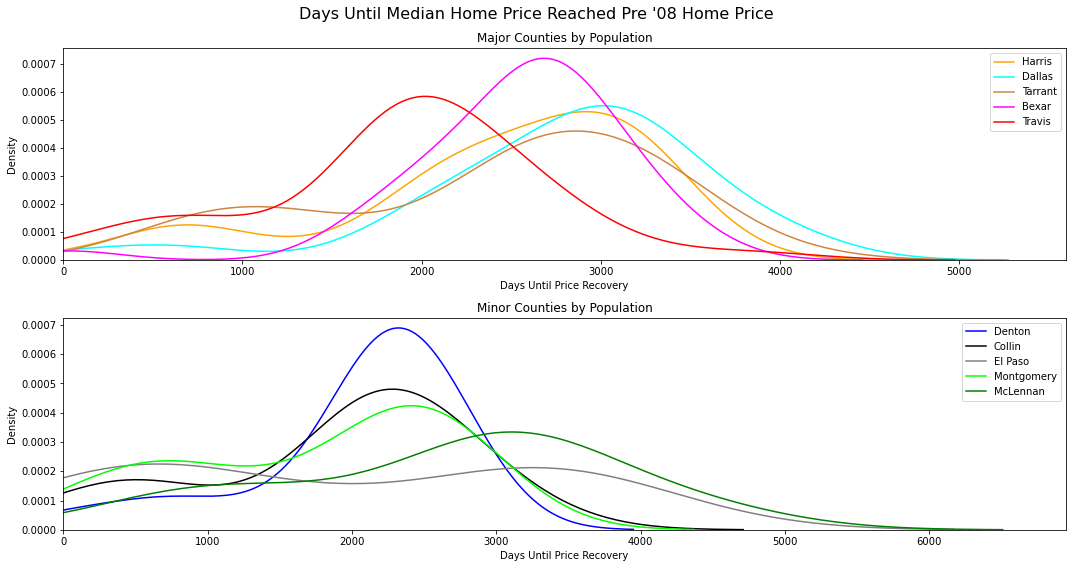

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(figsize=(15,8), nrows=2)
fig.suptitle('Days Until Median Home Price Reached Pre \'08 Home Price', fontsize=16)
sns.kdeplot(data=df_Harris_days, ax=axes[0],label='Harris', palette=['orange'])
sns.kdeplot(data=df_Dallas_days, ax=axes[0],label='Dallas', palette=['cyan'])
sns.kdeplot(data=df_Tarrant_days, ax=axes[0],label='Tarrant', palette=['peru'])
sns.kdeplot(data=df_Bexar_days, ax=axes[0],label='Bexar', palette=['magenta'])
sns.kdeplot(data=df_Travis_days, ax=axes[0],label='Travis', palette=['red'])
axes[0].set_xlabel('Days Until Price Recovery')
axes[0].set_title('Major Counties by Population')
sns.kdeplot(data=df_Denton_days, ax=axes[1],label='Denton', palette=['blue'])
sns.kdeplot(data=df_Collin_days, ax=axes[1],label='Collin', palette=['black'])
sns.kdeplot(data=df_El_Paso_days, ax=axes[1],label='El Paso', palette=['grey'])
sns.kdeplot(data=df_Montgomery_days, ax=axes[1],label='Montgomery', palette=['lime'])
sns.kdeplot(data=df_McLennan_days, ax=axes[1],label='McLennan', palette=['green'])
axes[1].set_xlabel('Days Until Price Recovery')
axes[1].set_title('Minor Counties by Population')
axes[0].set_xlim(left=0)
axes[1].set_xlim(left=0)
axes[0].legend()
axes[1].legend()
fig.tight_layout();

In [25]:
big_counties_names = ['Harris','Dallas','Tarrant','Bexar','Travis']
big_counties_df = [df_Harris_days, df_Dallas_days, df_Tarrant_days, df_Bexar_days, df_Travis_days]
big_recovery_agg = {}
for name, df in zip(big_counties_names, big_counties_df):
    big_recovery_agg[name] = df['Days_Until_Recovery'].agg(['mean', 'median', 'std', 'max'])
big_county_recovery = pd.DataFrame(big_recovery_agg).T
big_county_recovery.sort_values(by=['median', 'mean', 'std', 'max'])

mean  median         std     max
Travis   1879.512821  1947.0  790.199304  3835.0
Tarrant  2405.063830  2619.0  926.935681  3986.0
Bexar    2537.119048  2646.5  611.639189  3592.0
Harris   2432.412500  2662.5  846.344899  3622.0
Dallas   2767.155556  2953.0  835.392748  4079.0

- **Travis:** Selected due to lowest mean/median
- Tarrant: Not selected due to high standard deviation
- **Bexar:** Selected due to moderate mean/median and lowest standard deviation
- **Harris:** Selected due to superior metrics to Dallas
- Dallas: Not selected

In [26]:
small_counties_names = ['Denton','Collin','El_Paso','Montgomery','McLennan']
small_counties_df = [df_Denton_days, df_Collin_days, df_El_Paso_days, df_Montgomery_days, df_McLennan_days]
small_recovery_agg = {}
for name, df in zip(small_counties_names, small_counties_df):
    small_recovery_agg[name] = df['Days_Until_Recovery'].agg(['mean', 'median', 'std', 'max'])
small_county_recovery = pd.DataFrame(small_recovery_agg).T
small_county_recovery.sort_values(by=['median', 'mean', 'std', 'max'])

mean  median          std     max
El_Paso     1922.615385  1704.0  1416.997032  3623.0
Collin      1867.875000  2115.5   914.517058  3134.0
Montgomery  1749.888889  2176.5   931.835563  2800.0
Denton      2031.809524  2253.0   723.378782  2769.0
McLennan    2643.866667  3011.0  1165.708238  4473.0

- **El Paso:** Selected due to lowest mean/median, however high standard deviation
- **Collin:** Selected due to low median and low standard deviation
- Montgomery: Not selected due to high standard deviation
- **Denton:** Selected due to similar median/mean as Montgomery but lower standard deviation
- McLennan: Not selected

## Top Growth Prospects
- Based on recovery time further inspecting: Travis, Bexar, Harris, El Paso, Collin, and Denton county
- Looking for zip codes that have shown higher than average growth over the past 2 years, 5 years, and 10 years
- Due to a 1 to 3 year hold period, I am placing a greater emphasis on short term than long term growth prospects
- I have created a 'cumulative' score which models growth such that: 40% of score based on 2-year return, 35% of score based on 5-year return, and 25% of score based on 10-year return
    - Using this metric, I have an agnostic way to select the top 3 zip codes per county to further analyze

In [27]:
def test_county_zip_perc(df_county, county_dict_full):
    """
    Takes a DataFrame and dictionary and returns a DataFrame where each zipcode specifies
    the 2-year, 5-year, 10-year/Std/Cumulative Score
    Parameters:
    DataFrame and dictionary
    Returns:
    DataFrame where each row is a zip code and values correspond to cumulative score, percent change,
    and standard deviation
    """
    county_dict_annual = {}
    county_zips = list(county_dict_full.keys())
    for zip_ in county_zips:
        county_dict_annual[zip_] = df_county[df_county['RegionName']==zip_].resample(rule='A').mean()
        county_dict_annual[zip_]['2_Year_Pct_Change'] = county_dict_annual[zip_]['value'].pct_change(periods=2)
        county_dict_annual[zip_]['5_Year_Pct_Change'] = county_dict_annual[zip_]['value'].pct_change(periods=5)
        county_dict_annual[zip_]['10_Year_Pct_Change'] = county_dict_annual[zip_]['value'].pct_change(periods=10)
        county_dict_annual[zip_]['Std'] = county_dict_annual[zip_]['value'].std()
    
    county_comparison = {}
    county_zips = list(county_dict_annual.keys())
    for zip_ in county_zips:
        for zip_, vals in county_dict_annual.items():
            county_comparison[zip_] = county_dict_annual[zip_].iloc[-1] 
    df = pd.DataFrame(county_comparison).T
    df.drop(columns='RegionName', inplace=True)
    df['Cumulative_Score'] = df['2_Year_Pct_Change']*(0.4)+df['5_Year_Pct_Change']*(0.35)+df['10_Year_Pct_Change']*(0.25)
    df.sort_values(by='Cumulative_Score', inplace=True, ascending=False)
    return df

In [28]:
# Gather the names of all of the counties and their respective dictionaries and 
# dataframes to plug into a for loop

county_name_by_recovery = ['Travis', 'Bexar', 'Harris', 'El_Paso', 'Collin', 'Denton']
county_df_by_recovery = [df_Travis, df_Bexar, df_Harris, df_El_Paso, df_Collin, df_Denton]
county_dict_by_recovery = [travis_dict_full, Bexar_dict_full, Harris_dict_full, 
                           El_Paso_dict_full, Collin_dict_full, Denton_dict_full]

all_perc_change_dict = {}
for name, df_, dict_ in zip(county_name_by_recovery, county_df_by_recovery, county_dict_by_recovery):
    all_perc_change_dict[name] = test_county_zip_perc(df_, dict_)

In [29]:
all_perc_change_dict.keys()

dict_keys(['Travis', 'Bexar', 'Harris', 'El_Paso', 'Collin', 'Denton'])

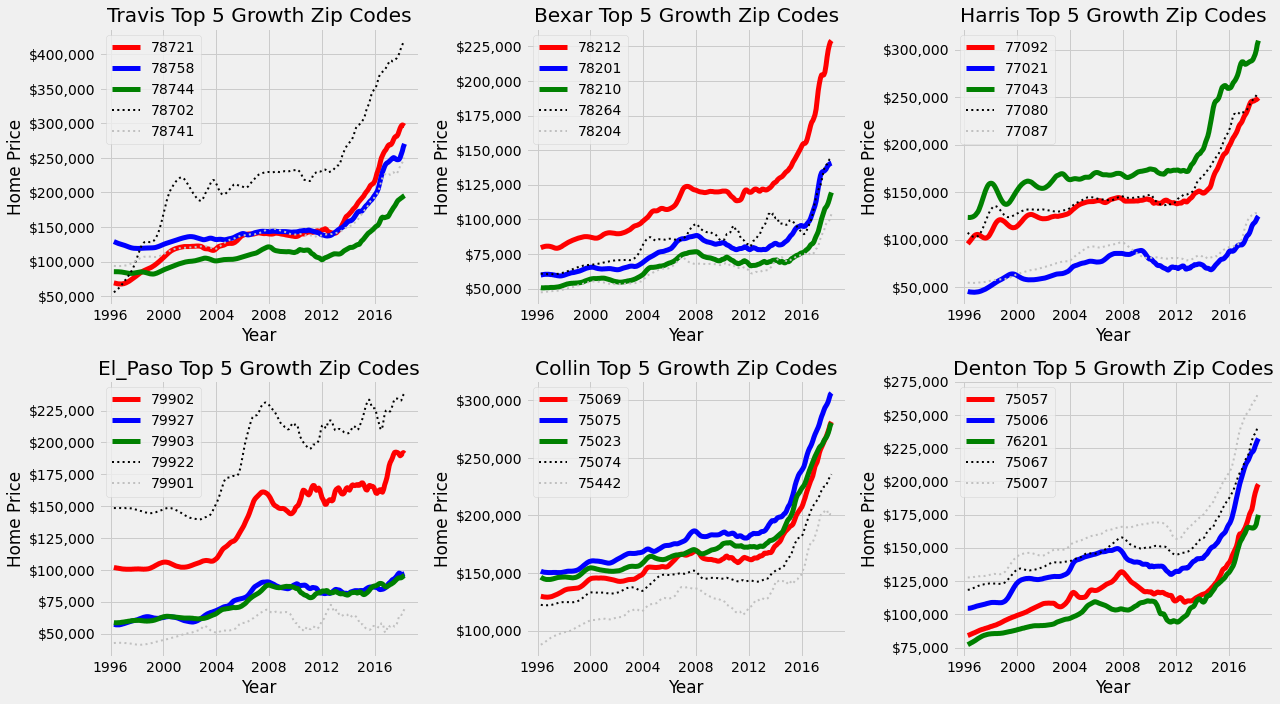

In [33]:
import matplotlib.ticker as mtick
county_name = ['Travis', 'Bexar', 'Harris', 'El_Paso', 'Collin', 'Denton']
county_dict_full = [travis_dict_full, Bexar_dict_full, Harris_dict_full, 
                           El_Paso_dict_full, Collin_dict_full, Denton_dict_full]

with plt.style.context('fivethirtyeight'):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
    for ax, name, dict_ in zip(axes.flatten(), county_name, county_dict_full):
        top_5=list(all_perc_change_dict[name].index)[:5]
        fmt = '${x:,.0f}'
        tick = mtick.StrMethodFormatter(fmt)
        ax.yaxis.set_major_formatter(tick) 
        sns.lineplot(data=dict_[top_5[0]]['value'], color='red', label=top_5[0], lw=5, ax=ax)
        sns.lineplot(data=dict_[top_5[1]]['value'], color='blue', label=top_5[1], lw=5, ax=ax)
        sns.lineplot(data=dict_[top_5[2]]['value'], color='green', label=top_5[2], lw=5, ax=ax)
        sns.lineplot(data=dict_[top_5[3]]['value'], color='black', label=top_5[3], lw=2, ls=':', ax=ax)
        sns.lineplot(data=dict_[top_5[4]]['value'], color='silver', label=top_5[4], lw=2, ls=':', ax=ax)
        ax.set_title(f"{name} Top 5 Growth Zip Codes")
        ax.set_ylabel('Home Price')
        ax.set_xlabel('Year')
        ax.legend()
        fig.tight_layout()

- Visualization showing the top 5 growth zip codes per county
- The colored lines are the 3 with the highest cumulative score (ordered: red, blue, green)
- The grey and black lines represent the 4th and 5th highest scores which will not be analyzed
- As displayed, 2 year growth is the most highly desired characteristic for the zip code

In [35]:
# Create a dictionary where each county is the key and the top 3 zipcodes are the values

county_name = ['Travis', 'Bexar', 'Harris', 'El_Paso', 'Collin', 'Denton']
top_zip_per_county = {}
for county in county_name:
    top_zip_per_county[county]=list(all_perc_change_dict[county].index)[:3]

top_zip_per_county

{'Travis': [78721, 78758, 78744],
 'Bexar': [78212, 78201, 78210],
 'Harris': [77092, 77021, 77043],
 'El_Paso': [79902, 79927, 79903],
 'Collin': [75069, 75075, 75023],
 'Denton': [75057, 75006, 76201]}

In [36]:
# Make a list of all of the top zip codes (18 total)

total_top_zips = []
for k, v in top_zip_per_county.items():
    total_top_zips.extend(v)

total_top_zips[:5]

[78721, 78758, 78744, 78212, 78201]

# Step 5: SARIMA Modeling
- Showing all helper modeling functions

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima 

def find_auto_order(df_train):
    """
    Takes a DataFrame and returns ARMA and Seasonal order based on auto_arima calculations
    ***Parameters:***
    Train data
    ***Returns:***
    Summary of auto_arima findings and ARMA/Seasonal order
    """
    model = auto_arima(df_train,start_p=1, start_q=1, max_p=4, max_q=4, start_P=1,#d=1, D=1,
    start_Q=1, max_d=3, max_D=3, max_Q=4, max_P=4,seasonal=True, m=12, with_intercept=True) #trace=True, stepwise=False)
    summary = model.summary()
    ARMA_order = model.order
    seasonal_order = model.seasonal_order
    return summary, ARMA_order, seasonal_order

In [38]:
# def SARIMAX_man_results(train_data, arma_order, seasonal_order):
#     """
#     Takes a training data and ARMA/Seasonal order and fits a SARIMAX model with specied order and fits
#     different parameters and returns the best SARIMAX model based on AIC value
#     Parameters:
#     Train data, seasonal/arma order
#     Returns:
#     Dictionary with various iterations of parameters and their AIC score and dictionary with the best 
#     parameters
#     """
#     model = SARIMAX(train_data,order=arma_order, seasonal_order=seasonal_order,
#                 enforce_stationarity=False, enforce_invertibility=False,
#                 freq='MS', k_trend=2)
#     results = model.fit()
#     score_ = results.aic

    
    
#     diagnostics = results.plot_diagnostics(figsize=(8,8))
#     results_dict['diag_summary'] = diagnostics

#     best_params['arma_order'] = arma_order
#     best_params['seasonal_order'] = seasonal_order
    


#     return results_dict, best_params

In [205]:
def fit_final_model(df_train, arma_order, seasonal_order):
    """
    Fit final model according to results from SARIMAX grid search
    ***Parameters:***
    Train data, ARMA/Seasonal order, MLE_regression, and concentrate scale
    ***Returns:***
    Fit model on traning data
    """
    model = SARIMAX(df_train,order=arma_order,seasonal_order=seasonal_order, enforce_invertibility=False, 
                    enforce_stationarity=False, freq='MS')
    best_model = model.fit(maxiter=150)
    diagnostics = best_model.plot_diagnostics(figsize=(8,8))
    return best_model

In [40]:
def get_forecast(best_model, test_data):
    """
    Takes a fitted model and returns dataframe where index is a time and values are confidence interval
    and predicted mean
    ***Parameters:***
    Fitted model and test data
    ***Returns:***
    DataFrame showing predictions to compare to test data
    """
    forecast = best_model.get_forecast(steps=len(test_data))

    ## save forecasted mean and upper/lower ci as df
    forecast_df = forecast.conf_int()
    forecast_df.columns = ['Lower CI','Upper CI']
    forecast_df['Forecast'] = forecast.predicted_mean
    forecast_df
    return forecast_df

In [41]:
def plot_forecast(train_data, test_data, prediction_table, code, county):
    """
    Plot forecasted predictions as opposed to test data
    ***Parameters:***
    Training data, test data, predictions, and zip code
    ***Returns:***
    Plot comparing predictions based off fitted model to test data
    """
    with plt.style.context('fivethirtyeight'):
        fig,ax = plt.subplots(figsize=(10,4))

        # Plotting Training and test data
        fmt = '${x:,.0f}'
        tick = mtick.StrMethodFormatter(fmt)
        ax.yaxis.set_major_formatter(tick) 
        train_data['2014-01-01':].plot(label='Training Data')
        test_data['2014-01-01':].plot(label='Test Data')

        ## Plotting Forefcast and CI
        prediction_table['Forecast'].plot(ax=ax,label='Forecast')
        ax.fill_between(prediction_table.index,
                        prediction_table['Lower CI'], 
                        prediction_table['Upper CI'],color='g',alpha=0.3)

        ax.set(ylabel=f'{code} Home Value')
        ax.legend()
        ax.set_title(f"{county} County - {code} Current Predictions")
        
        return fig;

In [42]:
def fitall_final_model(df_all, arma_order, seasonal_order):
    """
    Fits final model on all data using specified parameters
    ***Parameters:***
    Zip code dataframe, final model best parameters
    ***Returns:***
    Best fit model on all data
    """
    model = SARIMAX(df_all,order=arma_order,seasonal_order=seasonal_order, enforce_invertibility=False, 
                    enforce_stationarity=False, freq='MS')
    bestall_model = model.fit()
    return bestall_model

In [43]:
# Rerun on entire dataset to get further forecasts
import matplotlib.ticker as mtick

def plot_future_forecast(final_model, test_data, train_data, code, county):
    """
    Plot showing traing data, test data, and future predictions out to July 1st 2020
    ***Parameters:***
    Final model, test data, training data, zip code, and county
    ***Returns:***
    Plot showing training, test, and future values. Dictionary of final value low, high, and mean
    confidicene interval. Dataframe showing all future predictions
    """
    with plt.style.context('fivethirtyeight'):
    
        ## Get forecast
        forecast = final_model.get_forecast(steps=len(test_data))

        ## save forecasted mean and upper/lower ci as df
        forecast_dict={}
        forecast_df = forecast.conf_int()
        forecast_df.columns = ['Lower CI','Upper CI']
        forecast_df['Forecast'] = forecast.predicted_mean
        forecast_dict['low'] = forecast_df.iloc[-1]['Lower CI']
        forecast_dict['high'] = forecast_df.iloc[-1]['Upper CI']
        forecast_dict['mean'] = forecast_df.iloc[-1]['Forecast']

        ## Plot
        last_n_lags=52

        fig,ax = plt.subplots(figsize=(10,4))


        # Plotting Training and test data
        fmt = '${x:,.0f}'
        tick = mtick.StrMethodFormatter(fmt)
        ax.yaxis.set_major_formatter(tick) 
        ax.plot(train_data['2012-01-01':], label='Training Data')
        ax.plot(test_data['2012-01-01':], label='Test Data')
        ax.axvline(train_data.index[-1],ls=':')
        ax.set_xlabel('Year')
        ax.set_ylabel('Home Value')
        ax.set_title(f"{county} County - {code} Future Predictions")
        

        ## Plotting Forefcast and CI
        ax.plot(forecast_df['Forecast'], label='Forecast')
        ax.fill_between(forecast_df.index,
                        forecast_df['Lower CI'], 
                        forecast_df['Upper CI'],color='g',alpha=0.3)
        ax.legend(loc=2)
        return fig, forecast_dict, forecast_df

In [44]:
def roi_dict(forecast_df):
    """
    Dictionary that shows percent change from end of dataset to forecasted date, along with value after
    initial $100,000 investment and the dollar difference between principal investment and future date
    ***Parameters:***
    DataFrame of forecasted predictions
    ***Returns:***
    Dictionary with returns on the upper/lower/and mean range
    """
    forecast_dict = {}
    cols = ['Lower CI', 'Upper CI', 'Forecast']
    for col in cols:
        perc_change=(forecast_df[col][-1]-forecast_df[col][0])/forecast_df[col][0]
        dollar_val=(perc_change+1)*100000
        dollar_dif = dollar_val-100000
        forecast_dict[col]=[]
        forecast_dict[col].append(perc_change)
        forecast_dict[col].append(dollar_val)
        forecast_dict[col].append(dollar_dif)
    return forecast_dict

In [206]:
# Bring in ticker formats
import matplotlib.ticker as mtick

def model_predictions(train_data, test_data, all_data, code, county):
    """
    Uses all helper functions to create diagnostic summary, forecast on test data, and future predictions
    Parameters:
    Training data, test data, all data, zip code, and county
    Returns:
    Plot showing diagnostics and forecasts. Dictinary with predictions in the future
    """
    summary, arma_order, seasonal_order = find_auto_order(train_data)
#     best_params = SARIMAX_man_results(train_data, arma_order, seasonal_order)
    best_model = fit_final_model(train_data, arma_order, seasonal_order)
    forecast_df=get_forecast(best_model, test_data)
    test_forecast_fig=plot_forecast(train_data, test_data, forecast_df, code, county)
    bestall_model=fitall_final_model(all_data, arma_order, seasonal_order)
    
    fig, forecast_dict, forecast_df=plot_future_forecast(bestall_model, test_data, train_data, code, county)
    roi_helper = roi_dict(forecast_df)
    return fig, forecast_dict, forecast_df, roi_helper

## Travis County Modeling

- Capitol of Texas
- Located in Austin Metro
- Population: 1,273,954
- Median home value of $270,400 as of April 2018

### 78758: EDA and SARIMAX
- North Austin
- ~4 miles from Downtown area

In [46]:
def create_zip_data (dict_full, zip_):
    """
    Takes a county dictionary and returns dataframe with values for specified zip code
    Parameters:
    Dictionary and zip code
    Returns:
    DataFrame which shows value and frequency is corrected to monthly data
    """
    df = dict_full[zip_].copy()
    df.drop(columns='RegionName', axis=1, inplace=True)
    df=df.resample('MS').asfreq()
    return df

In [47]:
df_78758=create_zip_data(travis_dict_full, 78758)

In [49]:
def zip_eda(df_full, code, county):
    """
    Takes a zip code and returns historic prices, price distributions, and series of boxplots where each
    box represents a year of data to better assess spread of prices
    Parameters:
    DataFrame, zip code, and county
    Returns:
    Summary figure and descriptive statistics per zip code
    """

    from matplotlib.gridspec import GridSpec
    with plt.style.context('bmh'):
        
        fig = plt.figure(figsize=(19, 7), constrained_layout=False)
        gs = GridSpec(nrows=2, ncols=2)
        # First axes
        
        ax0 = fig.add_subplot(gs[0, 0])
        fmt = '${x:,.0f}'
        tick = mtick.StrMethodFormatter(fmt)
        ax0.yaxis.set_major_formatter(tick) 
        ax0.plot(df_full['value'], color='r')
        ax0.set_title(f'{code} Price History')
        ax0.set_xlabel('Year')
        ax0.set_ylabel('Home Price')
        ax0.axvline(x='2000-01-01', label='Dotcom Boom', ls=':')
        ax0.axvline(x='2008-01-01', label='Housing Boom', ls=':', color='k')
        ax0.legend()
        # Second axes
        ax1 = fig.add_subplot(gs[1, 0])
        ax1.xaxis.set_major_formatter(tick) 
        sns.kdeplot(df_full['value'], ax=ax1, color='r')
        ax1.set_title(f'{code} Price Distribution')
        ax1.set_xlabel('Home Price')

        mean=df_full['value'].mean()
        median=df_full['value'].median()
        ax1.axvline(x=mean, label=f"Mean: ${round(mean,2)}", ls=':', color='blue')
        ax1.axvline(x=median, label=f"Median: ${round(median,2)}", ls=':', color='k')
        ax1.legend()
        # Third axes

        groups = df_full['1997-01-01':'2017-12-12'].groupby(pd.Grouper(freq='A'))
        df_annual=pd.DataFrame()
        for name, group in groups:
            df_annual[name.year]=group.values.ravel()
        ax2 = fig.add_subplot(gs[:, 1])
        ax2.yaxis.set_major_formatter(tick) 
        sns.boxplot(data=df_annual, ax=ax2)
        xticklabels = (range(1997,2018))
        ax2.set_xlabel('Year')
        ax2.set_xticklabels(xticklabels, rotation = 45, ha="right")
        ax2.set_title('Yearly Distribution of Median Home Prices')

        fig.suptitle(f'{county} County - {code}', fontsize=20)
        fig.tight_layout();
        res = df_full.describe()
        return fig, res;  

(<Figure size 1368x504 with 3 Axes>,
                value
 count     265.000000
 mean   149549.056604
 std     34194.863952
 min    119000.000000
 25%    131900.000000
 50%    139900.000000
 75%    145000.000000
 max    270400.000000)

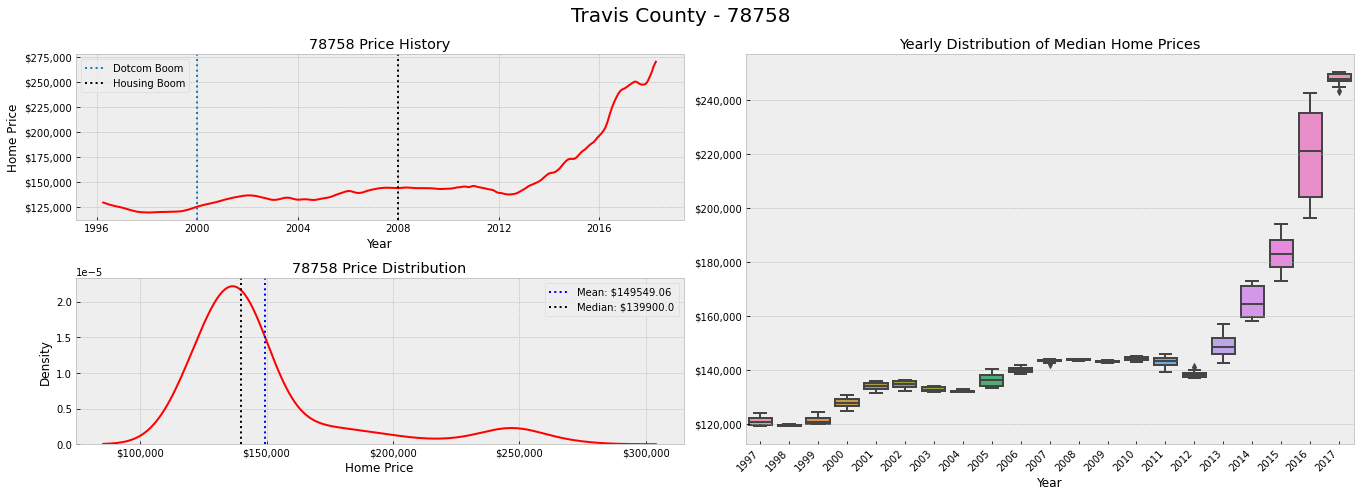

In [50]:
zip_eda(df_78758, 78758, 'Travis')

- Minimal impact on prices during dotcom crash and housing bust
- Data is right skewed based on mean > median
- From 1997 to 2012 homes have minimal spread but begin to increase after that with significantly larger spread in 2016

<AxesSubplot:xlabel='time'>

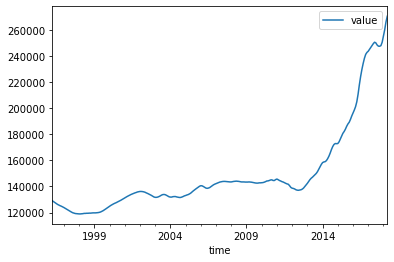

In [51]:
# Plot data to determine accurate split point

df_78758.plot()

In [52]:
# Round vs int

def create_train_test_split(df_full, split):
    """
    Takes a DataFrame and split value and divides data into train/test based on percentage allocated
    to training
    Parameters:
    DataFrame and split value
    Returns:
    Train and test data with size specified by split value
    """
    total_rows=len(df_full)
    train = df_full.iloc[:int(total_rows*split)]['value']
    test = df_full.iloc[int(total_rows*split):]['value']
    return train, test

<AxesSubplot:xlabel='time'>

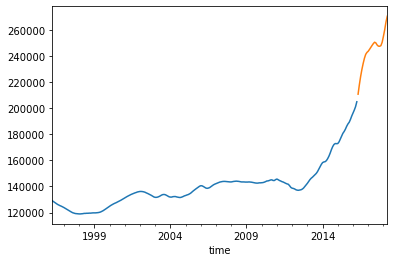

In [53]:
train_78758, test_78758 = create_train_test_split(df_78758, 0.91)
train_78758.plot()
test_78758.plot()

Split point looks like it accurately captures upward trend after 2014

In [54]:
# Create diagnostic helper function
# Add .diff() to PACF/ACF dropna()

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from matplotlib.gridspec import GridSpec
from statsmodels.tsa.stattools import adfuller

def pacf_acf_rolling(train, county, zip_, lags=30):
    with plt.style.context('bmh'):
    
        train=train.to_frame()
        fig = plt.figure(figsize=(19, 7), constrained_layout=False)
        gs = GridSpec(nrows=2, ncols=2)
        lags=30
        
        # First axes
        ax0 = fig.add_subplot(gs[0, 0])
        plot_acf(train['value'],lags=lags, ax=ax0);
        ax0.set_title('ACF Plot')

        # Second axes
        ax1 = fig.add_subplot(gs[1, 0])    
        plot_pacf(train['value'],lags=lags, ax=ax1)
        ax1.set_title('PACF Plot')


        # Third axes
        ax2 = fig.add_subplot(gs[:, 1])   
        
        train['12-month-SMA'] = train['value'].rolling(window=12).mean()
        train['12-month-Std'] = train['value'].rolling(window=12).std()
        ax2.plot(train['value'], label='Original Price')
        ax2.plot(train['12-month-SMA'], label='12-month-SMA')
        ax2.plot(train['12-month-Std'], label='12-month-Std')
        ax2.set_title('Rolling Window with Price')
        ax2.legend()

        fig.suptitle(f'{county} County - {zip_}', fontsize=20)
        fig.tight_layout();
        
        # Dickey Fuller
        print('Augmented Dickey-Fuller Test on 78722')
        dftest = adfuller(train['value'])
        dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])
        for key,val in dftest[4].items():
            dfout[f'critical value ({key})']=val
        print(dfout)

Augmented Dickey-Fuller Test on 78722
ADF test statistic        2.205379
p-value                   0.998887
# lags used              14.000000
# observations          226.000000
critical value (1%)      -3.459620
critical value (5%)      -2.874415
critical value (10%)     -2.573632
dtype: float64


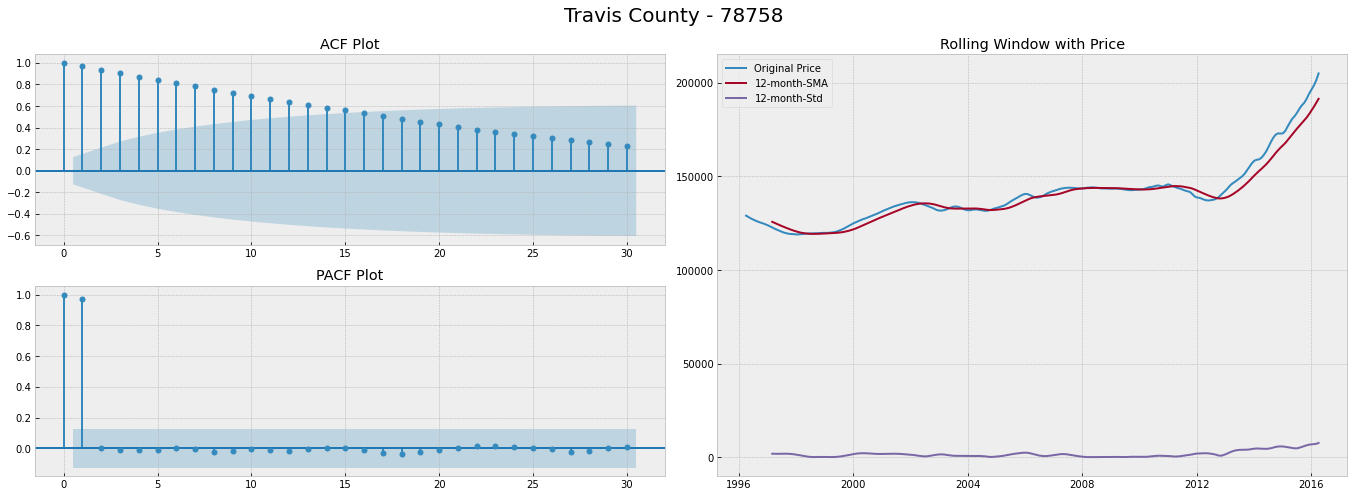

In [55]:
pacf_acf_rolling(train_78758, 'Travis', 78758)

- ACF plot suggests data is not stationary because it has a downward gradual slope
    - Significant correlation up to 15 lags 
- PACF plot drops off steeply after first lag suggesting little relationship to time
- Standard deviation picks up around 2013 and there is a clear upward trend at this time

In [56]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_decomposition(train, county, zip_, model_type='Additive'):
    # Gather the trend, seasonality, and residuals 
    train=train.to_frame()
    decomposition = seasonal_decompose(train['value'],model=model_type)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot gathered statistics
    with plt.style.context('fivethirtyeight'):
        
        plt.figure(figsize=(12,8))
        plt.subplot(411, title=f'{county} County - {zip_}')
        plt.plot(train['value'], label='Original', color='blue')
        plt.legend(loc='best')
        plt.subplot(412)
        plt.plot(trend, label='Trend', color='blue')
        plt.legend(loc='best')
        plt.subplot(413)
        plt.plot(seasonal,label='Seasonality', color='blue')
        plt.legend(loc='best')
        plt.subplot(414)
        plt.plot(residual, label='Residuals', color='blue')
        plt.legend(loc='best')
        plt.tight_layout()

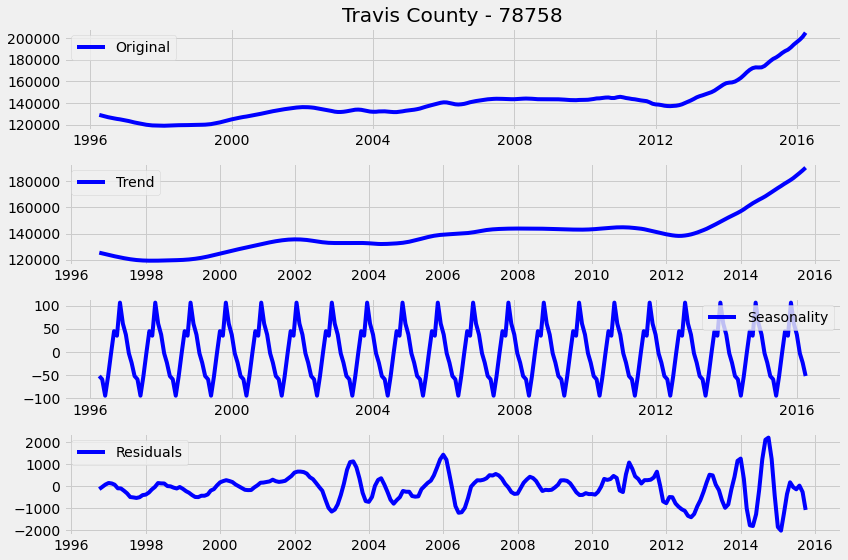

In [57]:
seasonal_decomposition(train_78758, 'Travis', 78758)

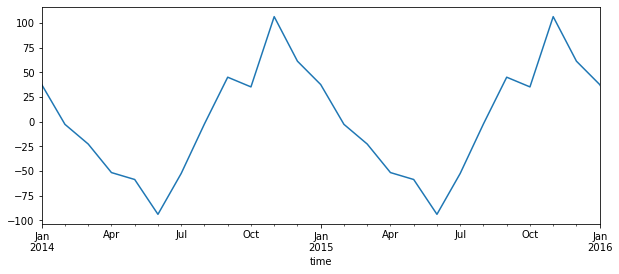

In [190]:
decomposition = seasonal_decompose(train_78758,model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2014-01-01', '2016-01-01'));

- There is an upward trend beginning in 2013
- Data is seasonal wiht peaks in the summer months (June-Sept) and dips in the winter months
- Seasonality appears constant
- Residuals suggest more variance after the upward trend in 2013

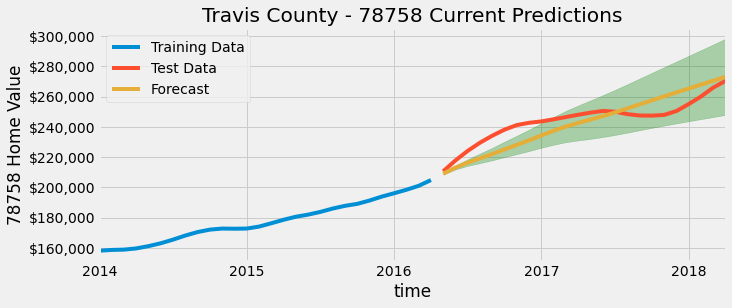

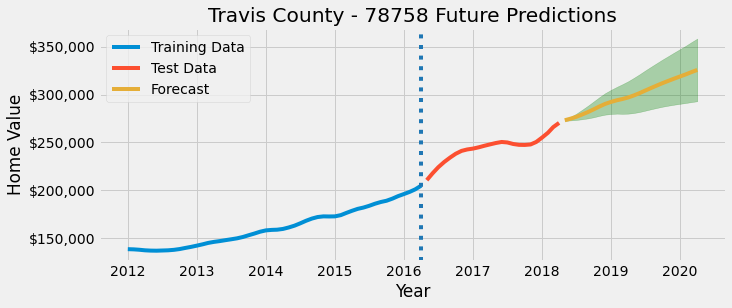

In [58]:
fig_78758, future_78758, forecast_df_78758, roi_78758 = model_predictions(train_78758, test_78758, df_78758, 78758, 'Travis')

In [191]:
roi_78758

{'Lower CI': [0.07520575524266447, 107520.57552426643, 7520.575524266431],
 'Upper CI': [0.30851281020908994, 130851.281020909, 30851.281020908995],
 'Forecast': [0.19213891296389998, 119213.89129639, 19213.891296389993]}

- Current predictions
    - Model captures general trend compared to test predictions
    - Confidence interal does a better job at capturing values after July 2017
- Future predictions
    - Model continues to follow general trend upward
    - Has a descent in mid-2019 and then continues upwards
- An investment of \$100,000 today (05/01/2018) by 05/01/2020 would yield (ROI):
    - Conservative estimate: 7.5\% (\$7,520)
    - Mean estimate: 19.2% (\$19,213)
    - Upper estimate: 30.9\% (\$30,851)

### 78721: EDA AND SARIMAX
- East Austin
- ~5 miles from Downtown

In [59]:
# Create 78721 dataframe

df_78721=create_zip_data(travis_dict_full, 78721)

(<Figure size 1368x504 with 3 Axes>,
                value
 count     265.000000
 mean   143692.452830
 std     51937.036652
 min     67600.000000
 25%    118700.000000
 50%    138800.000000
 75%    144600.000000
 max    297800.000000)

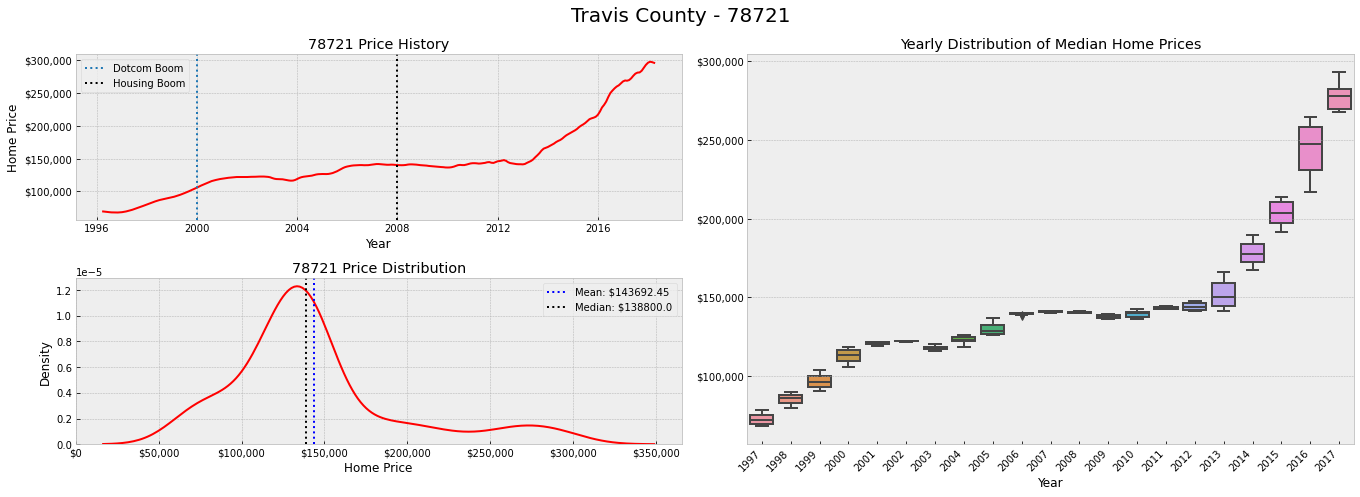

In [60]:
zip_eda(df_78721, 78721, 'Travis')

- Minimal impact on prices during dotcom crash and housing bust
- No large downturn but prices were stagnant between 2008 and 2012 before rising again
- Data is right skewed based on mean > median
- Historically prices are close to North Austin (78758)
- From 1997 to 2012 homes have minimal spread but begin to increase after that with significantly larger spread in 2013 and 2016

<AxesSubplot:xlabel='time'>

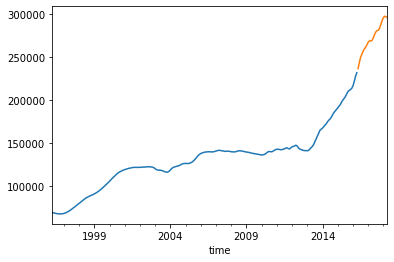

In [61]:
train_78721, test_78721 = create_train_test_split(df_78721, 0.91)
train_78721.plot()
test_78721.plot()

Split point looks like it accurately captures upward trend after 2013

Augmented Dickey-Fuller Test on 78722
ADF test statistic        0.753836
p-value                   0.990853
# lags used               9.000000
# observations          231.000000
critical value (1%)      -3.458980
critical value (5%)      -2.874135
critical value (10%)     -2.573482
dtype: float64


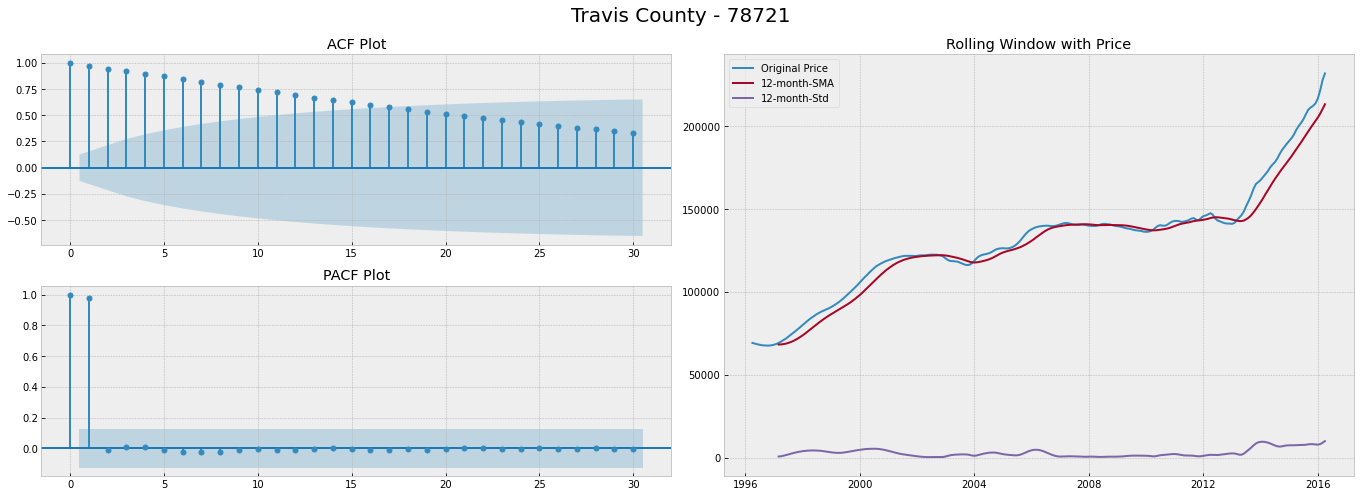

In [62]:
pacf_acf_rolling(train_78721, 'Travis', 78721)

- Based on Dickey Fuller test result data is not stationary, 0.99 > 0.05
- ACF plot suggests data is not stationary because it has a downward gradual slope
    - Significant correlation up to 16 lags 
- PACF plot drops off steeply after first lag suggesting little relationship to time
- Standard deviation picks up around 2013 and there is a clear upward trend at this time
- 12 month rolling average follows original data closely

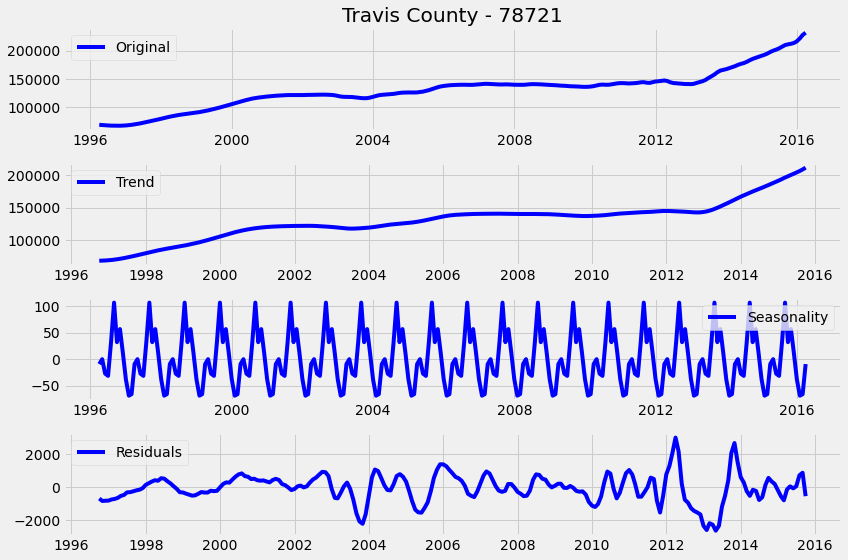

In [63]:
seasonal_decomposition(train_78721, 'Travis', 78721)

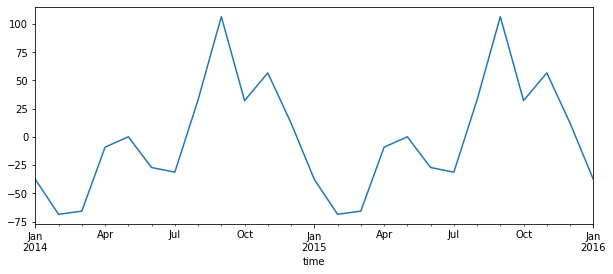

In [64]:
decomposition = seasonal_decompose(train_78721,model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2014-01-01', '2016-01-01'));

- There is an upward trend beginning in 2013
- Data is annually seasonal with peaks in months (Aug-Nov) and dips in (Feb-July)
- Seasonality appears constant
- Residuals suggest more variance after the upward trend in 2013, however they appear to borderline
homoskedastic
- Looks like data needs 1 degree of differencing on seasonality

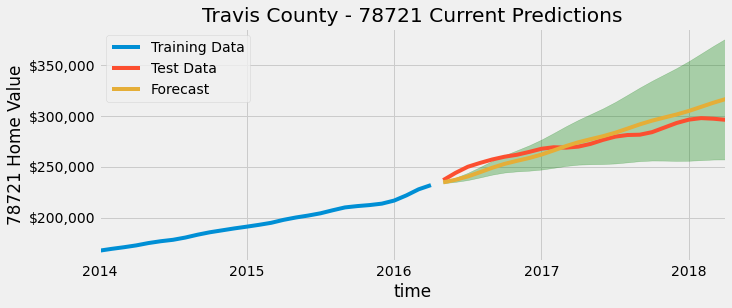

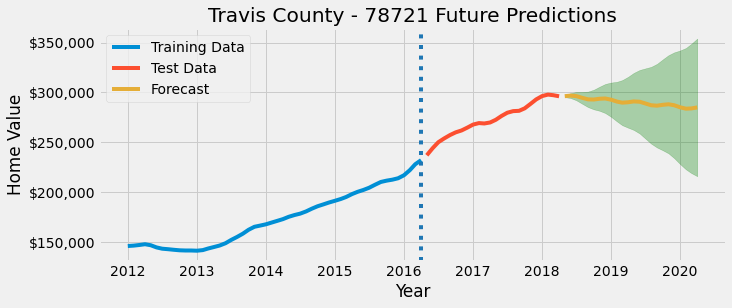

In [65]:
fig_78721, future_78721, forecast_df_78721, roi_78721 = model_predictions(train_78721, test_78721, df_78721, 78721, 'Travis')

In [66]:
roi_78721

{'Lower CI': [-0.2688608776766025, 73113.91223233975, -26886.087767660254],
 'Upper CI': [0.1911430110027367, 119114.30110027367, 19114.301100273675],
 'Forecast': [-0.03811420402484699, 96188.5795975153, -3811.4204024846986]}

- Current predictions
    - Model semi-captures general trend compared to test predictions
    - It tends to undershoot the test data
    - Confidence interal does a better job at capturing values after July 2017
- Future predictions
    - Model becomes more stagnant after 2018 and has a wide confidence interval
    - Slopes upward a bit in 2019
- An investment of \$100,000 today (05/01/2018) by 07/01/2020 would yield (ROI):
    - Conservative estimate: -26.9\% (-\$26,886)
    - Mean estimate: -3.8% (-\$3,811)
    - Upper estimate: 19.1\% (+\$19,114)

### 78744: EDA and SARIMAX
- South East Austin
- ~6.5 miles from Downtown

In [67]:
# Create 78744 dataframe

df_78744=create_zip_data(travis_dict_full, 78744)

(<Figure size 1368x504 with 3 Axes>,
                value
 count     265.000000
 mean   112487.169811
 std     25161.294558
 min     82000.000000
 25%     99700.000000
 50%    107900.000000
 75%    116900.000000
 max    195500.000000)

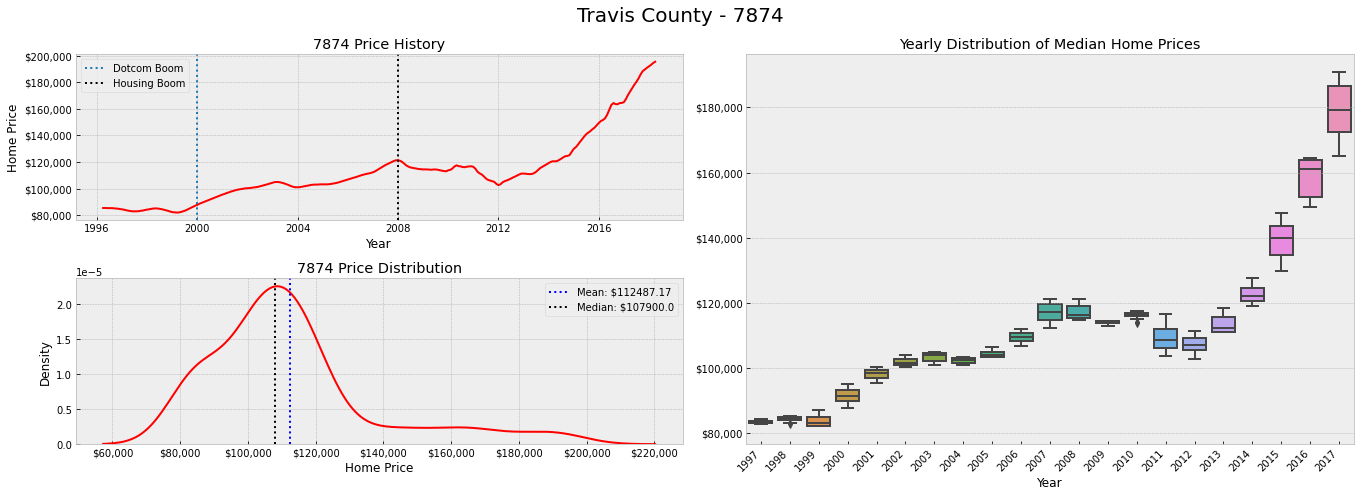

In [68]:
zip_eda(df_78744, 7874, 'Travis')

- Minimal impact on prices during dotcom crash and but large downturn after 2008 with another dip in 2012
    - Looks like the median house price recovered in 2013
- Data is right skewed based on mean > median
- Lowest standard deviation in Travis County of those compared agasint
- From 1997 to 2006 homes had minimal spread but 2007 and 2008 had more variability, spread increased from 2015 onwards
    - Suggests transactions are taking place at a wider range of values

<AxesSubplot:xlabel='time'>

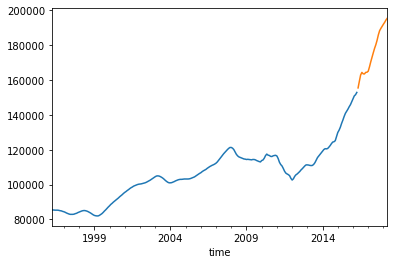

In [69]:
train_78744, test_78744 = create_train_test_split(df_78744, 0.91)
train_78744.plot()
test_78744.plot()

Split captures upwards trend and precedes slight dip in 2016

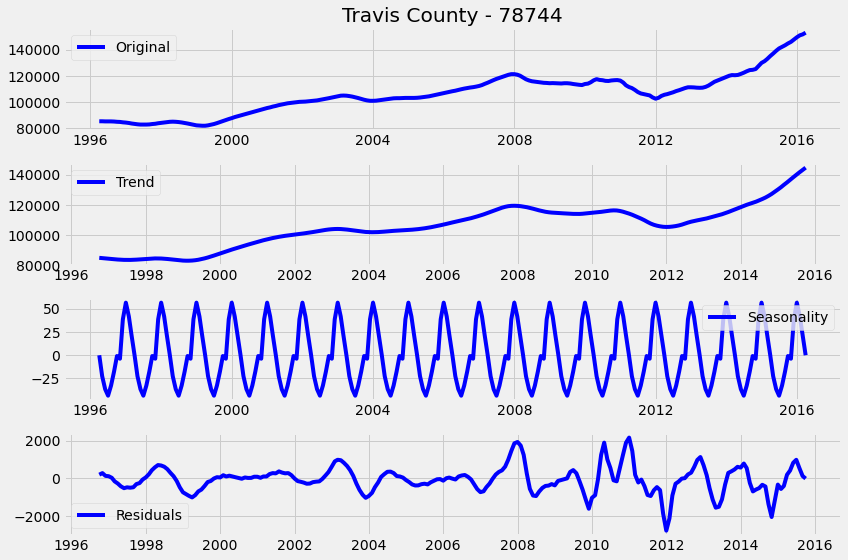

In [70]:
seasonal_decomposition(train_78744, 'Travis', 78744)

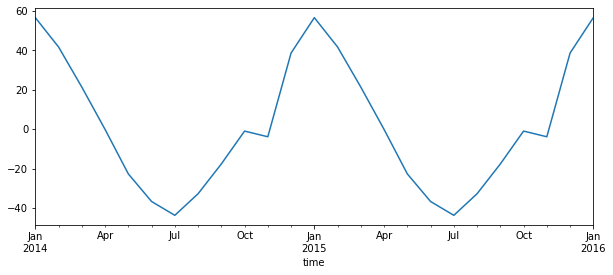

In [71]:
decomposition = seasonal_decompose(train_78744,model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2014-01-01', '2016-01-01'));

- There is an upward trend beginning in 2012
- Data is annually seasonal with peaks in months (Nov-Feb) and dips in summer (June-Sept)
- Seasonality appears constant
- Residuals suggest more variance in 2008 and a similar amount following that point in time
- Looks like data needs 1 degree of differencing on seasonality

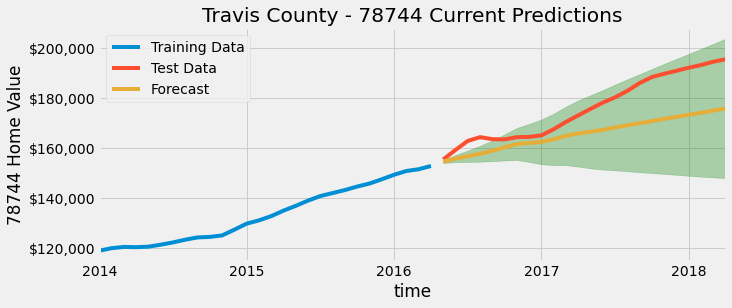

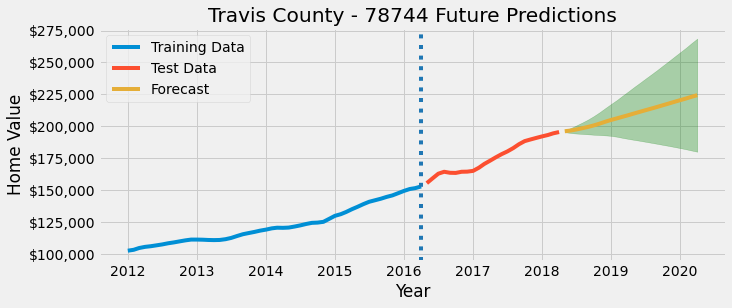

In [72]:
fig_78744, future_78744, forecast_df_78744, roi_78744 = model_predictions(train_78744, test_78744, df_78744, 78744, 'Travis')

In [73]:
roi_78744

{'Lower CI': [-0.0782107601600331, 92178.92398399669, -7821.07601600331],
 'Upper CI': [0.36463656856079163, 136463.65685607918, 36463.65685607918],
 'Forecast': [0.14404750671074446, 114404.75067107445, 14404.75067107445]}

- Current predictions
    - Model captures general trend compared to test predictions, all test values fall within CI
    - It tends to undershoot the test data, especially after 2017
    - As test data tapers off the model does capture that 
- Future predictions
    - Model follows trend of test data
    - Slopes upward a bit in mid - 2019
- An investment of \$100,000 today (05/01/2018) by 07/01/2020 would yield (ROI):
    - Conservative estimate: -7.8\% (-\$7,821)
    - Mean estimate: 14.4% (+\$14,404)
    - Upper estimate: 36.4\% (+\$36,463)

## Travis County Conclusions

- Model all 3 predictions in single graph
- Looks at risk assesment
- Observe correlation between the 3

In [79]:
def corr_check(df1, df2, df3, zip_1, zip_2, zip_3):
    df = pd.concat([df1, df2, df3], axis=1)
    df.columns = [zip_1, zip_2, zip_3]
    return df.corr()

In [80]:
corr_check(df_78758, df_78721, df_78744, 78758, 78721, 78744)

78758     78721     78744
78758  1.000000  0.967931  0.970744
78721  0.967931  1.000000  0.980363
78744  0.970744  0.980363  1.000000

- 78758 moves more closely with 78744
- 78721 moves more closely with 78744
- 78744 moves more closely with 78721

- This can be useful for picking up on trends using other nearby zip codes. They all move very closely together

In [74]:
# mess around with colors

def county_forecast_comparison(df1_all, zip_1, forecast1, df2_all, zip_2, forecast2, df3_all, zip_3, forecast3):
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(figsize=(12,5))

        fmt = '${x:,.0f}'
        tick = mtick.StrMethodFormatter(fmt)
        ax.yaxis.set_major_formatter(tick)

        # 78758
        ax.plot(df1_all['2006-01-01':], label=zip_1)
        ax.plot(forecast1['Forecast'], label=f'{zip_1} Forecast')
        ax.fill_between(forecast1.index,forecast1['Lower CI'], forecast1['Upper CI'], alpha=0.3,
                       color='red')
        ax.axvline(df1_all.index[-1], ls =':', lw=2)

        #78721
        ax.plot(df2_all['2006-01-01':], label=zip_2)
        ax.plot(forecast2['Forecast'], label=f'{zip_2} Forecast')
        ax.fill_between(forecast2.index,forecast2['Lower CI'], forecast2['Upper CI'], alpha=0.3,
                       color='green')

        #78744
        ax.plot(df3_all['2006-01-01':], label=zip_3)
        ax.plot(forecast3['Forecast'], label=f'{zip_3} Forecast')
        ax.fill_between(forecast3.index,forecast3['Lower CI'], forecast3['Upper CI'], alpha=0.2,
                       color='blue')

        ax.legend(loc=2)

In [76]:
def county_forecast_perc_comparison(roi1, zip_1, roi2, zip_2, roi3, zip_3):
    test_1 = pd.DataFrame(roi1, index=[f'{zip_1} Perc Change', 'Val', '$ Diff'])
    test_2 = pd.DataFrame(roi2, index=[f'{zip_2} Perc Change', 'Val', '$ Diff'])
    test_3 = pd.DataFrame(roi3, index=[f'{zip_3} Perc Change', 'Val', '$ Diff'])
    df = pd.concat([test_1, test_2, test_3], axis=0)
    return df

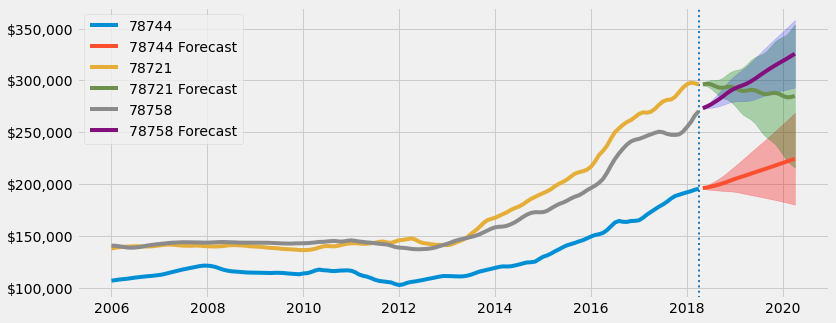

In [75]:
county_forecast_comparison(df_78744, 78744, forecast_df_78744, df_78721, 78721, forecast_df_78721,  df_78758, 78758, forecast_df_78758)

- 78758 has the highest ending point with the tightest confidence interval
- 78721 has almost as high of upside potential as 78758 but it has a much greater standard devation and tends to curve downwards
- 78744 slopes upward and has a standard deviation between the two other zip codes

In [214]:
# Zip codes are their own row
# Column would be percent change val/$ diff
# original that works

def county_forecast_perc_comparison(roi1, zip_1, roi2, zip_2, roi3, zip_3):
    test_1 = pd.DataFrame(roi1, index=[f'{zip_1} Perc Change', 'Val', '$ Diff'])
    test_2 = pd.DataFrame(roi2, index=[f'{zip_2} Perc Change', 'Val', '$ Diff'])
    test_3 = pd.DataFrame(roi3, index=[f'{zip_3} Perc Change', 'Val', '$ Diff'])
    df = pd.concat([test_1, test_2, test_3], axis=0)
    return df

In [224]:
def county_forecast_perc_comparison(roi1, zip_1, roi2, zip_2, roi3, zip_3):
    test_1 = pd.DataFrame(roi1, columns=['Perc Change', 'Val', '$ Diff'], index=[zip_1])
    test_2 = pd.DataFrame(roi2, columns=['Perc Change', 'Val', '$ Diff'], index=[zip_2])
    test_3 = pd.DataFrame(roi3, columns=['Perc Change', 'Val', '$ Diff'], index=[zip_3])
    df = pd.concat([test_1, test_2, test_3], axis=0)
    return df

In [225]:
travis_perc_comparison = county_forecast_perc_comparison(roi_78758, 78758, roi_78721, 78721, roi_78744, 78744)

In [230]:
pd.DataFrame(roi_78721, index=['Perc Change', 'Val', '$ Diff']).T

Perc Change            Val        $ Diff
Lower CI    -0.268861   73113.912232 -26886.087768
Upper CI     0.191143  119114.301100  19114.301100
Forecast    -0.038114   96188.579598  -3811.420402

In [238]:
# Loop thru columns to 

pd.DataFrame({78758:pd.Series(roi_78758)[0], 78721:pd.Series(roi_78721)[0]}).T.columns=

0              1             2
78758  0.075206  107520.575524   7520.575524
78721 -0.268861   73113.912232 -26886.087768

In [226]:
travis_perc_comparison

Perc Change  Val $ Diff
78758         NaN  NaN    NaN
78721         NaN  NaN    NaN
78744         NaN  NaN    NaN

- Based on the downside risk, upside return, and mean predicted value, 78758 seems like the superior zip code
- While it's upside is not as high as 78744, it has a much more predictable return profile and has the highest predicted forecast
- 78721 has the worst metrics across the board
- **In Travis county, 78758 has the best prospects for near term growth**

## Bexar County Modeling
- Located in San Antonio metro
- Population: 2,003,554
- Median home value of $229,100 as of April 2018

### 78212: EDA and SARIMAX
- Midtown San Antonio
- 4 miles from Downtown

In [81]:
# Create 78212 dataframe

df_78212=create_zip_data(Bexar_dict_full, 78212)

(<Figure size 1368x504 with 3 Axes>,
                value
 count     265.000000
 mean   115321.509434
 std     31134.681006
 min     79100.000000
 25%     89900.000000
 50%    114600.000000
 75%    121900.000000
 max    229100.000000)

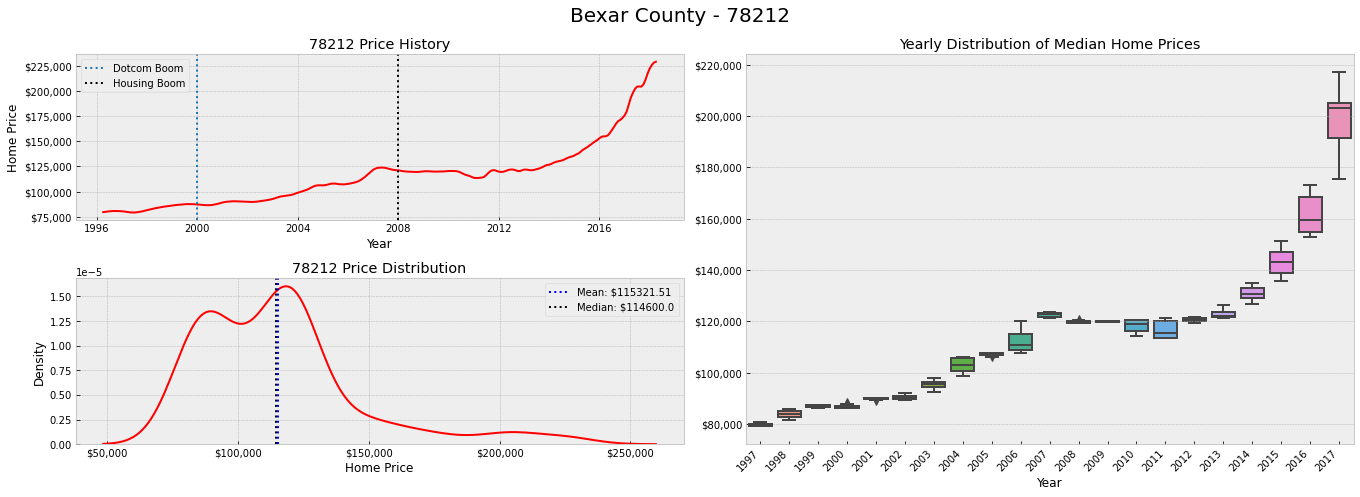

In [83]:
zip_eda(df_78212, 78212, 'Bexar')

- Minimal impact on prices during dotcom crash and minimala downturn after 2008 with another dip in 2012 followed by strong recovery shortly after
    - Looks like the median house price recovered in 2013
- Data is slightly right skewed based on mean > median
- Data appears sort of bimodal suggesting there were swings when prices were much lower and now much higher, was not a continuous shift
- From 1997 to 2005 homes had minimal spread but 2006 had more variability, spread increased from 2015 onwards
    - Suggests transactions are taking place at a wider range of values throughout the year

<AxesSubplot:xlabel='time'>

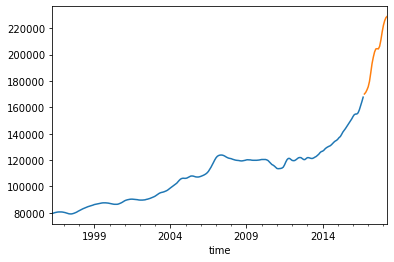

In [84]:
train_78212, test_78212 = create_train_test_split(df_78212, 0.93)
train_78212.plot()
test_78212.plot()

- Split point detects recent upward (possibly exponential) trend
- Initially used 0.90 but it was not capturing the trend well so used 0.93 of the training data

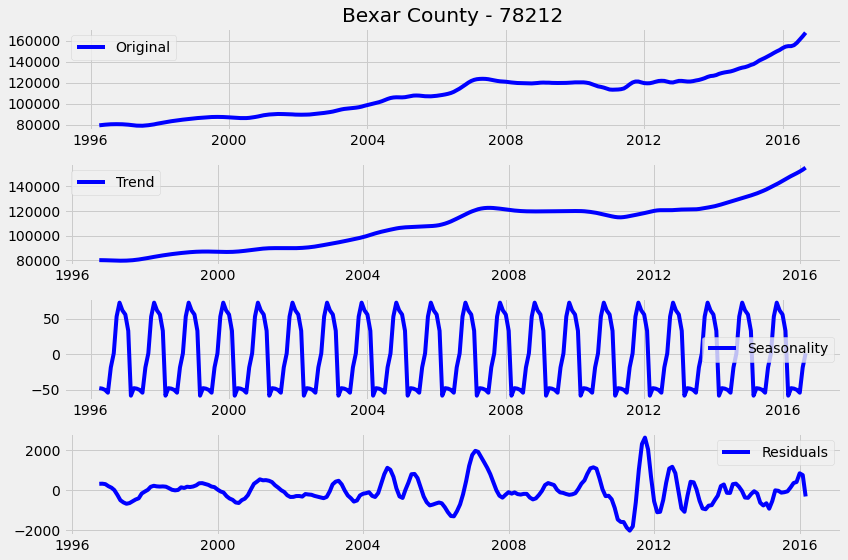

In [85]:
seasonal_decomposition(train_78212, 'Bexar', 78212)

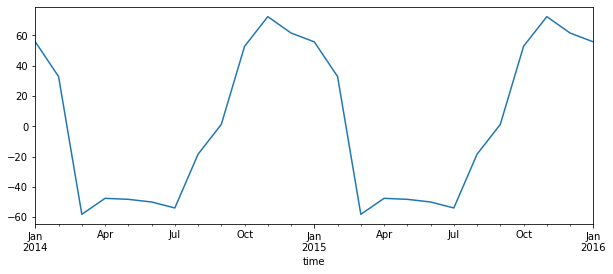

In [86]:
decomposition = seasonal_decompose(train_78212,model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2014-01-01', '2016-01-01'));

- There is an upward trend beginning in 2011
- Data is annually seasonal with peaks in months (Oct-Feb) and dips in summer (June-Sept)
- Seasonality appears constant
- Residuals suggest more variance in 2008 and a similar amount following that point in time
    - Lower variance beginning in 2014
- Looks like data needs 1 degree of differencing on seasonality

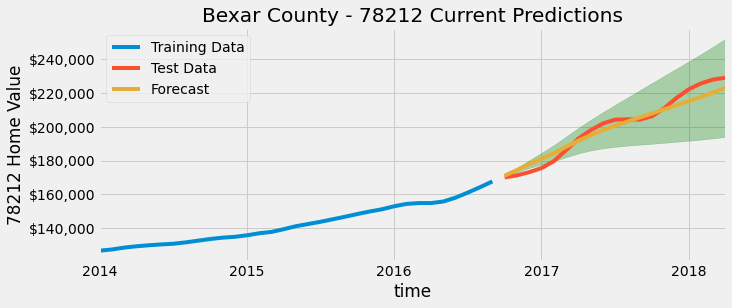

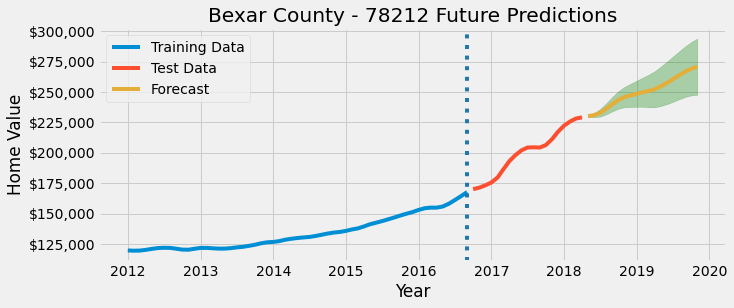

In [87]:
fig_78212, future_78212, forecast_df_78212, roi_78212 = model_predictions(train_78212, test_78212, df_78212, 78212, 'Bexar')

In [193]:
roi_78212

{'Lower CI': [0.07944511492223134, 107944.51149222313, 7944.51149222313],
 'Upper CI': [0.27361853144748954, 127361.85314474895, 27361.85314474895],
 'Forecast': [0.17680210000466143, 117680.21000046613, 17680.210000466133]}

- Current predictions
    - Model captures general trend compared to test predictions, all test values fall within CI
    - The predictions look like they follow a rolling average of the model
- Future predictions
    - Model follows trend of test data
    - Slopes upward a bit in mid - 2019
- An investment of \$100,000 today (05/01/2018) by 11/01/2019 would yield (ROI):
    - Conservative estimate: 7.9\% (\$7,994)
    - Mean estimate: 17.7% (+\$17,680)
    - Upper estimate: 27.4\% (+\$27,361)

### 78201: EDA and SARIMAX
- Monticello Park, San Antonio
- 5.4 miles from Downtown

In [88]:
# Create 78201 dataframe

df_78201=create_zip_data(Bexar_dict_full, 78201)

(<Figure size 1368x504 with 3 Axes>,
                value
 count     265.000000
 mean    78893.584906
 std     17210.957034
 min     59100.000000
 25%     64800.000000
 50%     78500.000000
 75%     84300.000000
 max    140600.000000)

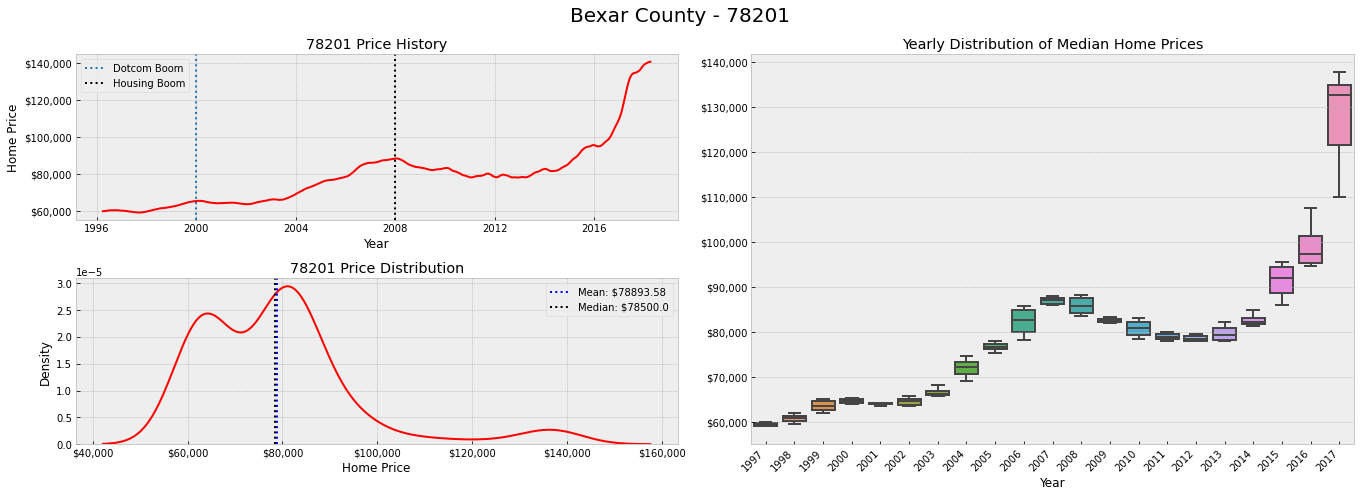

In [89]:
zip_eda(df_78201, 78201, 'Bexar')

- Small downward trend after dotcom boom with a rise up to 2008 and then a big fall
    - median house price recovered in 2015
- Data is slightly right skewed
- Data appears sort of bimodal suggesting there were swings when prices were much lower and now much higher, was not a continuous shift
- Not too much spread between home prices except for in 2006 and a very large spread in 2017

<AxesSubplot:xlabel='time'>

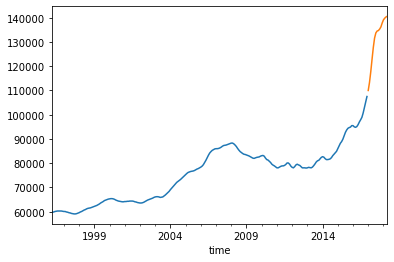

In [200]:
train_78201, test_78201 = create_train_test_split(df_78201, 0.94)
train_78201.plot()
test_78201.plot()

- Had to adjust split point from 0.90 to 0.94 because model was not able to capture new upward trend

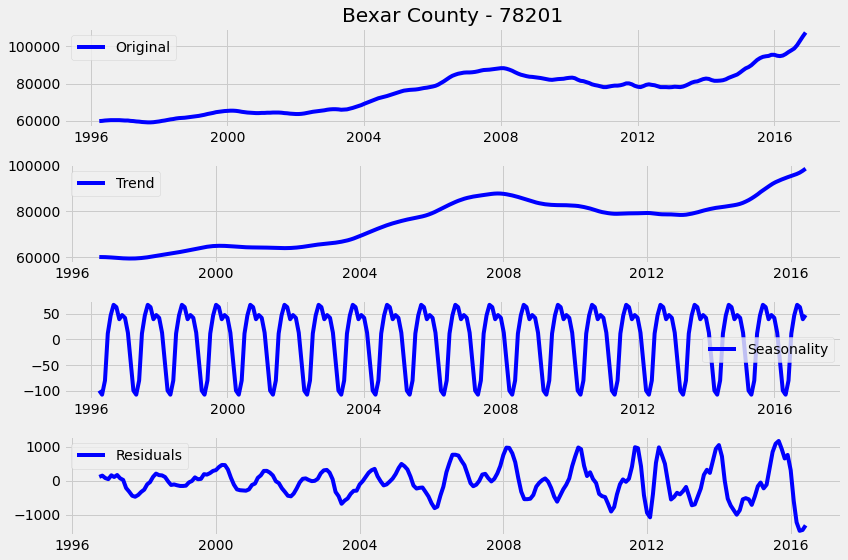

In [201]:
seasonal_decomposition(train_78201, 'Bexar', 78201)

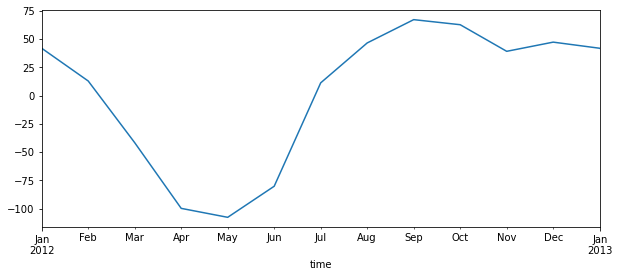

In [202]:
decomposition = seasonal_decompose(train_78201,model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2012-01-01', '2013-01-01'));

- There is an upward trend beginning in 2013
- Affected more by 2008 crash than other zip codes
- Data is annually seasonal with peaks in months (July-Oct) and dips in spring (Mar-May)
- Seasonality appears constant
- Residuals suggest more variance in 2008 and a similar amount following that point in time
    - Continuously increases
- Looks like data needs 1 degree of differencing on seasonality

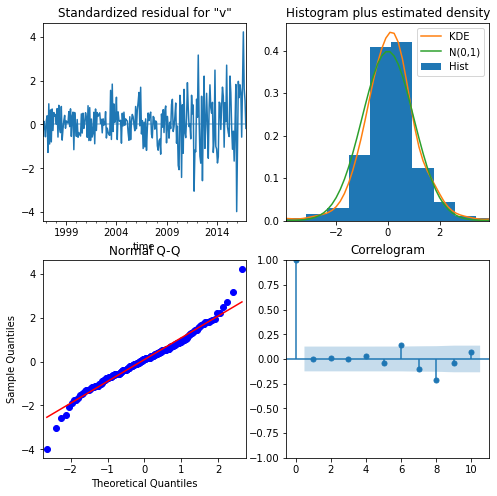

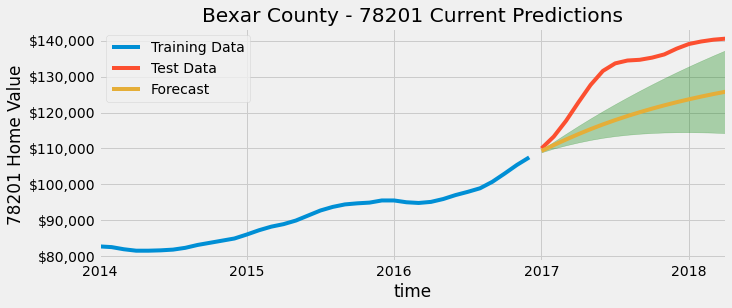

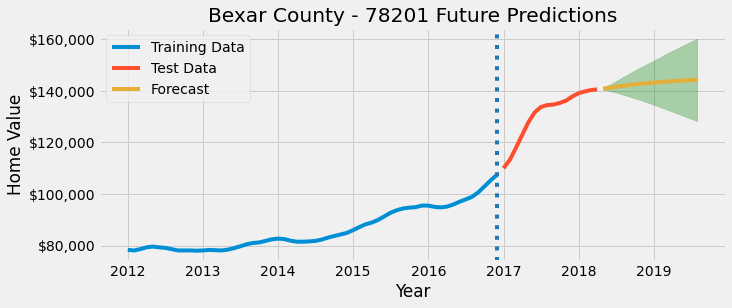

In [207]:
fig_78201, future_78201, forecast_df_78201, roi_78201 = model_predictions(train_78201, test_78201, df_78201, 78201, 'Bexar')

In [208]:
roi_78201

{'Lower CI': [-0.08668127170465845, 91331.87282953416, -8668.127170465843],
 'Upper CI': [0.13400088311669692, 113400.0883116697, 13400.088311669693],
 'Forecast': [0.024010324701326687, 102401.03247013266, 2401.032470132661]}

- Current predictions
    - Model captures general trend compared to test predictions, however it undershoots the test data
    - Same shape but shifted below by a constant value
- Future predictions
    - Stays stagnant after test data
- An investment of \$100,000 today (05/01/2018) by 11/01/2019 would yield (ROI):
    - Conservative estimate: -8.7\% (-\$8,668)
    - Mean estimate: 2.3% (+\$2,401)
    - Upper estimate: 13.4\% (+\$13,400)

### 78210: EDA and SARIMAX

In [95]:
# Create 78210 dataframe

df_78210=create_zip_data(Bexar_dict_full, 78210)

(<Figure size 1368x504 with 3 Axes>,
                value
 count     265.000000
 mean    67078.867925
 std     12593.568233
 min     50500.000000
 25%     56600.000000
 50%     68400.000000
 75%     72200.000000
 max    119400.000000)

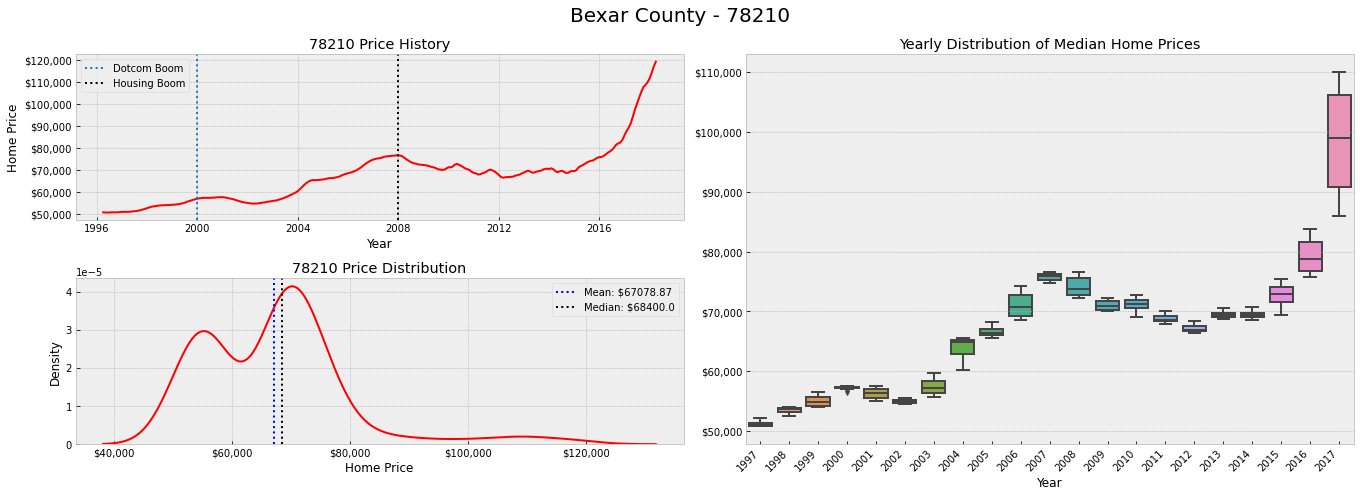

In [96]:
zip_eda(df_78210, 78210, 'Bexar')

- Small downward trend after dotcom boom with a rise up to 2008 and then a big fall
    - Median house price recovered in 2015
- Data is slightly right skewed
- Data appears sort of bimodal suggesting there were swings when prices were much lower and now much 
higher, was not a continuous shift
    - There was a peak price around 2006 and then a new peak price reached in 2017
- Not too much spread between home prices except for in 2006 and a very large spread in 2017

<AxesSubplot:xlabel='time'>

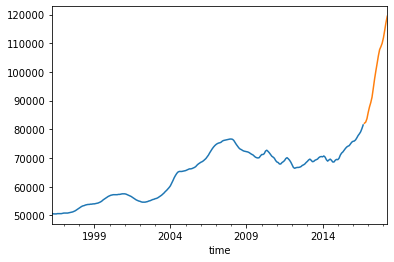

In [97]:
train_78210, test_78210 = create_train_test_split(df_78210, 0.93)
train_78210.plot()
test_78210.plot()

- Original split at 0.90 but deviated to 0.93

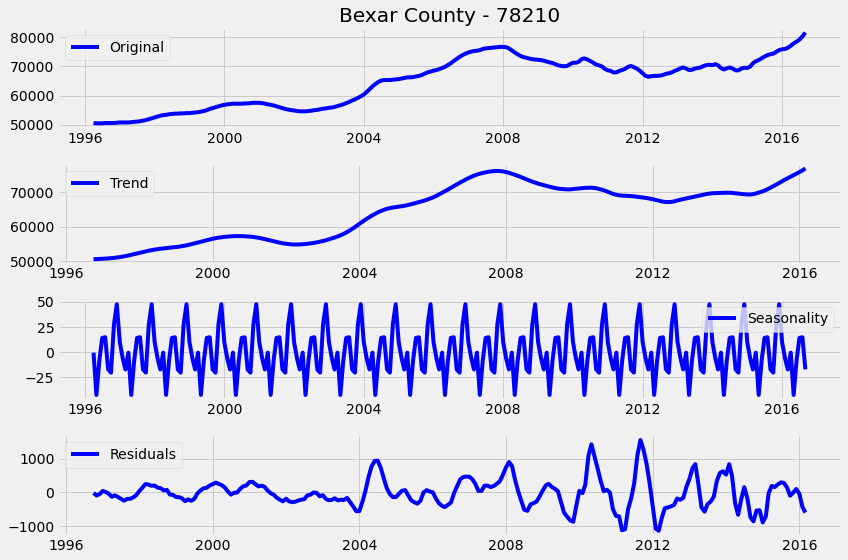

In [98]:
seasonal_decomposition(train_78210, 'Bexar', 78210)

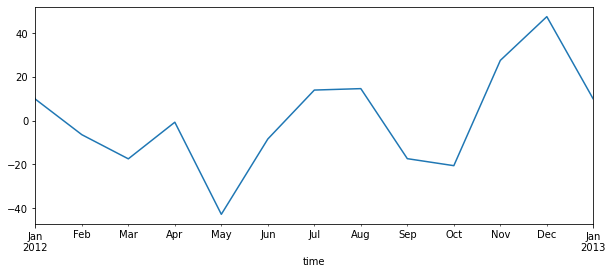

In [99]:
decomposition = seasonal_decompose(train_78210,model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2012-01-01', '2013-01-01'));

- There is an upward trend beginning in 2013
- Big downward swing in trend in 2008 and 2002
- Data is annually seasonal with peaks in months (Oct-Jan) and dips in spring (Apr-June)
- Seasonality appears constant
- Residuals have the most variance in 2012
- Looks like data needs 1 degree of differencing on seasonality

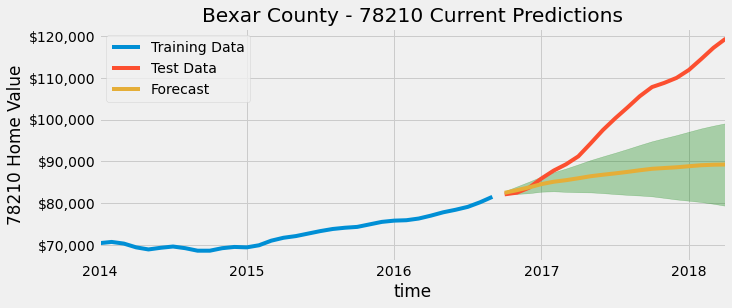

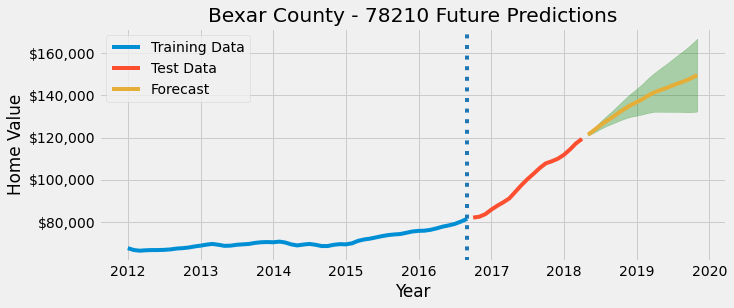

In [100]:
fig_78210, future_78210, forecast_df_78210, roi_78210 = model_predictions(train_78210, test_78210, df_78210, 78210, 'Bexar')

In [239]:
roi_78210

{'Lower CI': [0.09419980807344343, 109419.98080734434, 9419.980807344342],
 'Upper CI': [0.3700735265708664, 137007.35265708662, 37007.35265708662],
 'Forecast': [0.23263775992395297, 123263.77599239531, 23263.775992395313]}

- Current predictions
    - Model captures general trend poorly especially as the test values continue into 2018
    - The predictions shift downward which is the opposite of what truly occurs
- Future predictions
    - Continues upward with a slight downward bend in mid-2019
- An investment of \$100,000 today (05/01/2018) by 11/01/2019 would yield (ROI):
    - Conservative estimate: 9.4\% (\$9,419)
    - Mean estimate: 23.3% (+\$23,263)
    - Upper estimate: 37.0\% (+\$37,007)

## Bexar County Conclusion

In [103]:
corr_check(df_78212, df_78201, df_78210, 78212, 78201, 78210)

78212     78201     78210
78212  1.000000  0.985177  0.962089
78201  0.985177  1.000000  0.984328
78210  0.962089  0.984328  1.000000

- 78212 moves more closely with 78201
- 78201 moves equally closely with 78212 and 78210
- 78210 moves more closely with 78701

- This can be useful for picking up on trends using other nearby zip codes. They all move very closely together

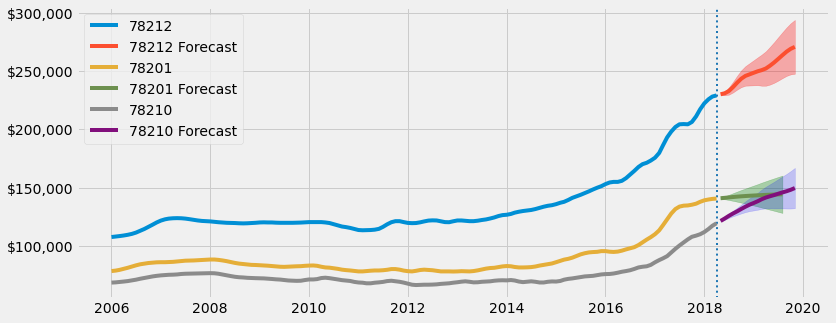

In [101]:
county_forecast_comparison(df_78212, 78212, forecast_df_78212, df_78201, 78201, forecast_df_78201,  df_78210, 78210, forecast_df_78210)

- 78212 has the highest ending point with the tightest confidence interval
- 78201 has almost as high of upside potential as 78210 and they are both relatively close
    - Curves downward at the end slightly
- 78210 follows a similar trajectory as 78201 but has a more upward slope towards the end of the predictions

In [102]:
bexar_perc_comparison = county_forecast_perc_comparison(roi_78212, 78212, roi_78201, 78201, roi_78210, 78210)
bexar_perc_comparison

Lower CI       Upper CI       Forecast
78212 Perc Change       0.079445       0.273619       0.176802
Val                107944.511492  127361.853145  117680.210000
$ Diff               7944.511492   27361.853145   17680.210000
78201 Perc Change      -0.086681       0.134001       0.024010
Val                 91331.872830  113400.088312  102401.032470
$ Diff              -8668.127170   13400.088312    2401.032470
78210 Perc Change       0.094200       0.370074       0.232638
Val                109419.980807  137007.352657  123263.775992
$ Diff               9419.980807   37007.352657   23263.775992

- Based on the downside risk, upside return, and mean predicted value, 78210 seems like the superior zip code
- It has the highest upside, the highest predictions
- 78212 has promising predictions but it does not have as much upside, however it does have a more predictable
range of values
- **In Bexar county, 78210 has the best prospects for near term growth**

## Harris County Modeling
- Located in Houston metro
- Population: 4,698,619

### 77092: EDA and SARIMAX
- Fairbanks Houston
- 11.5 miles from Downtown

In [104]:
# Create 78210 dataframe

df_77092=create_zip_data(Harris_dict_full, 77092)

(<Figure size 1368x504 with 3 Axes>,
                value
 count     265.000000
 mean   144012.075472
 std     33847.416163
 min     95600.000000
 25%    124000.000000
 50%    139500.000000
 75%    143700.000000
 max    249300.000000)

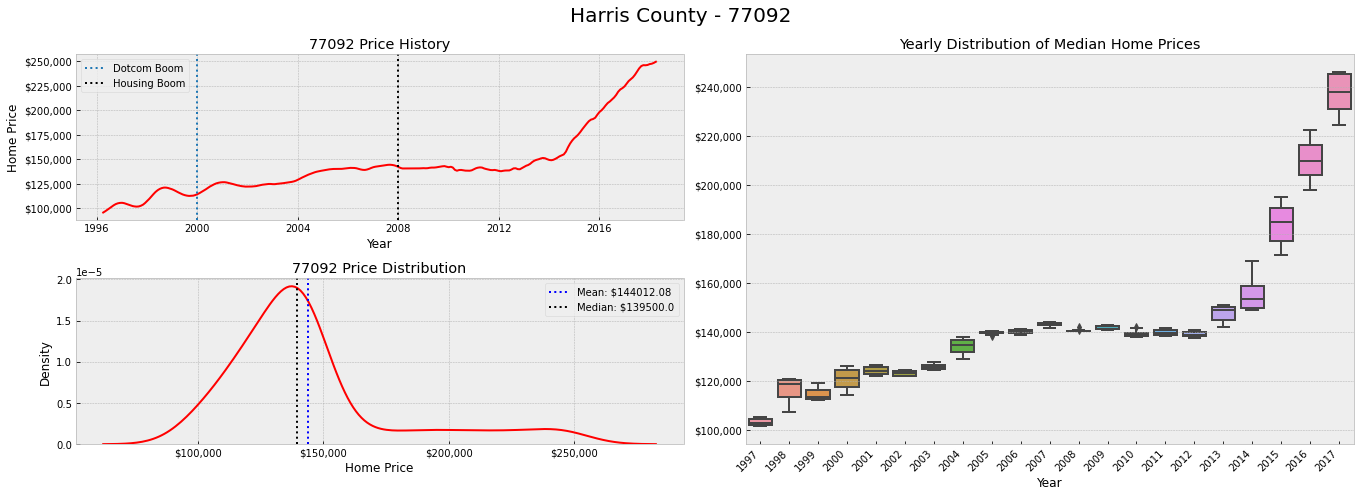

In [105]:
zip_eda(df_77092, 77092, 'Harris')

- Small downward trend after dotcom boom with a rise up to 2008 and then a gradual leveling until an increase in 2014
    - Median house price recovered in 2014 but was not significant affected
- Data is slightly right skewed
- Based on the shape there are more homes that are more expensive than the average than less which reflects the recent upward trend the zip code has been experiencing
    - Prices have steadily risen
- Minimal spread between years unitl 2014 and then spread has gradually increased

<AxesSubplot:xlabel='time'>

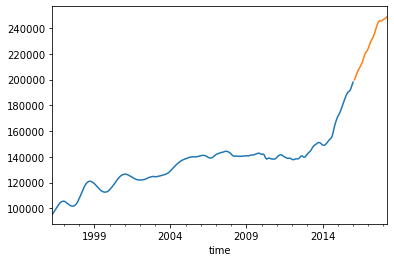

In [106]:
train_77092, test_77092 = create_train_test_split(df_77092, 0.90)
train_77092.plot()
test_77092.plot()

Baseline split at 0.90

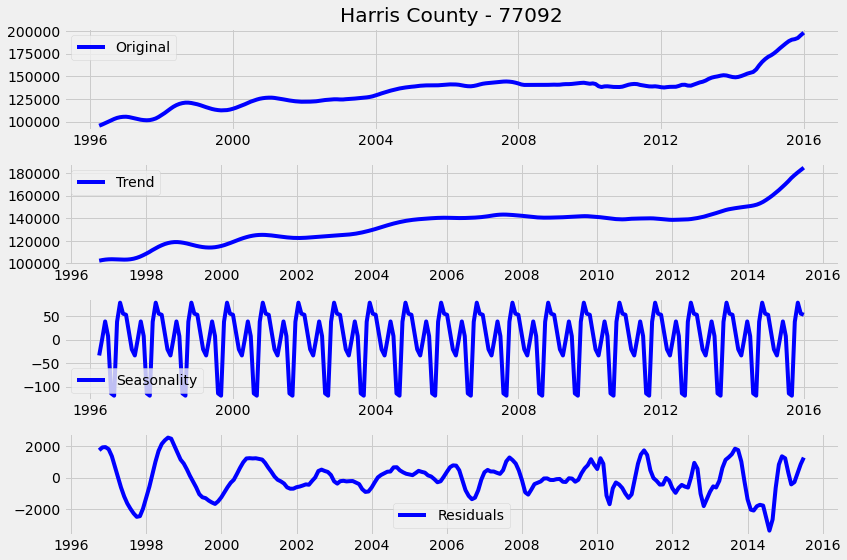

In [107]:
seasonal_decomposition(train_77092, 'Harris', 77092)

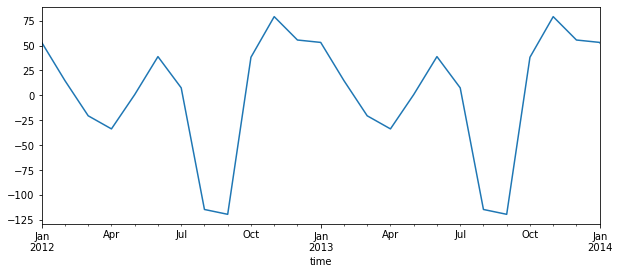

In [108]:
decomposition = seasonal_decompose(train_77092,model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2012-01-01', '2014-01-01'));

- There is an upward trend beginning in 2014
    - Prior, trend was stagnant
- Data is annually seasonal with peaks in months (Oct-Jan) and dips in spring (June-Aug)
- Seasonality appears constant
- Residuals have the most variance up to 2000 and past 2012
- Looks like data needs 1 degree of differencing on seasonality

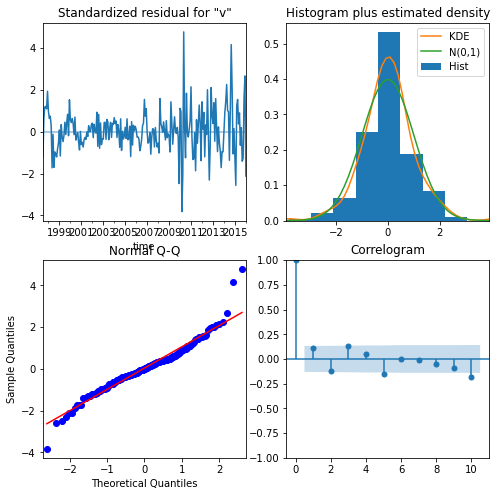

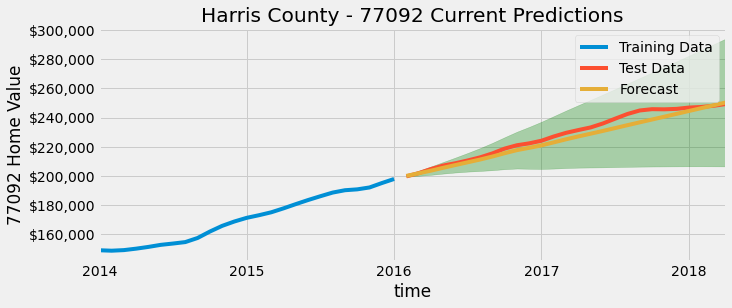

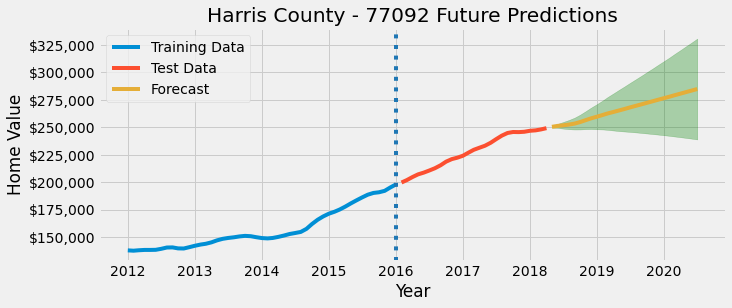

In [243]:
fig_77092, future_77092, forecast_df_77092, roi_77092 = model_predictions(train_77092, test_77092, df_77092, 77092, 'Harris')

In [244]:
roi_77092

{'Lower CI': [-0.04321599776274212, 95678.4002237258, -4321.5997762742045],
 'Upper CI': [0.31696593080350516, 131696.59308035052, 31696.593080350518],
 'Forecast': [0.13736790632659834, 113736.79063265985, 13736.790632659846]}

- Current predictions
    - Model captures general trend very well, stays tight with the real values
    - Slight noise in true values that the prediction does not pick up on
- Future predictions
    - Increases upward slope with a wide confidence interval
- An investment of \$100,000 today (05/01/2018) by 11/01/2019 would yield (ROI):
    - Conservative estimate: -4.3\% (-\$4,321)
    - Mean estimate: 13.7% (+\$13,736)
    - Upper estimate: 31.7\% (+\$31,696)

### 77021: EDA and SARIMAX
- South Houston
- 6.4 miles from Downtown

In [110]:
# Create 782021 dataframe

df_77021=create_zip_data(Harris_dict_full, 77021)

(<Figure size 1368x504 with 3 Axes>,
                value
 count     265.000000
 mean    72533.962264
 std     15263.205204
 min     44600.000000
 25%     61900.000000
 50%     71900.000000
 75%     81800.000000
 max    124700.000000)

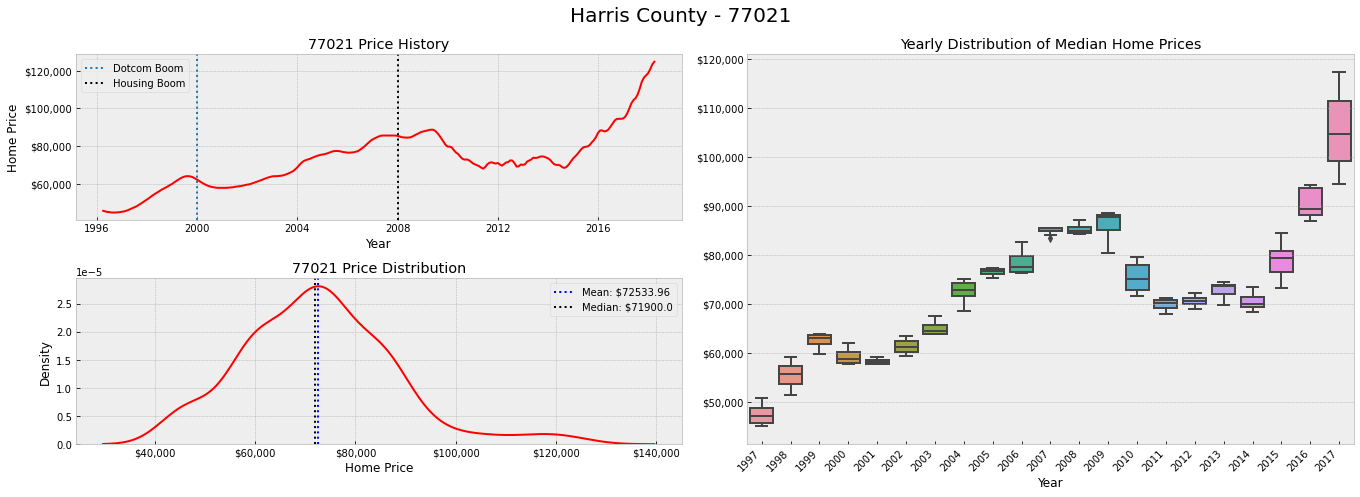

In [111]:
zip_eda(df_77021, 77021, 'Harris')

- Small downward trend after dotcom boom with a rise up to 2008 and then a crash until 2015
    - Median house price recovered in 2016, pretty strongly affected
- Data is slightly right skewed
- Based on the shape there are more homes that are more expensive than the average than less which reflects the recent upward trend the zip code has been experiencing
    - Prices have steadily risen since 2016
- Minimal spread between years unitl 2008 and then spread has been increasing again since 2016

<AxesSubplot:xlabel='time'>

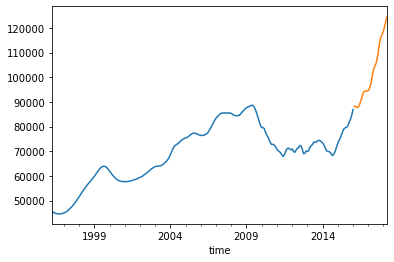

In [112]:
train_77021, test_77021 = create_train_test_split(df_77021, 0.90)
train_77021.plot()
test_77021.plot()

Baseline split point 0.90

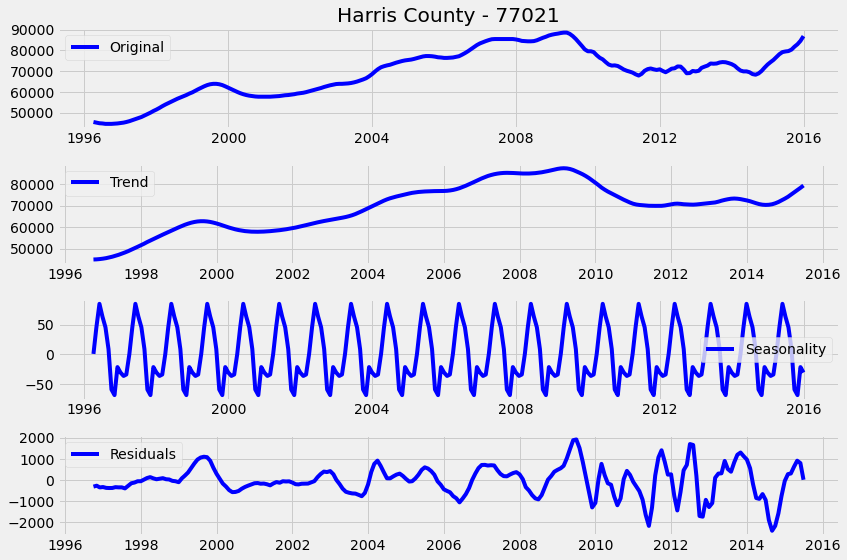

In [113]:
seasonal_decomposition(train_77021, 'Harris', 77021)

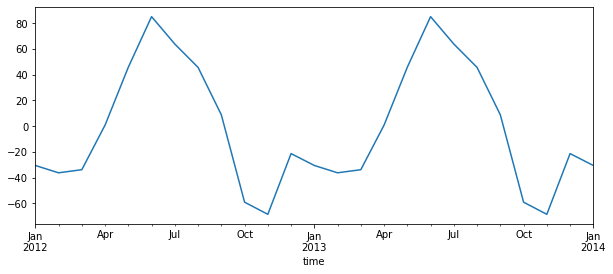

In [114]:
decomposition = seasonal_decompose(train_77021,model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2012-01-01', '2014-01-01'));

- There is an upward trend from 2002 to 2009 and then it dips and begins to recover in 2013
- Data is annually seasonal with peaks in months (April-August) and dips in spring (Sept-Jan)
- Seasonality appears constant
- Residuals have the most variance between 2010 and 2016
- Looks like data needs 1 degree of differencing on seasonality

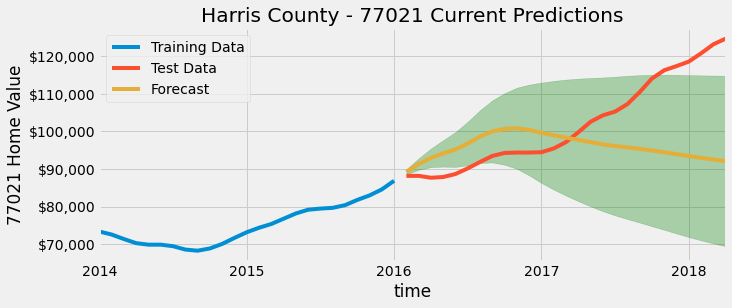

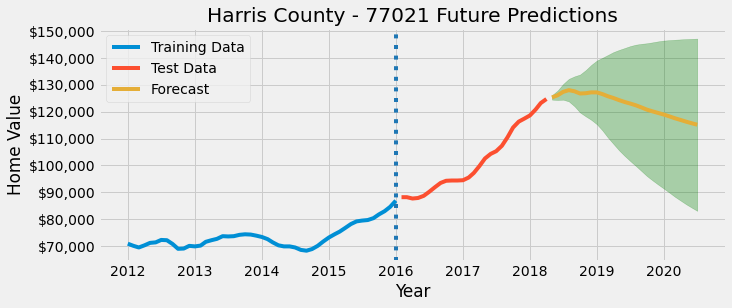

In [115]:
fig_77021, future_77021, forecast_df_77021, roi_77021 = model_predictions(train_77021, test_77021, df_77021, 77021, 'Harris')

In [246]:
roi_77021

{'Lower CI': [-0.33226377476658764, 66773.62252334124, -33226.37747665876],
 'Upper CI': [0.16710466083824432, 116710.46608382443, 16710.46608382443],
 'Forecast': [-0.08097462904054722, 91902.53709594528, -8097.462904054715]}

- Current predictions
    - Model captures general trend very well in terms of confidence interval but skews down as test data goes up
- Future predictions
    - Deviates significant from the trend and tilts downward as the past data goes up
- An investment of \$100,000 today (05/01/2018) by 11/01/2019 would yield (ROI):
    - Conservative estimate: -33.2\% (-\$33,226)
    - Mean estimate: -8.0% (-\$8,097)
    - Upper estimate: 16.7\% (+\$16,710)

### 77043: EDA and SARIMAX
- Spring Branch Houston
- 15.6 miles from Downtown

In [116]:
# Create 77043 dataframe

df_77043=create_zip_data(Harris_dict_full, 77043)

(<Figure size 1368x504 with 3 Axes>,
                value
 count     265.000000
 mean   181516.981132
 std     42886.499853
 min    123300.000000
 25%    159400.000000
 50%    168800.000000
 75%    174000.000000
 max    309500.000000)

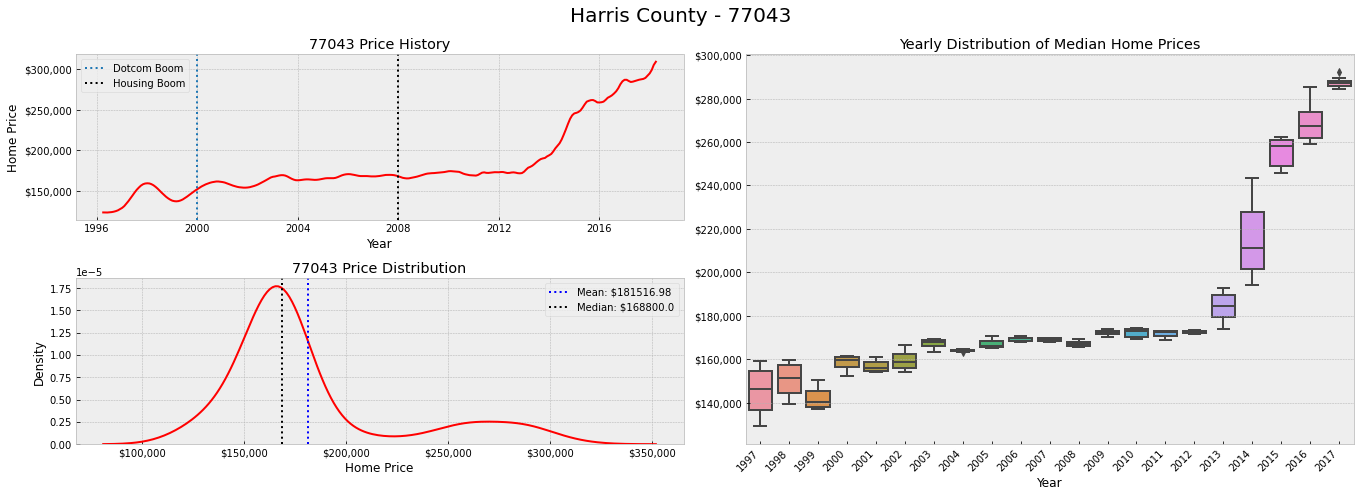

In [117]:
zip_eda(df_77043, 77043, 'Harris')

- Prices were relatively stable after 2008, stayed stagnant, and then moved up in 2013
    - Median house price was not affected by 2008 crash
- Data is slightly right skewed
- Based on the shape there are more homes that are more expensive than the average than less which reflects the recent upward trend the zip code has been experiencing
    - Prices have steadily risen since 2013
- Minimal spread between years unitl 2013 and then spread began to decrease in 2015

<AxesSubplot:xlabel='time'>

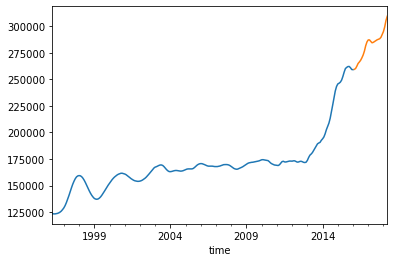

In [118]:
train_77043, test_77043 = create_train_test_split(df_77043, 0.90)
train_77043.plot()
test_77043.plot()

Baseline split point of 0.90

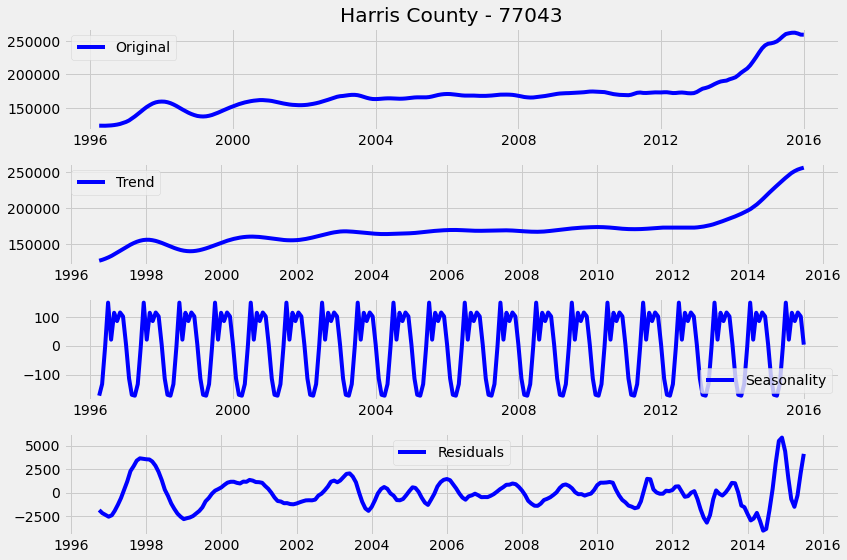

In [119]:
seasonal_decomposition(train_77043, 'Harris', 77043)

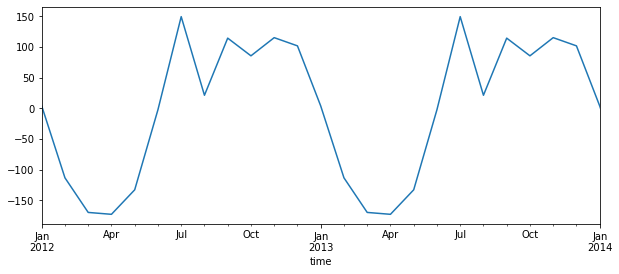

In [120]:
decomposition = seasonal_decompose(train_77043,model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2012-01-01', '2014-01-01'));

- Data is stangant until 2013 when an upward trend begins
- Data is annually seasonal with peaks in months (July-Oct) and dips in spring (Jan-April)
- Seasonality appears constant
- Residuals have the most variance between 2014 and 2016
- Looks like data needs 1 degree of differencing on seasonality

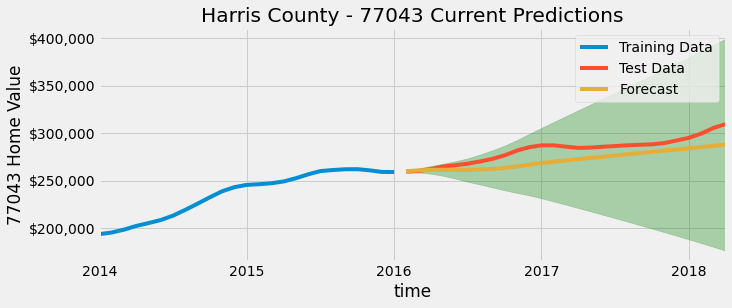

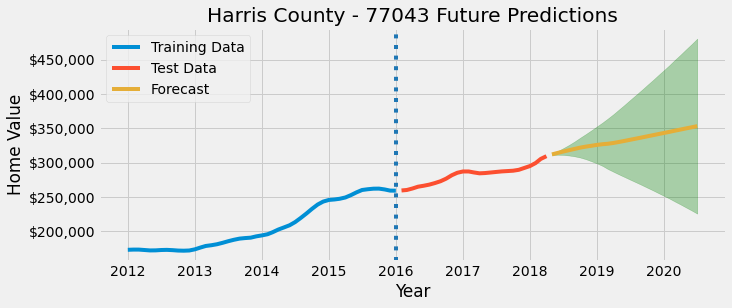

In [121]:
fig_77043, future_77043, forecast_df_77043, roi_77043 = model_predictions(train_77043, test_77043, df_77043, 77043, 'Harris')

In [250]:
roi_77043

{'Lower CI': [-0.2743308781323286, 72566.91218676713, -27433.087813232865],
 'Upper CI': [0.5360134350550573, 153601.34350550573, 53601.343505505734],
 'Forecast': [0.13213589068135906, 113213.5890681359, 13213.589068135901]}

- Current predictions
    - Model captures general trend very well in terms of confidence interval 
    - Makes sense that predictions are relatively flat given there is not much trend to be captured
- Future predictions
    - Titls slightly upward
    - Has an extremely large confidence interval
- An investment of \$100,000 today (05/01/2018) by 11/01/2019 would yield (ROI):
    - Conservative estimate: -27.4\% (-\$27,433)
    - Mean estimate: 13.2% (-\$13,213)
    - Upper estimate: 53.6\% (+\$53,601)

## Harris County Conclusion

In [124]:
corr_check(df_77092, df_77021, df_77043, 77092, 77021, 77043)

77092     77021     77043
77092  1.000000  0.863189  0.968172
77021  0.863189  1.000000  0.759268
77043  0.968172  0.759268  1.000000

- 77092 moves more closely with 77043, faily large margin
- 77021 moves more closely with 77092
- 77043 moves more closely with 77092
- This can be useful for picking up on trends using other nearby zip codes. Especially useful because there are large differences in correlation

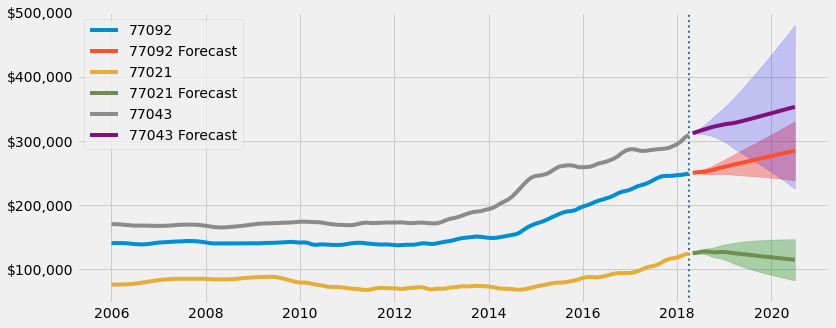

In [122]:
county_forecast_comparison(df_77092, 77092, forecast_df_77092, df_77021, 77021, forecast_df_77021,  df_77043, 77043, forecast_df_77043)

- 77043 has the highest ending point but also has a very large confidence interval
- 77092 moves steadily upward and has an upwards slope but a much tigher range
    - Curves upward at the end slightly
- 77021 trends lower in many years and trends down towards the end in a tight confidence interval

In [123]:
harris_perc_comparison = county_forecast_perc_comparison(roi_77092, 77092, roi_77021, 77021, roi_77043, 77043)
harris_perc_comparison

Lower CI       Upper CI       Forecast
77092 Perc Change     -0.043216       0.316966       0.137368
Val                95678.400224  131696.593080  113736.790633
$ Diff             -4321.599776   31696.593080   13736.790633
77021 Perc Change     -0.332264       0.167105      -0.080975
Val                66773.622523  116710.466084   91902.537096
$ Diff            -33226.377477   16710.466084   -8097.462904
77043 Perc Change     -0.274331       0.536013       0.132136
Val                72566.912187  153601.343506  113213.589068
$ Diff            -27433.087813   53601.343506   13213.589068

- Based on the downside risk, upside return, and mean predicted value, 77092 seems like the superior zip code
- It has the second highest upside, the highest predicted mean
- 77021 has a lower predicted mean forecast and a tight spread meaning minimal potential upside
- 77043 has too large a standard deviation, more risk than 77092 with a lower predicted return
- **In Harris county, 77092 has the best prospects for near term growth**

## El Paso County Modeling
- Located in El Paso metro
- Population: 681,000

### 79902: EDA and SARIMAX
- Mission Hills South, El Paso
- 3.5 miles from Downtown

In [125]:
# Create 79902 dataframe

df_79902=create_zip_data(El_Paso_dict_full, 79902)

(<Figure size 1368x504 with 3 Axes>,
                value
 count     265.000000
 mean   136922.641509
 std     28948.753320
 min    100500.000000
 25%    105200.000000
 50%    146700.000000
 75%    161500.000000
 max    192400.000000)

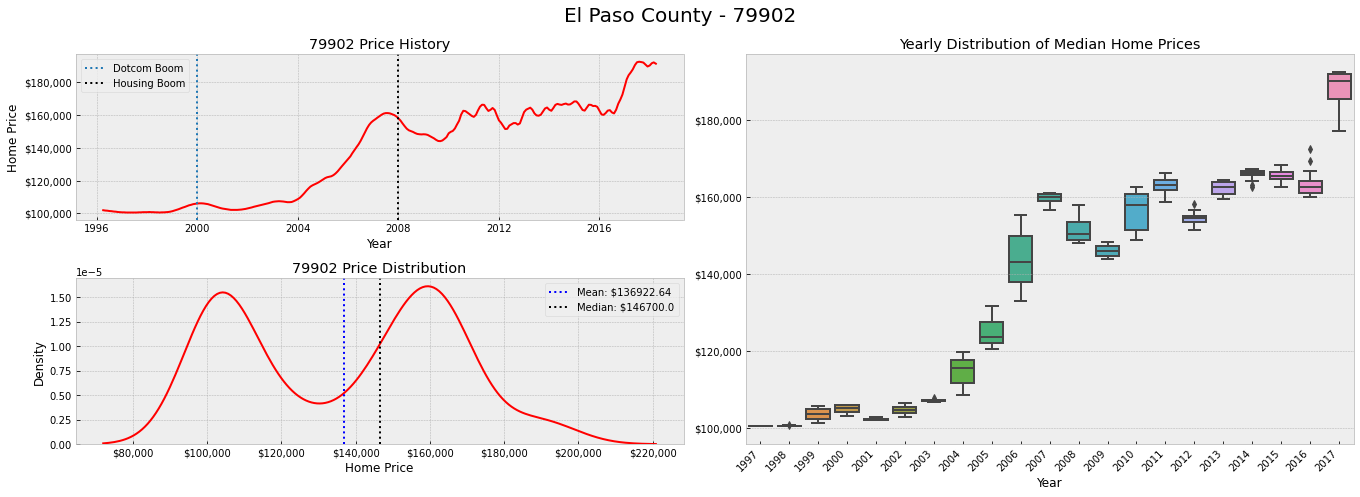

In [126]:
zip_eda(df_79902, 79902, 'El Paso')

- Upward trend unitl 2008 and then a hard crash unitl recovery in 2010, trending upwards post 2016 but has slowed down
    - Median house price recovered in 2012, signficant dip between those years
- Data is bimodal
- Based on the shape, prices were strong at one point in time, retreated lower, and were continuously higher at another point
    - High prices in 2008 and a strong post crisis recovery in prices
- High spread in 2006, 2010, and 2017
    - Scatter distributions across years

<AxesSubplot:xlabel='time'>

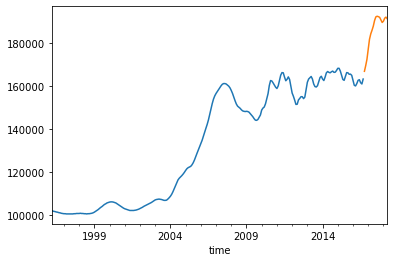

In [127]:
train_79902, test_79902 = create_train_test_split(df_79902, 0.93)
train_79902.plot()
test_79902.plot()

- Split data at 0.93
- Attempted to split at 0.90 but was not achieving accurate predictions

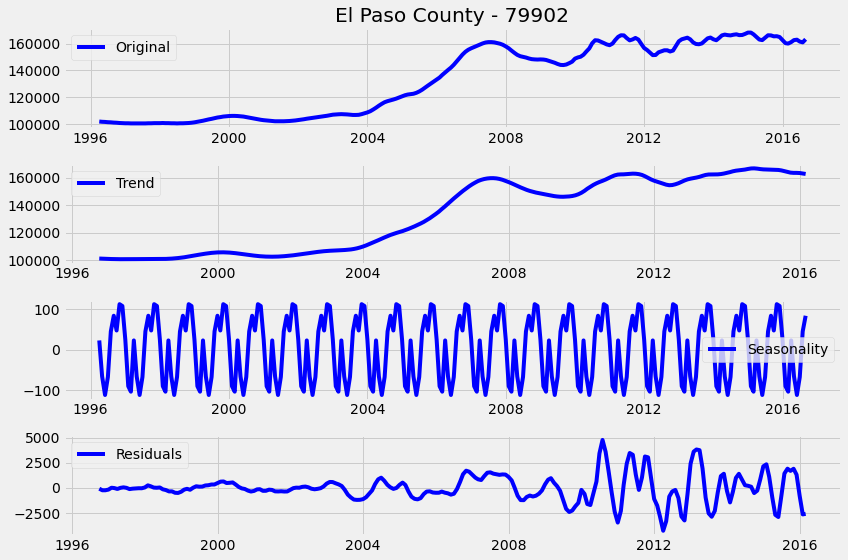

In [128]:
seasonal_decomposition(train_79902, 'El Paso', 79902)

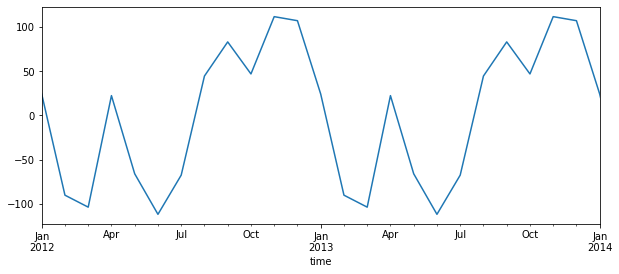

In [129]:
decomposition = seasonal_decompose(train_79902,model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2012-01-01', '2014-01-01'));

- Prices peak in 2007 and begin recovery in 2010
- Data is annually seasonal with peaks in months (July-Nov) and dips in spring (Feb-June)
- Seasonality appears constant
- Residuals have the most variance between 2010 and 2016
- Looks like data needs 1 degree of differencing on seasonality

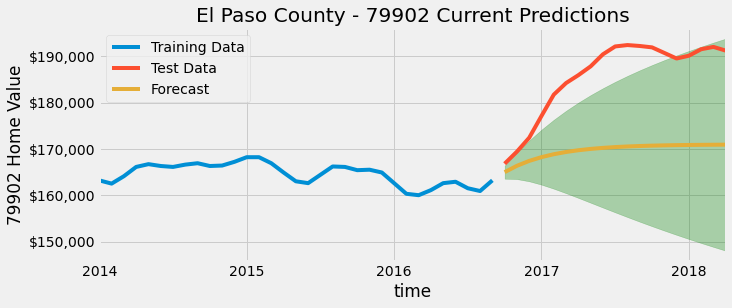

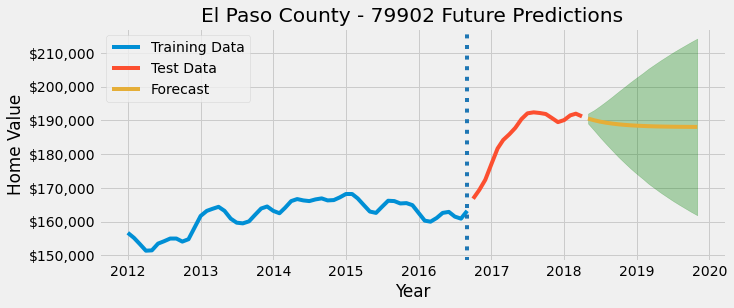

In [130]:
fig_79902, future_79902, forecast_df_79902, roi_79902 = model_predictions(train_79902, test_79902, df_79902, 79902, 'El Paso')

In [252]:
roi_79902

{'Lower CI': [-0.14380023881060847, 85619.97611893916, -14380.023881060843],
 'Upper CI': [0.11568589846377143, 111568.58984637714, 11568.589846377145],
 'Forecast': [-0.013059566605697518, 98694.04333943025, -1305.9566605697473]}

- Current predictions
    - Model undershoots predictions 
    - Slopes upward and then becomes stagnant
- Future predictions
    - Titls slightly downward
    - Has a large confidence interval
- An investment of \$100,000 today (05/01/2018) by 11/01/2019 would yield (ROI):
    - Conservative estimate: -14.4\% (-\$14,380)
    - Mean estimate: -1.3% (-\$1,305)
    - Upper estimate: 11.6\% (+\$11,568)

### 79927: EDA and SARIMAX
- Aldama States El Paso
- 18 miles from Downtown

In [131]:
# Create 79927 dataframe

df_79927=create_zip_data(El_Paso_dict_full, 79927)

(<Figure size 1368x504 with 3 Axes>,
               value
 count    265.000000
 mean   76313.584906
 std    12031.412656
 min    56900.000000
 25%    62900.000000
 50%    81700.000000
 75%    86200.000000
 max    97500.000000)

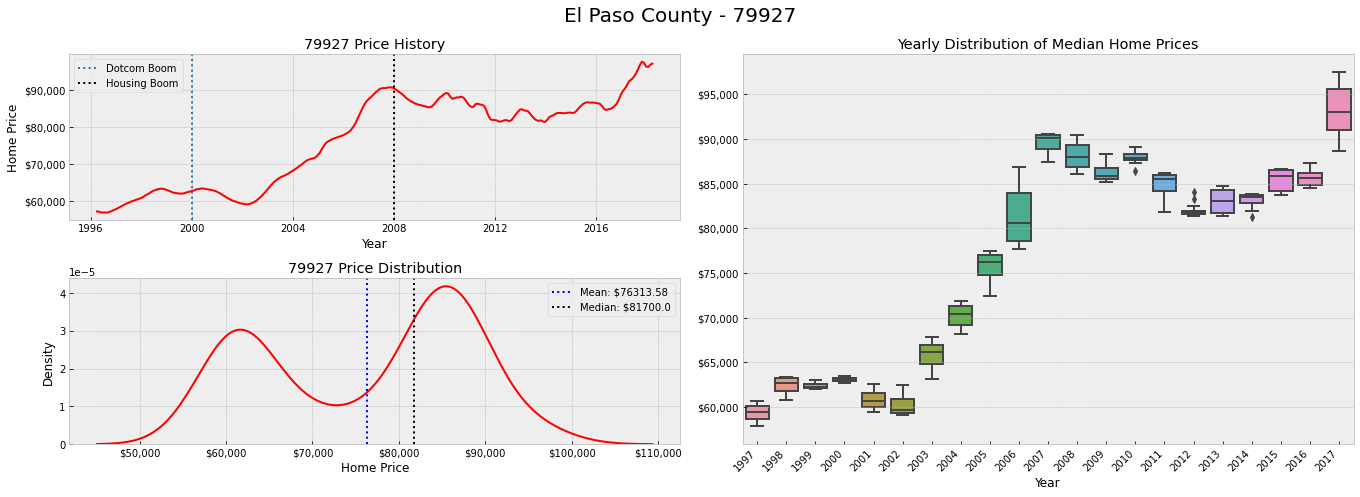

In [132]:
zip_eda(df_79927, 79927, 'El Paso')

- Upward trend unitl 2008 and then a hard crash unitl recovery in 2010, and then there was a downward trend until 2016
    - Median house price recovered in 2010, signficant dip between those years, and then further dip
- Data is bimodal
- Based on the shape, prices were strong at one point in time, retreated lower, and were continuously higher at another point
    - High prices in 2008 and a strong post crisis recovery in prices in 2016
- High spread in 2006 and 2017
    - Scattered distributions across years

<AxesSubplot:xlabel='time'>

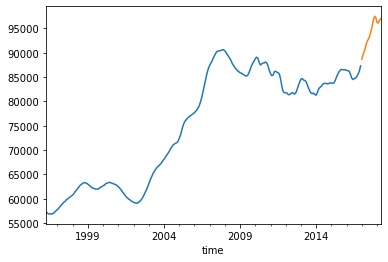

In [133]:
train_79927, test_79927 = create_train_test_split(df_79927, 0.94)
train_79927.plot()
test_79927.plot()

- Baseline score of 0.90
- Had to adjust to 0.94

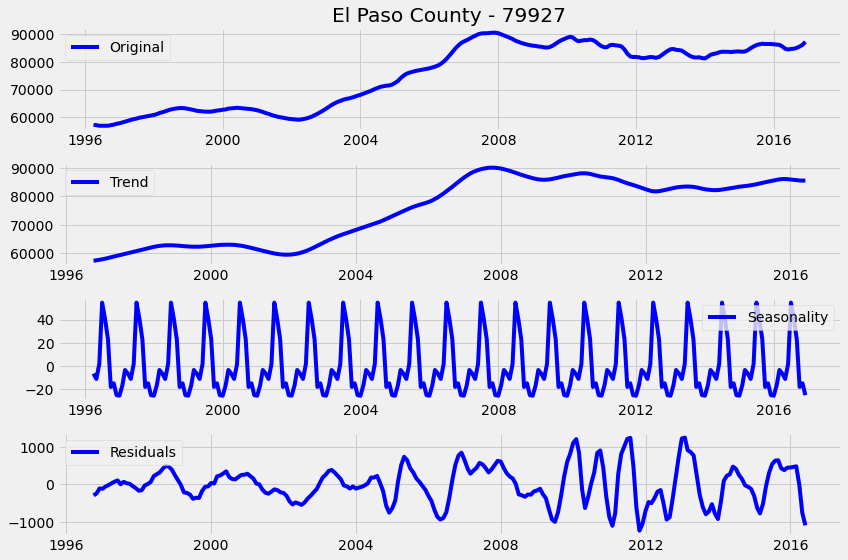

In [134]:
seasonal_decomposition(train_79927, 'El Paso', 79927)

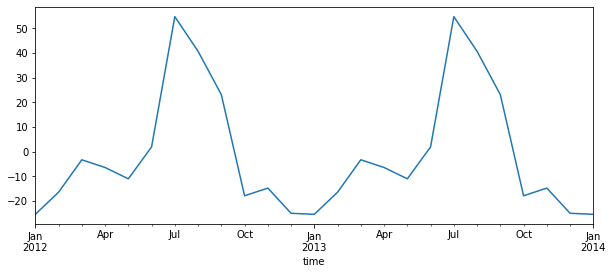

In [135]:
decomposition = seasonal_decompose(train_79927,model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2012-01-01', '2014-01-01'));

- There is an upward trend from 2002 to 2009 and then it dips and begins to recover in 2015
- Data is annually seasonal with peaks in months (May-July) and dips in spring (Oct-March)
- Seasonality appears constant
- Residuals have the most variance between 2012 and 2016
- Looks like data needs 1 degree of differencing on seasonality

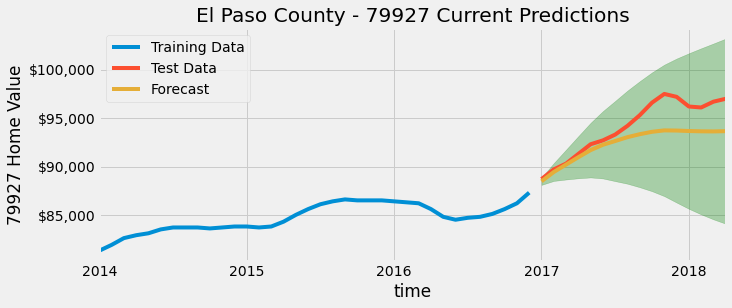

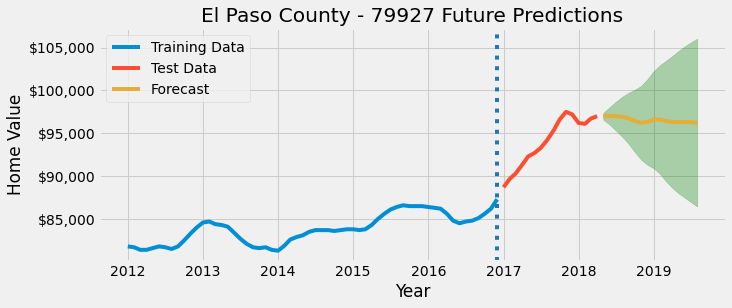

In [136]:
fig_79927, future_79927, forecast_df_79927, roi_79927 = model_predictions(train_79927, test_79927, df_79927, 79927, 'El Paso')

In [255]:
roi_79903

{'Lower CI': [-0.11384695147451204, 88615.3048525488, -11384.695147451203],
 'Upper CI': [0.14274538755690414, 114274.5387556904, 14274.538755690402],
 'Forecast': [0.01499434571049657, 101499.43457104966, 1499.4345710496564]}

- Current predictions
    - Model undershoots predictions 
    - Slopes upward and then becomes stagnant
- Future predictions
    - Titls slightly downward
    - Has a large confidence interval
- An investment of \$100,000 today (05/01/2018) by 11/01/2019 would yield (ROI):
    - Conservative estimate: -11.4\% (-\$11,384)
    - Mean estimate: -1.4% (-\$1,499)
    - Upper estimate: 14.3\% (+\$14,274)

### 79903: EDA and SARIMAX
- Timberwolf El Paso
- 4.7 miles from downtown

In [137]:
# Create 79903 dataframe

df_79903=create_zip_data(El_Paso_dict_full, 79903)

(<Figure size 1368x504 with 3 Axes>,
               value
 count    265.000000
 mean   74794.716981
 std    11213.721405
 min    58500.000000
 25%    62400.000000
 50%    79200.000000
 75%    83900.000000
 max    95600.000000)

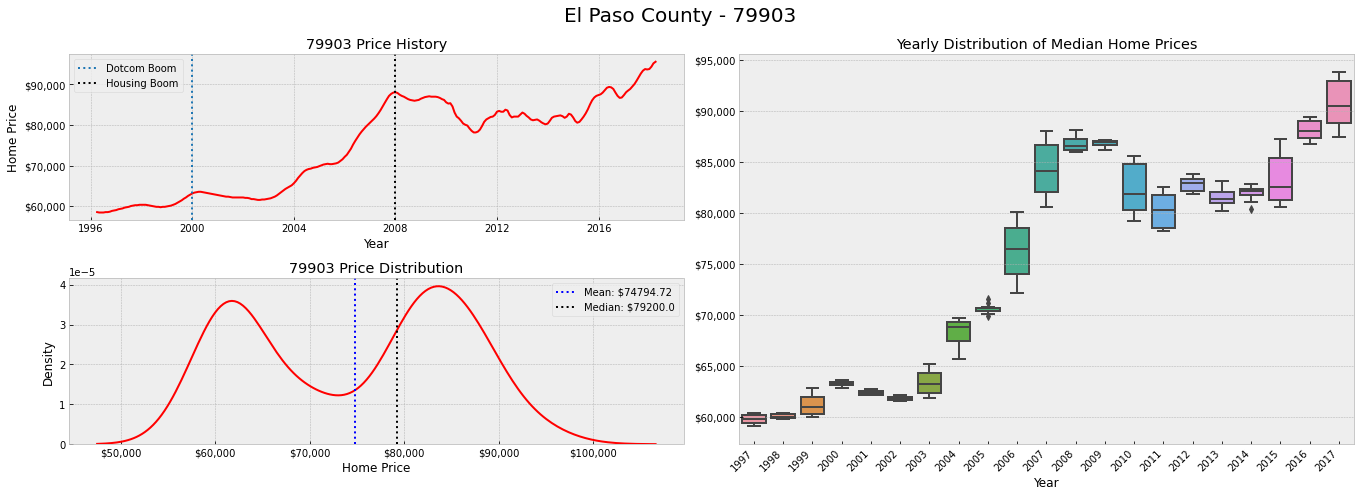

In [138]:
zip_eda(df_79903, 79903, 'El Paso')

- Upward trend unitl 2008 and then a hard crash unitl recovery in 2016, and then there was a downward trend until 2016
    - Median house price recovered in 2010, signficant dip between those years
- Data is bimodal
- Based on the shape, prices were strong at one point in time, retreated lower, and were continuously higher at another point
    - High prices in 2008 and a strong post crisis recovery in prices in 2016
- High spread in 2006 and 2017
    - Scattered distributions across years
    - Lower distributions in 2011 through 2014

<AxesSubplot:xlabel='time'>

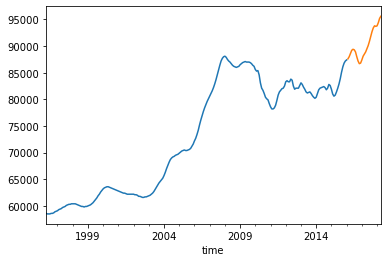

In [139]:
train_79903, test_79903 = create_train_test_split(df_79903, 0.90)
train_79903.plot()
test_79903.plot()

- Baseline split at 0.90

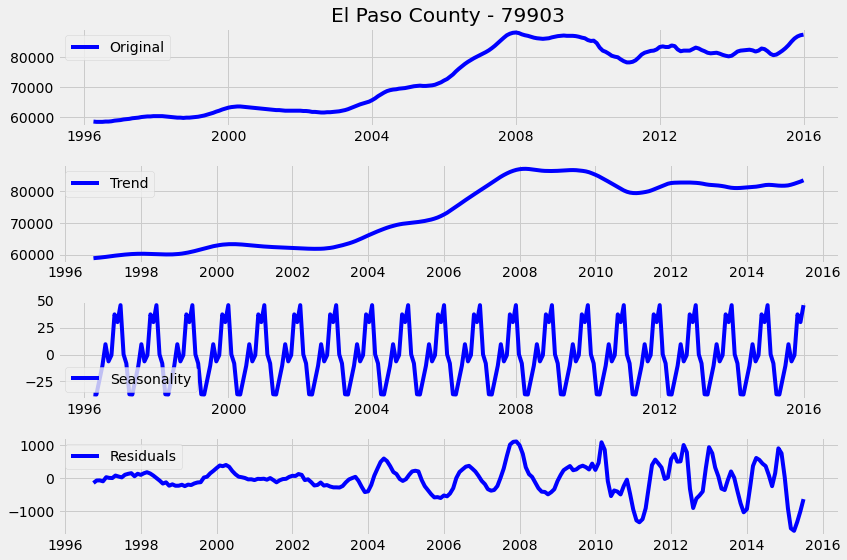

In [140]:
seasonal_decomposition(train_79903, 'El Paso', 79903)

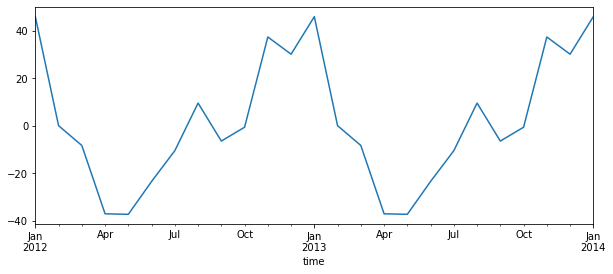

In [141]:
decomposition = seasonal_decompose(train_79903,model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2012-01-01', '2014-01-01'));

- There is an upward trend from 2002 to 2009 and then it dips and begins to recover in 2015
- Data is annually seasonal with peaks in months (May-July) and dips in spring (Oct-March)
- Seasonality appears constant
- Residuals have the most variance between 2012 and 2016
- Looks like data needs 1 degree of differencing on seasonality

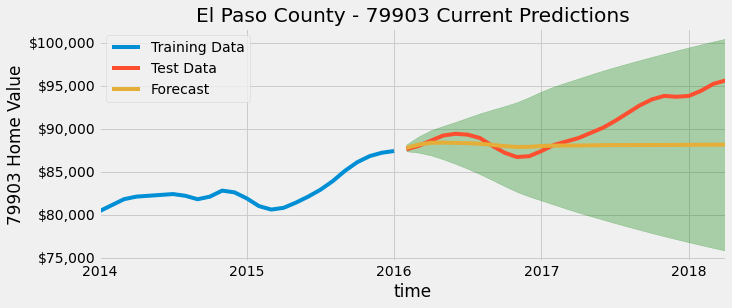

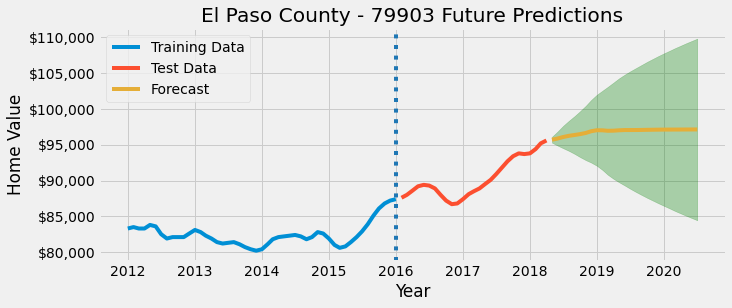

In [142]:
fig_79903, future_79903, forecast_df_79903, roi_79903 = model_predictions(train_79903, test_79903, df_79903, 79903, 'El Paso')

## El Paso Conclusion

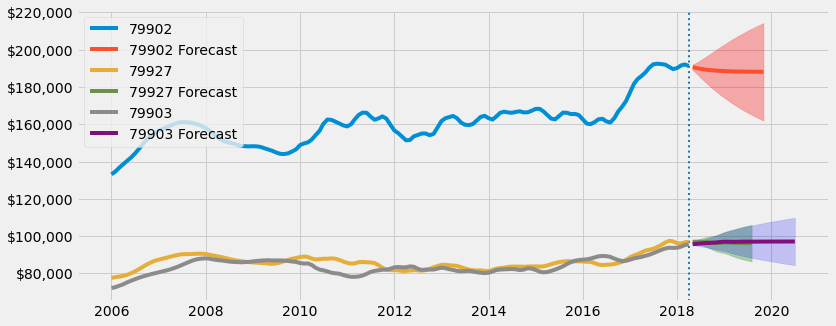

In [143]:
county_forecast_comparison(df_79902, 79902, forecast_df_79902, df_79927, 79927, forecast_df_79927,  df_79903, 79903, forecast_df_79903)

In [144]:
harris_perc_comparison = county_forecast_perc_comparison(roi_79902, 79902, roi_79927, 79927, roi_79903, 79903)
harris_perc_comparison

Lower CI       Upper CI       Forecast
79902 Perc Change     -0.143800       0.115686      -0.013060
Val                85619.976119  111568.589846   98694.043339
$ Diff            -14380.023881   11568.589846   -1305.956661
79927 Perc Change     -0.104945       0.088757      -0.007689
Val                89505.474652  108875.662528   99231.063308
$ Diff            -10494.525348    8875.662528    -768.936692
79903 Perc Change     -0.113847       0.142745       0.014994
Val                88615.304853  114274.538756  101499.434571
$ Diff            -11384.695147   14274.538756    1499.434571

In [145]:
corr_check(df_79902, df_79927, df_79903, 79902, 79927, 79903)

79902     79927     79903
79902  1.000000  0.957589  0.954831
79927  0.957589  1.000000  0.975394
79903  0.954831  0.975394  1.000000

## Collin County Modeling

### 75069: EDA and SARIMAX

In [146]:
# Create 75069 dataframe

df_75069 = create_zip_data(Collin_dict_full, 75069)

(<Figure size 1368x504 with 3 Axes>,
                value
 count     265.000000
 mean   165432.830189
 std     32335.945168
 min    129000.000000
 25%    144700.000000
 50%    160900.000000
 75%    167200.000000
 max    281400.000000)

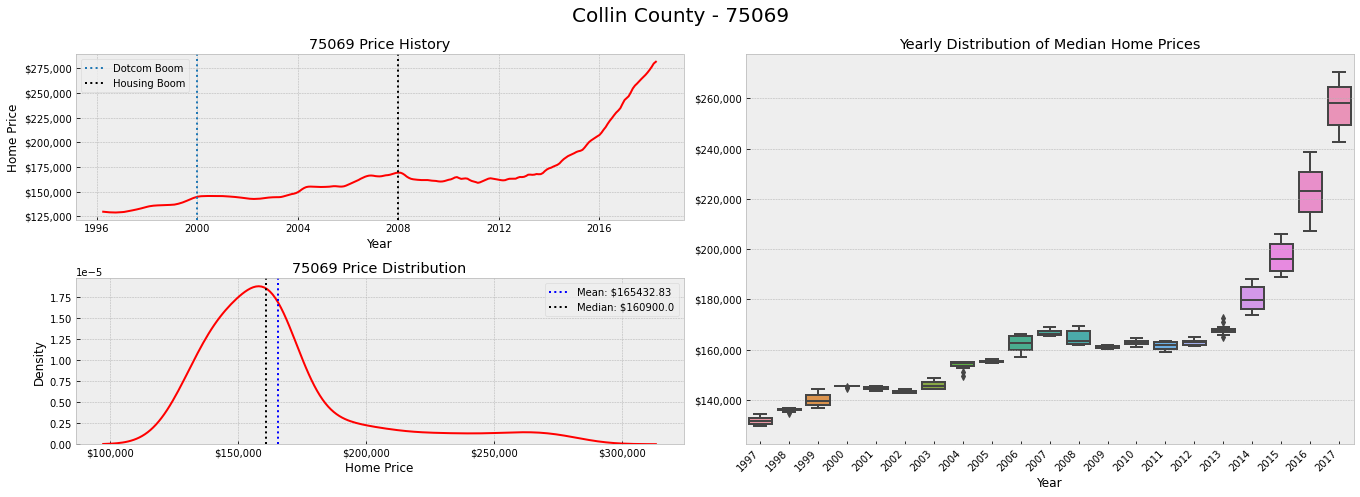

In [147]:
zip_eda(df_75069, 75069, 'Collin')

<AxesSubplot:xlabel='time'>

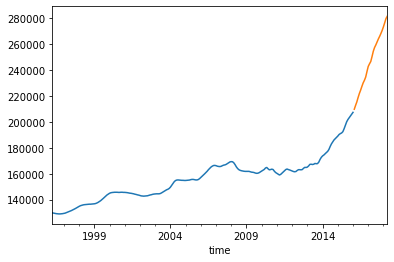

In [148]:
train_75069, test_75069 = create_train_test_split(df_75069, 0.90)
train_75069.plot()
test_75069.plot()

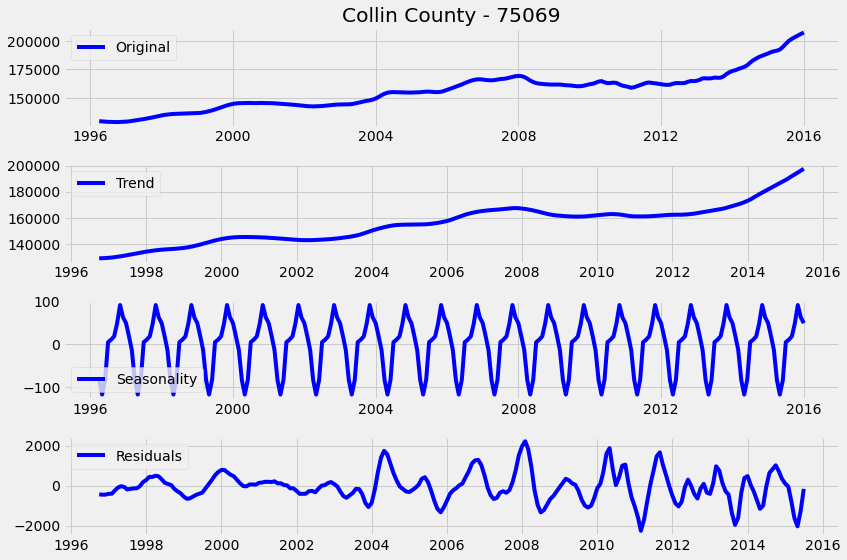

In [149]:
seasonal_decomposition(train_75069, 'Collin', 75069)

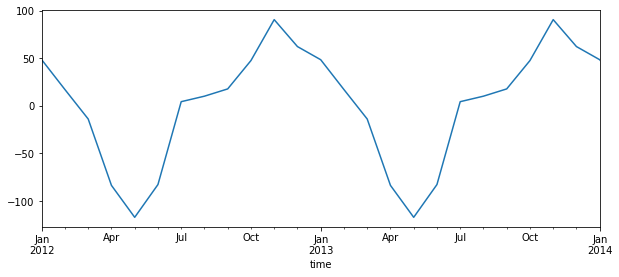

In [150]:
decomposition = seasonal_decompose(train_75069,model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2012-01-01', '2014-01-01'));

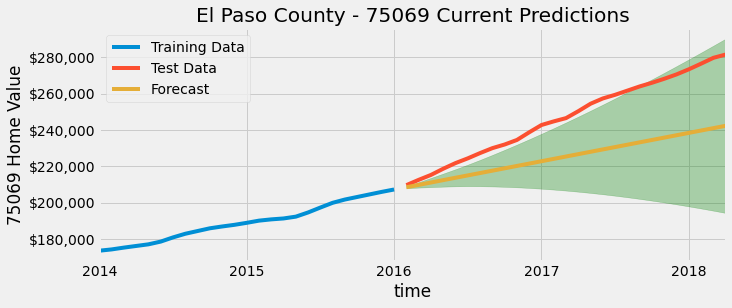

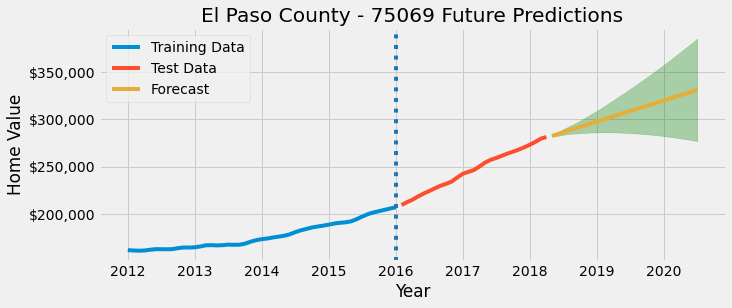

In [151]:
fig_75069, future_75069, forecast_df_75069, roi_75069 = model_predictions(train_75069, test_75069, df_75069, 75069, 'El Paso')

### 75075: EDA and SARIMAX

In [152]:
# Create 75075 dataframe

df_75075 = create_zip_data(Collin_dict_full, 75075)

(<Figure size 1368x504 with 3 Axes>,
                value
 count     265.000000
 mean   185273.584906
 std     35514.162513
 min    150400.000000
 25%    160600.000000
 50%    179200.000000
 75%    186100.000000
 max    306400.000000)

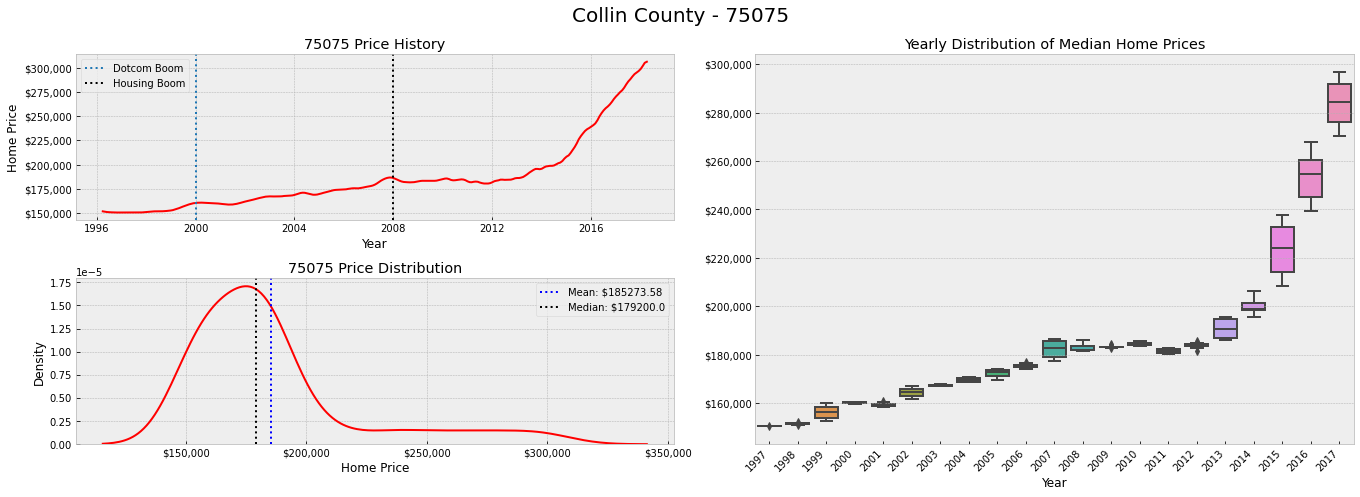

In [153]:
zip_eda(df_75075, 75075, 'Collin')

<AxesSubplot:xlabel='time'>

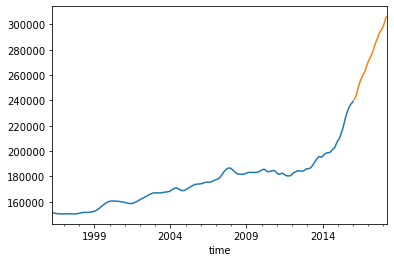

In [154]:
train_75075, test_75075 = create_train_test_split(df_75075, 0.90)
train_75075.plot()
test_75075.plot()

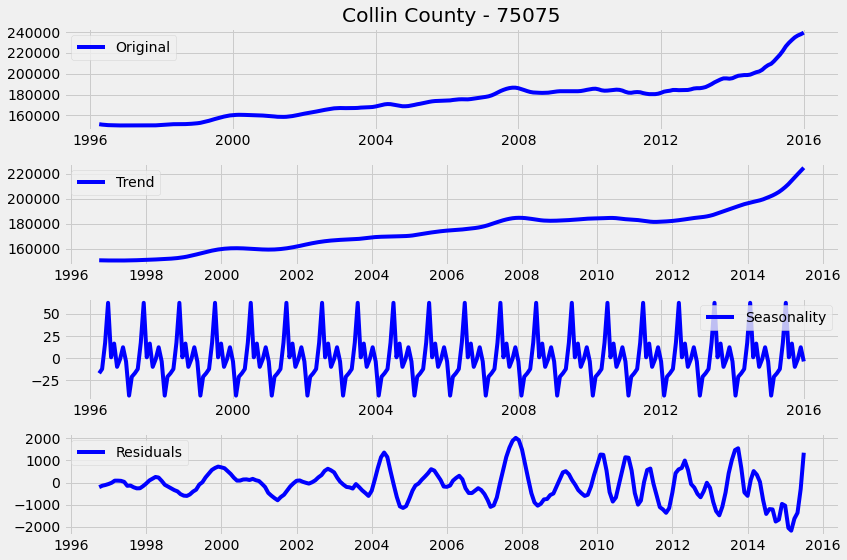

In [155]:
seasonal_decomposition(train_75075, 'Collin', 75075)

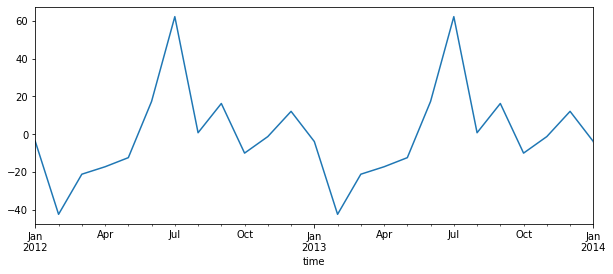

In [156]:
decomposition = seasonal_decompose(train_75075,model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2012-01-01', '2014-01-01'));

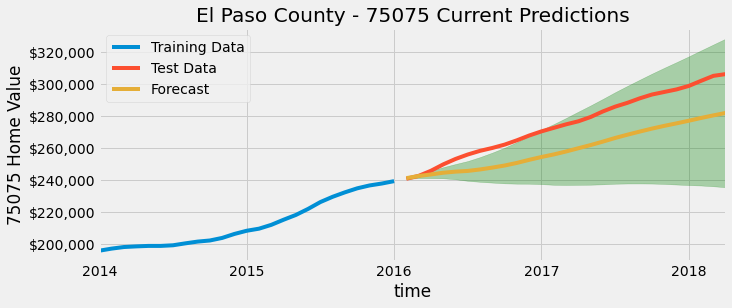

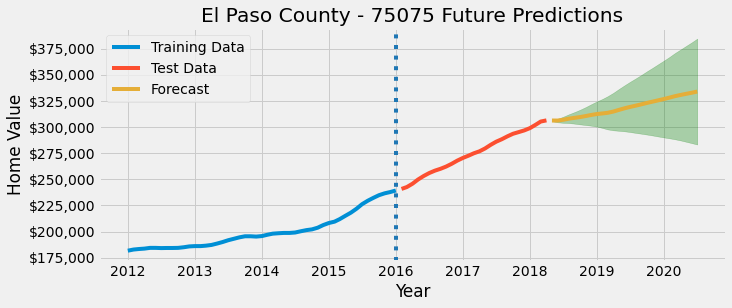

In [157]:
fig_75075, future_75075, forecast_df_75075, roi_75075 = model_predictions(train_75075, test_75075, df_75075, 75075, 'El Paso')

### 75023: EDA and SARIMAX

In [158]:
# Create 75075 dataframe

df_75023 = create_zip_data(Collin_dict_full, 75023)

(<Figure size 1368x504 with 3 Axes>,
                value
 count     265.000000
 mean   174131.698113
 std     31058.579411
 min    144400.000000
 25%    153400.000000
 50%    166700.000000
 75%    175700.000000
 max    280500.000000)

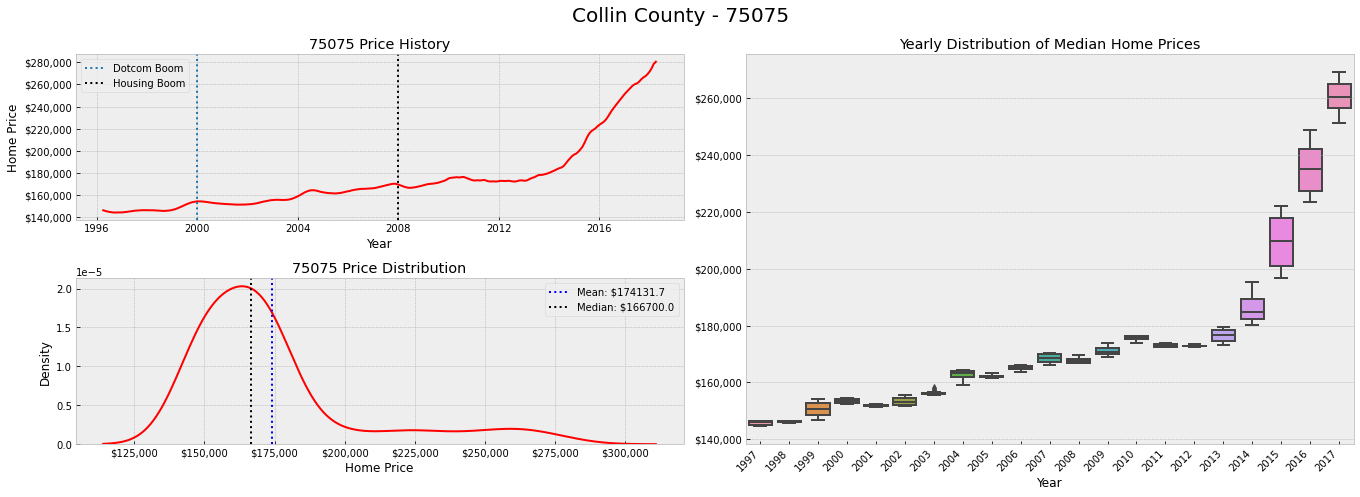

In [159]:
zip_eda(df_75023, 75075, 'Collin')

<AxesSubplot:xlabel='time'>

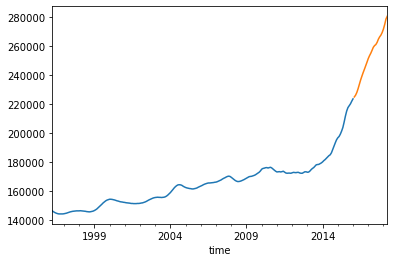

In [160]:
train_75023, test_75023 = create_train_test_split(df_75023, 0.90)
train_75023.plot()
test_75023.plot()

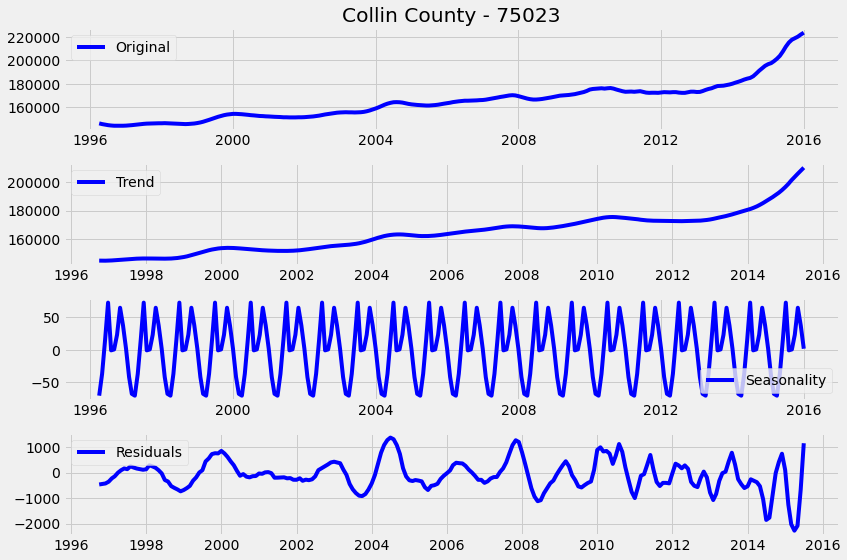

In [161]:
seasonal_decomposition(train_75023, 'Collin', 75023)

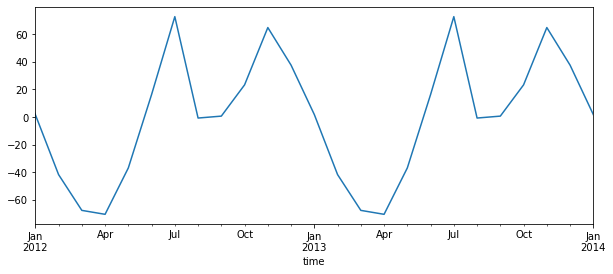

In [162]:
decomposition = seasonal_decompose(train_75023,model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2012-01-01', '2014-01-01'));

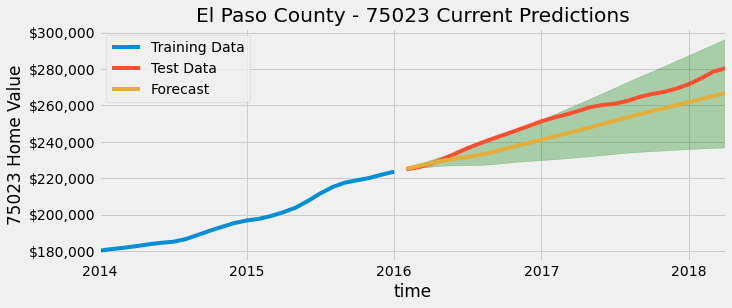

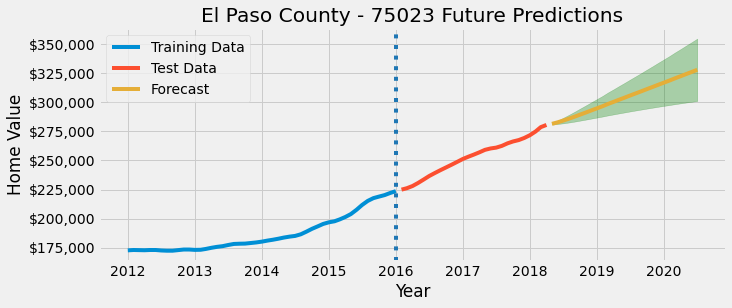

In [163]:
fig_75023, future_75023, forecast_df_75023, roi_75023 = model_predictions(train_75023, test_75023, df_75023, 75023, 'El Paso')

## Collin County Conclusion

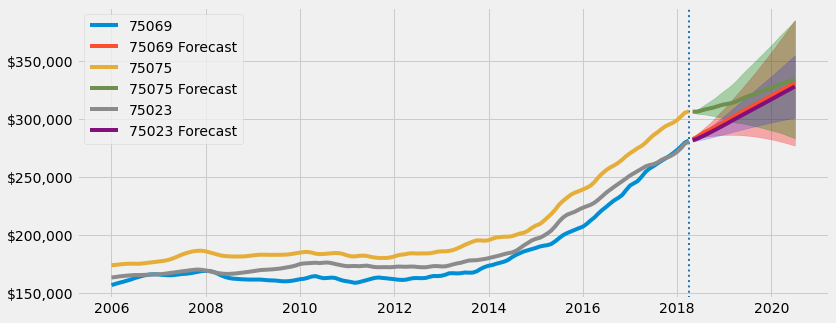

In [164]:
county_forecast_comparison(df_75069, 75069, forecast_df_75069, df_75075, 75075, forecast_df_75075,  df_75023, 75023, forecast_df_75023)

In [165]:
collin_perc_comparison = county_forecast_perc_comparison(roi_75069, 75069, roi_75075, 75075, roi_75023, 75023)
collin_perc_comparison

Lower CI       Upper CI       Forecast
75069 Perc Change      -0.017314       0.359631       0.171604
Val                 98268.636270  135963.065897  117160.388415
$ Diff              -1731.363730   35963.065897   17160.388415
75075 Perc Change      -0.072956       0.253367       0.090536
Val                 92704.417713  125336.660740  109053.616623
$ Diff              -7295.582287   25336.660740    9053.616623
75023 Perc Change       0.071910       0.257797       0.165036
Val                107191.036323  125779.654102  116503.641253
$ Diff               7191.036323   25779.654102   16503.641253

In [166]:
corr_check(df_75069, df_75075, df_75023, 75069, 75075, 75023)

75069     75075     75023
75069  1.000000  0.994549  0.992293
75075  0.994549  1.000000  0.997449
75023  0.992293  0.997449  1.000000

## Denton County

### 75057: EDA and SARIMAX

In [167]:
# Create 75057 dataframe

df_75057 = create_zip_data(Denton_dict_full, 75057)

(<Figure size 1368x504 with 3 Axes>,
                value
 count     265.000000
 mean   116648.679245
 std     21164.212042
 min     84000.000000
 25%    105900.000000
 50%    114400.000000
 75%    122400.000000
 max    197800.000000)

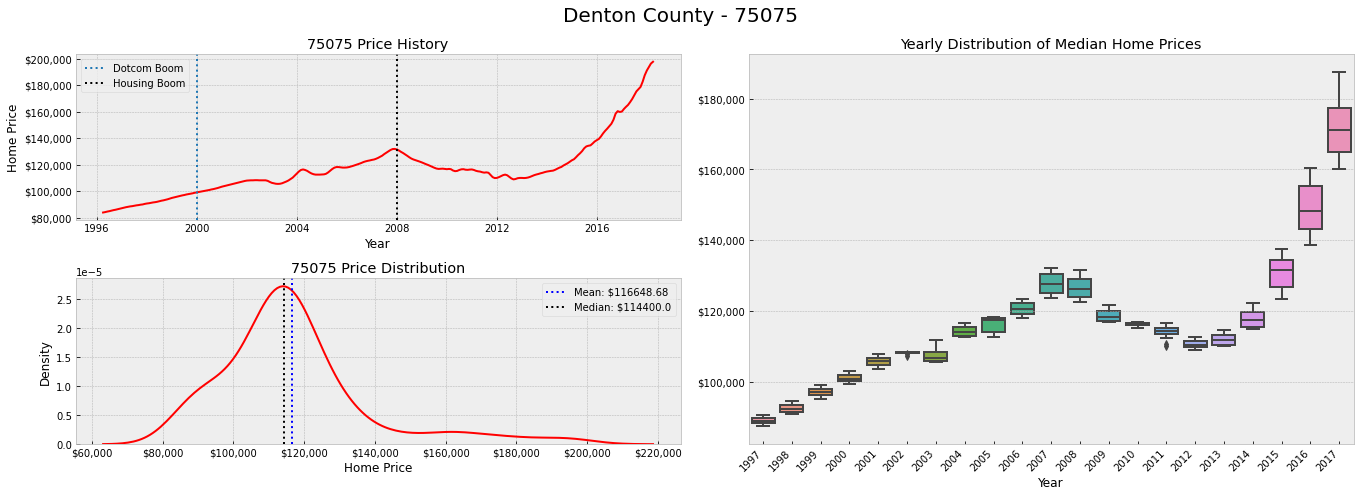

In [168]:
zip_eda(df_75057, 75075, 'Denton')

<AxesSubplot:xlabel='time'>

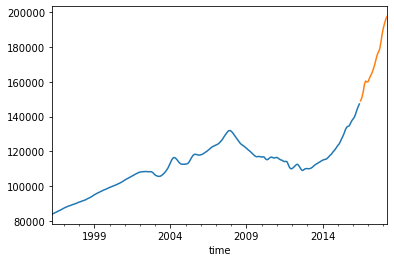

In [169]:
train_75057, test_75057 = create_train_test_split(df_75057, 0.92)
train_75057.plot()
test_75057.plot()

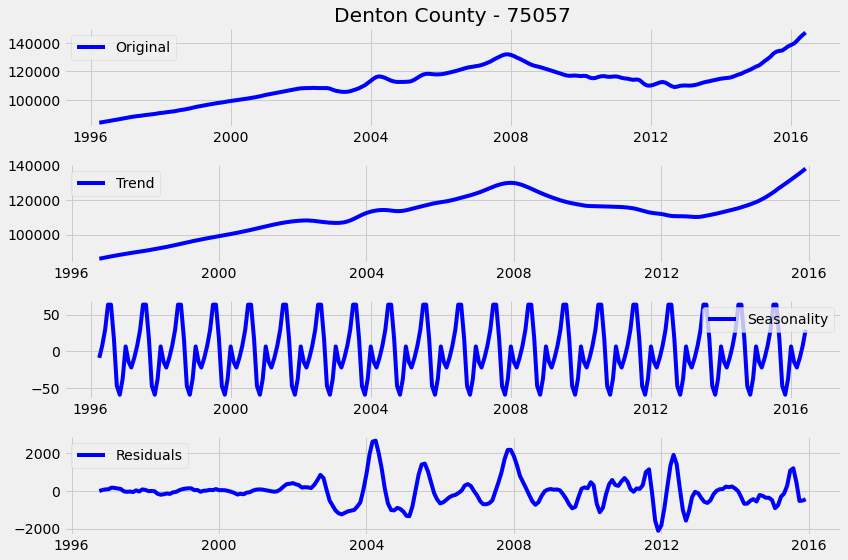

In [170]:
seasonal_decomposition(train_75057, 'Denton', 75057)

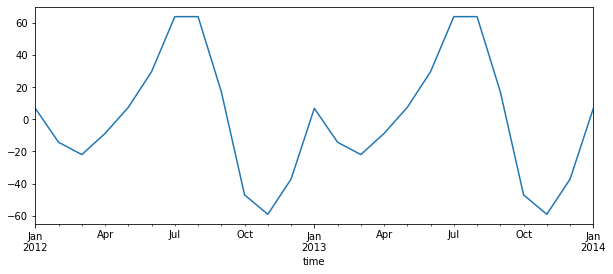

In [171]:
decomposition = seasonal_decompose(train_75057,model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2012-01-01', '2014-01-01'));

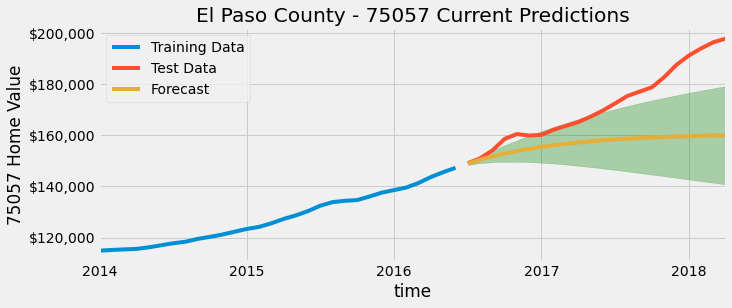

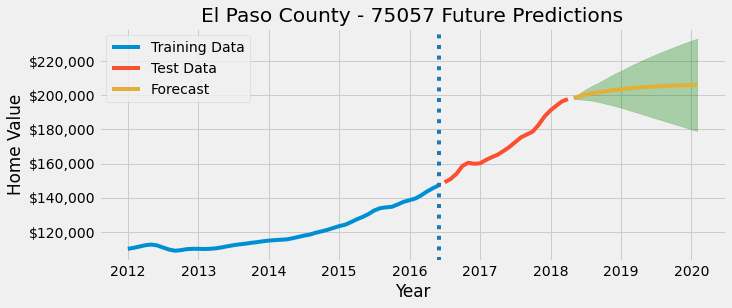

In [172]:
fig_75057, future_75057, forecast_df_75057, roi_75057 = model_predictions(train_75057, test_75057, df_75057, 75057, 'El Paso')

### 75006: EDA and SARIMAX

In [173]:
# Create 75006 dataframe

df_75006 = create_zip_data(Denton_dict_full, 75006)

(<Figure size 1368x504 with 3 Axes>,
                value
 count     265.000000
 mean   140426.415094
 std     26290.420186
 min    104500.000000
 25%    126900.000000
 50%    136900.000000
 75%    146600.000000
 max    232200.000000)

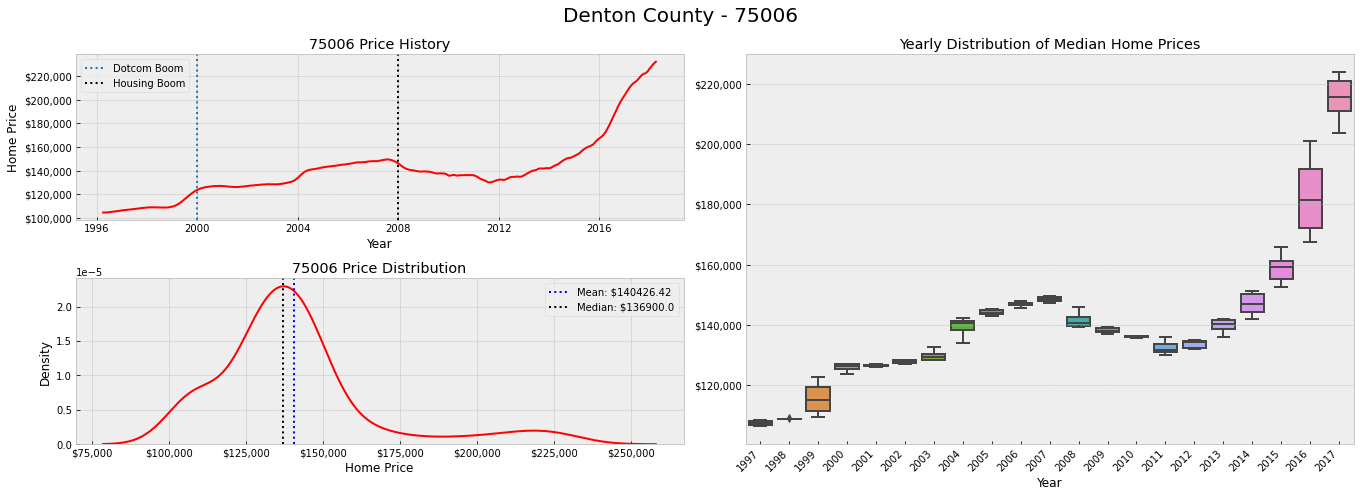

In [174]:
zip_eda(df_75006, 75006, 'Denton')

<AxesSubplot:xlabel='time'>

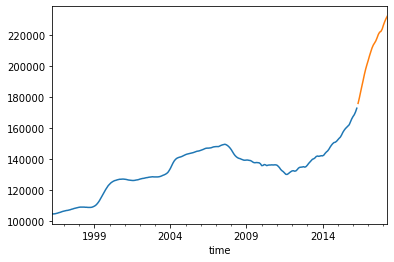

In [175]:
train_75006, test_75006 = create_train_test_split(df_75006, 0.91)
train_75006.plot()
test_75006.plot()

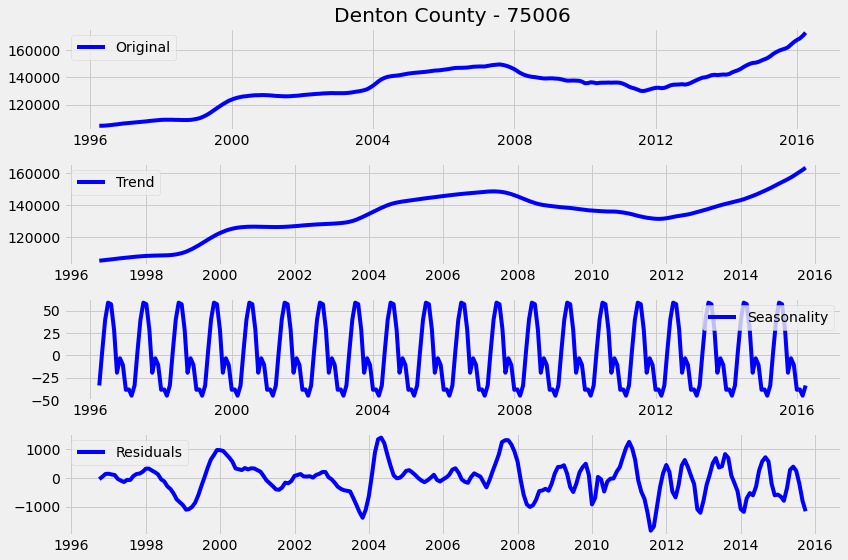

In [176]:
seasonal_decomposition(train_75006, 'Denton', 75006)

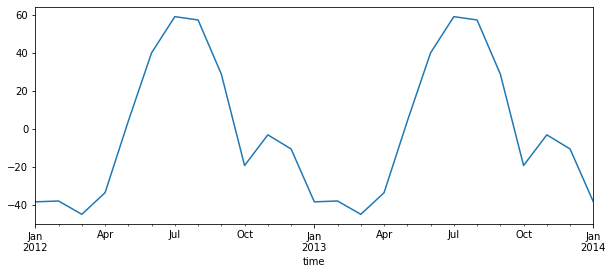

In [177]:
decomposition = seasonal_decompose(train_75006, model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2012-01-01', '2014-01-01'));

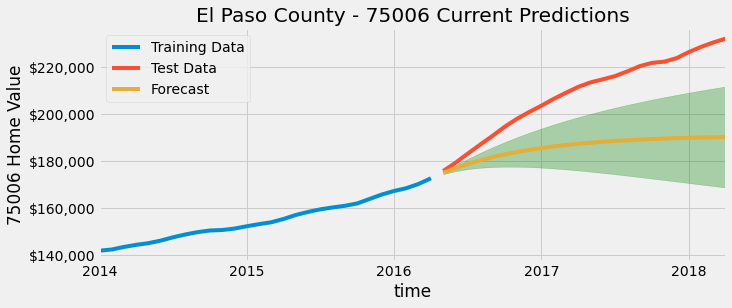

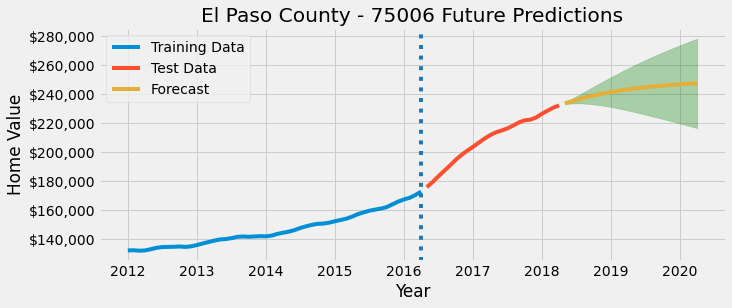

In [178]:
fig_75006, future_75006, forecast_df_75006, roi_75006 = model_predictions(train_75006, test_75006, df_75006, 75006, 'El Paso')

### 76201: EDA and SARIMAX

In [179]:
# Create 76201 dataframe

df_76201 = create_zip_data(Denton_dict_full, 76201)

(<Figure size 1368x504 with 3 Axes>,
                value
 count     265.000000
 mean   105165.283019
 std     20572.239736
 min     77100.000000
 25%     91500.000000
 50%    102700.000000
 75%    109400.000000
 max    174800.000000)

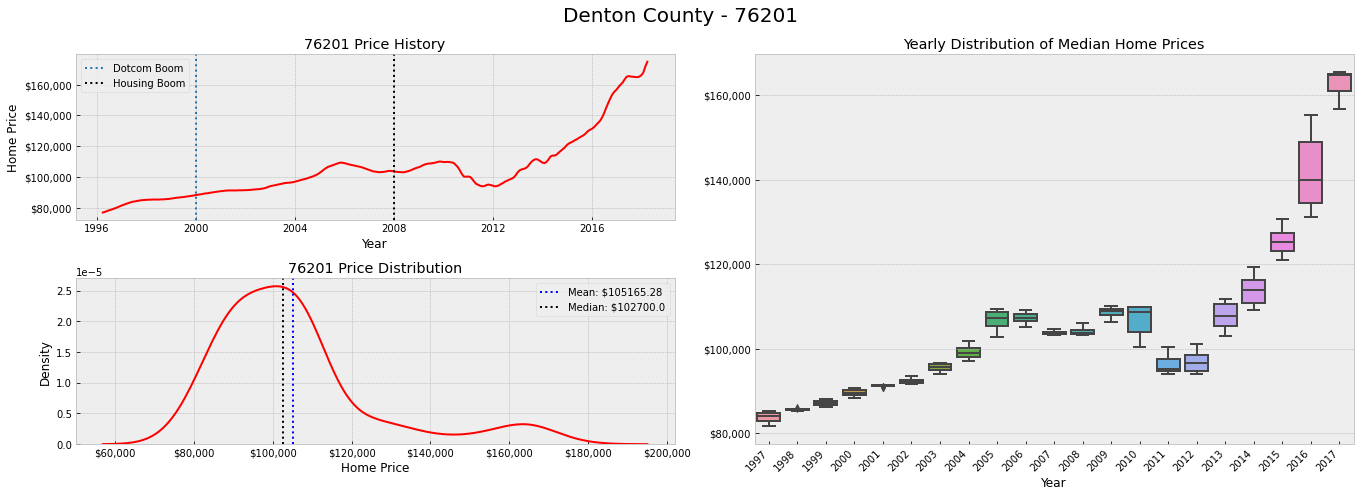

In [180]:
zip_eda(df_76201, 76201, 'Denton')

<AxesSubplot:xlabel='time'>

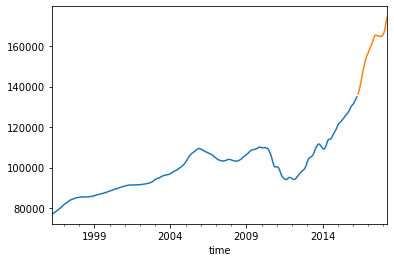

In [181]:
train_76201, test_76201 = create_train_test_split(df_76201, 0.91)
train_76201.plot()
test_76201.plot()

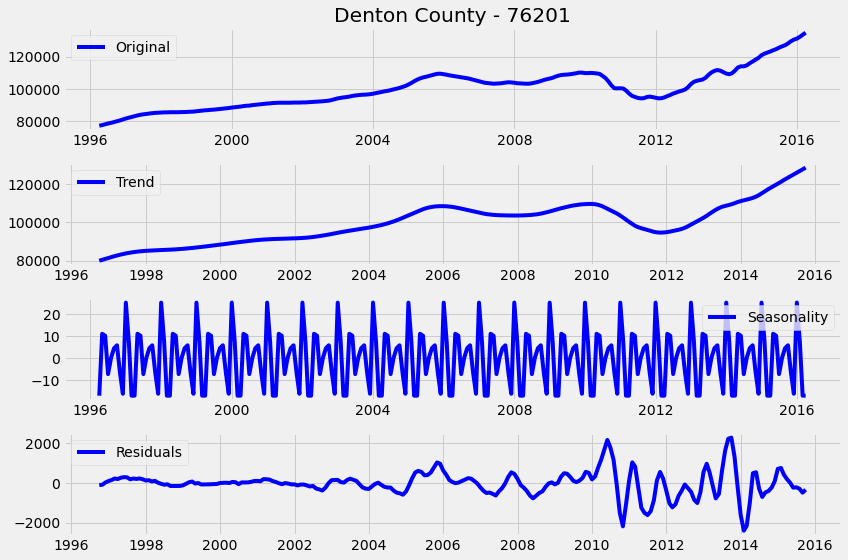

In [182]:
seasonal_decomposition(train_76201, 'Denton', 76201)

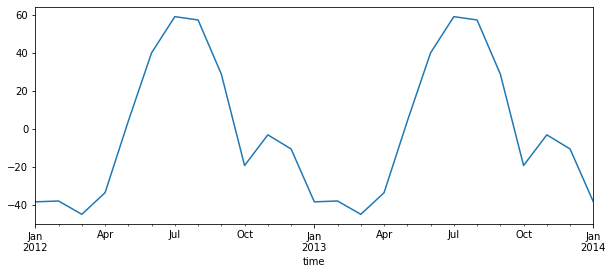

In [183]:
decomposition = seasonal_decompose(train_75006, model='Additive')
seasonal = decomposition.seasonal
seasonal.plot(figsize=(10,4), xlim=('2012-01-01', '2014-01-01'));

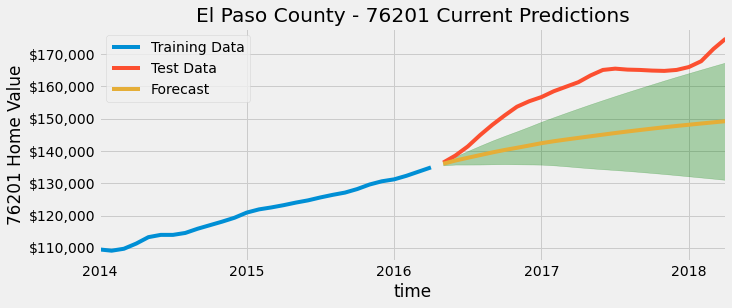

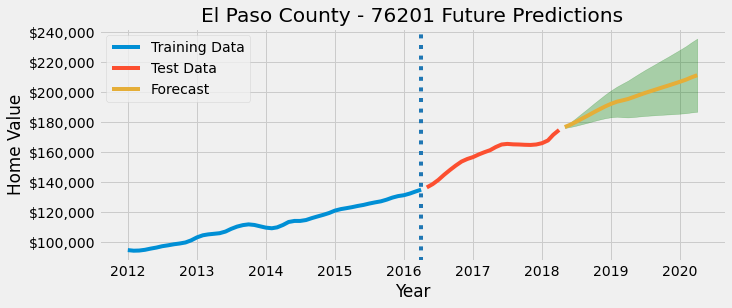

In [184]:
fig_76201, future_76201, forecast_df_76201, roi_76201 = model_predictions(train_76201, test_76201, df_76201, 76201, 'El Paso')

## Denton County Conclusion

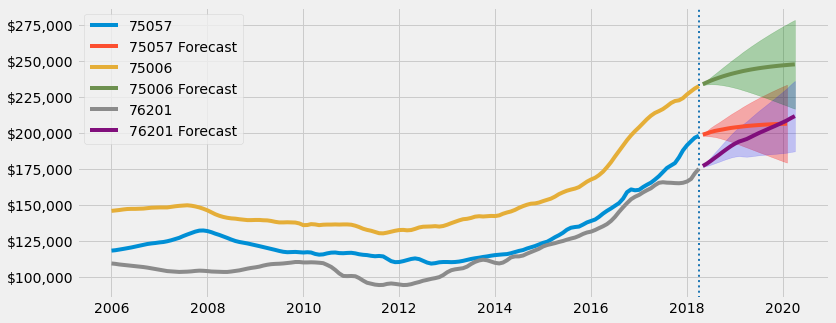

In [185]:
county_forecast_comparison(df_75057, 75057, forecast_df_75057, df_75006, 75006, forecast_df_75006,  df_76201, 76201, forecast_df_76201)

In [186]:
collin_perc_comparison = county_forecast_perc_comparison(roi_75057, 75057, roi_75006, 75006, roi_76201, 76201)
collin_perc_comparison

Lower CI       Upper CI       Forecast
75057 Perc Change      -0.094770       0.170486       0.038316
Val                 90523.018308  117048.600838  103831.553120
$ Diff              -9476.981692   17048.600838    3831.553120
75006 Perc Change      -0.070827       0.188189       0.058984
Val                 92917.254038  118818.875744  105898.410932
$ Diff              -7082.745962   18818.875744    5898.410932
76201 Perc Change       0.061440       0.329790       0.196081
Val                106144.003676  132978.963820  119608.102825
$ Diff               6144.003676   32978.963820   19608.102825

In [187]:
corr_check(df_75057, df_75006, df_76201, 75057, 75006, 76201)

75057     75006     76201
75057  1.000000  0.983245  0.957606
75006  0.983245  1.000000  0.979073
76201  0.957606  0.979073  1.000000

# Step 6: Interpreting Results

Thnk about how seasonality makes a big differenc on buy and sell time

# Testing Functions

NameError: name 'forecast_df' is not defined

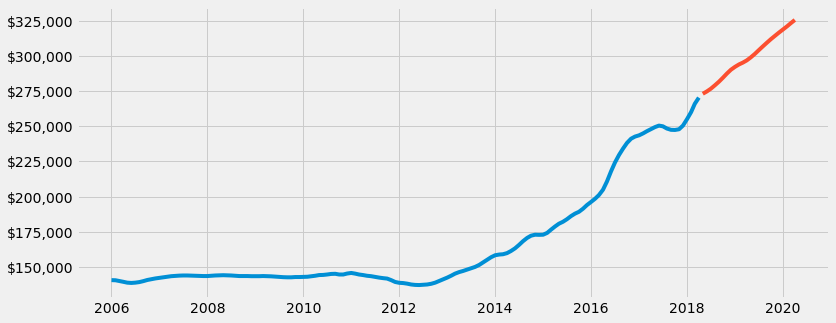

In [188]:

with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(12,5))
    
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    # 78758
    ax.plot(df_78758['2006-01-01':], label='78758')
    ax.plot(forecast_df_78758['Forecast'], label='78758 Forecast')
    ax.fill_between(forecast_df.index,forecast_df_78758['Lower CI'], forecast_df_78758['Upper CI'], alpha=0.3,
                   color='green')
    ax.axvline(df_78758.index[-1], ls =':')

    #78721
    ax.plot(df_78721['2006-01-01':], label='78721')
    ax.plot(forecast_df_78721['Forecast'], label='78721 Forecast')
    ax.fill_between(forecast_df.index,forecast_df_78721['Lower CI'], forecast_df_78721['Upper CI'], alpha=0.3,
                   color='red')

    #78744
    ax.plot(df_78744['2006-01-01':], label='78744')
    ax.plot(forecast_df_78744['Forecast'], label='78744 Forecast')
    ax.fill_between(forecast_df.index,forecast_df_78744['Lower CI'], forecast_df_78744['Upper CI'], alpha=0.3,
                   color='blue')

    ax.legend(loc=2)

In [ ]:
summary, ARMA_order, seasonal_order=find_auto_order(train_78210)
summary

In [ ]:
seasonal_order

In [ ]:
model = SARIMAX(train_78210,order=(1, 2, 2), seasonal_order=(2, 2, 2, 12),
                        enforce_stationarity=False, enforce_invertibility=False,
                        freq='MS')


In [ ]:
res = model.fit(maxiter=200)
res.summary()

In [ ]:
fore78210 = res.get_forecast(steps=len(test_78210))

In [ ]:
# save forecasted mean and upper/lower ci as df
forecast_df = fore78210.conf_int()
forecast_df.columns = ['Lower CI','Upper CI']
forecast_df['Forecast'] = fore78210.predicted_mean
forecast_df

In [ ]:
train_78210.plot()
test_78210.plot()
forecast_df['Forecast'].plot()

Trying another gridsearch method

In [ ]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0,3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p,d,q))

# Generate all different combinations of seasonal p, q and q triplets (use 12 for frequency)
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
aic_scores = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = SARIMAX(train_78210, order=comb, seasonal_order=combs, enforce_invertibility=False, enforce_stationarity=False)
            output = mod.fit(maxiter=100)
            aic_scores.append([comb, combs, output.aic])
        except:
            contiue
aic_scores

In [ ]:
pd.DataFrame(aic_scores).sort_values(2)

In [ ]:
def SARIMAX_man_results(train_data, arma_order, seasonal_order):
    """
    Takes a training data and ARMA/Seasonal order and fits a SARIMAX model with specied order and fits
    different parameters and returns the best SARIMAX model based on AIC value
    Parameters:
    Train data, seasonal/arma order
    Returns:
    Dictionary with various iterations of parameters and their AIC score and dictionary with the best 
    parameters
    """
    grid_results = []
    grid_tests = []
    mle_regression=[True,False]
    concentrate_scale = [True, False]
    results_dict = {}
    best_params = {}

    for mle in mle_regression:
        for scale in concentrate_scale:
            model = SARIMAX(train_data,order=arma_order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False,
                        mle_regression=mle, concentrate_scale=scale,freq='MS', k_trend=2)
            results = model.fit()
            score_ = results.aic

            grid_tests.append([mle, scale])
            grid_results.append(score_)
    df = pd.DataFrame(grid_tests, grid_results).sort_index()
    df = df.rename(columns={0: 'MLE_Regression', 1: 'Concentrate_Scale'})
    results_dict['grid_search'] = df
    diagnostics = results.plot_diagnostics(figsize=(8,8))
    results_dict['diag_summary'] = diagnostics

    best_params['arma_order'] = arma_order
    best_params['seasonal_order'] = seasonal_order
    best_params['MLE_Regression'] = seasonal_order
    best_params['Concentrate_Scale'] = seasonal_order


    return results_dict, best_params

In [ ]:
def SARIMAX_man_results(train_data, arma_order, seasonal_order):
    """
    Takes a training data and ARMA/Seasonal order and fits a SARIMAX model with specied order and fits
    different parameters and returns the best SARIMAX model based on AIC value
    Parameters:
    Train data, seasonal/arma order
    Returns:
    Dictionary with various iterations of parameters and their AIC score and dictionary with the best 
    parameters
    """
    grid_results = []
    grid_tests = []
    mle_regression=[True,False]
    concentrate_scale = [True, False]
    results_dict = {}
    best_params = {}

    for mle in mle_regression:
        for scale in concentrate_scale:
            model = SARIMAX(train_data,order=arma_order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False,
                        mle_regression=mle, concentrate_scale=scale,freq='MS', k_trend=2)
            results = model.fit()
            score_ = results.aic

            grid_tests.append([mle, scale])
            grid_results.append(score_)
    df = pd.DataFrame(grid_tests, grid_results).sort_index()
    df = df.rename(columns={0: 'MLE_Regression', 1: 'Concentrate_Scale'})
    results_dict['grid_search'] = df
    diagnostics = results.plot_diagnostics(figsize=(8,8))
    results_dict['diag_summary'] = diagnostics

    best_params['arma_order'] = arma_order
    best_params['seasonal_order'] = seasonal_order
    best_params['MLE_Regression'] = seasonal_order
    best_params['Concentrate_Scale'] = seasonal_order


    return results_dict, best_params

In [ ]:
import matplotlib.ticker as mtick

def model_predictions(train_data, test_data, all_data, code, county):
    """
    Uses all helper functions to create diagnostic summary, forecast on test data, and future predictions
    Parameters:
    Training data, test data, all data, zip code, and county
    Returns:
    Plot showing diagnostics and forecasts. Dictinary with predictions in the future
    """
    summary, arma_order, seasonal_order = find_auto_order(train_data)
    best_params = SARIMAX_man_results(train_data, arma_order, seasonal_order)
    best_model = fit_final_model(train_data, arma_order, seasonal_order, 
                                 best_params['MLE_Regression'], best_params['Concentrate_Scale'])
    forecast_df=get_forecast(best_model, test_data)
    test_forecast_fig=plot_forecast(train_data, test_data, forecast_df, code, county)
    bestall_model=fitall_final_model(all_data, arma_order, seasonal_order, 
                        best_params['MLE_Regression'], best_params['Concentrate_Scale'])
    
    fig, forecast_dict, forecast_df=plot_future_forecast(bestall_model, test_data, train_data, code, county)
    roi_helper = roi_dict(forecast_df)
    return fig, forecast_dict, forecast_df, roi_helper

In [ ]:
bexar_perc_comparison = county_forecast_perc_comparison(roi_77092, 77092, roi_77021, 77021, roi_77043, 77043)
bexar_perc_comparison

In [ ]:
# def plot_top3_5(all_perc_change_dict, county_dict_full, region):
    
#     top_5=list(all_perc_change_dict[region].index)[:5] 
#     with plt.style.context('fivethirtyeight'):
#         fig, ax = plt.subplots(figsize=(12,5))
#         ax.plot(county_dict_full[top_5[0]]['value'], color='red', label=top_5[0], lw=5)
#         ax.plot(county_dict_full[top_5[1]]['value'], color='blue', label=top_5[1], lw=5)
#         ax.plot(county_dict_full[top_5[2]]['value'], color='green', label=top_5[2], lw=5)
#         ax.plot(county_dict_full[top_5[3]]['value'], color='black', label=top_5[3], lw=2, ls=':')
#         ax.plot(county_dict_full[top_5[4]]['value'], color='silver', label=top_5[4], lw=2, ls=':')
#         ax.set_title(f"{region} Top 5 Growth Zip Codes")
#         ax.set_ylabel('Home Price')
#         ax.set_xlabel('Year')
#         ax.legend()
#         return fig 